In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn import metrics, tree, svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score,train_test_split,LeaveOneOut
from sklearn.naive_bayes import MultinomialNB
from statistics import mean

from data_load import *
from dictionaries import *
from score_models import *

# Choose the Model Whose Performance You Want to View

In [2]:
model_name = 'nb_ohe_f0_d0_b4_c36_v0'

# Model Performance

In [3]:
column_list = [
                'problem_type',
                'creative',
                'outdoors',
                'career',
                'group_work',
                'liked_courses',
                'disliked_courses',
                'programming',
                'join_clubs',
                'not_clubs',
                'liked_projects',
                'disliked_projects',
                'tv_shows',
                'alternate_degree',
                'expensive_equipment',
                'drawing',
                'essay',
                'architecture',
                'automotive',
                'business',
                'construction',
                'health',
                'environment',
                'manufacturing',
                'technology',
                'program'
                ]

ohe_main =  [
            'problem_type',
            'creative',
            'outdoors',
            'career',
            'group_work',
            'liked_courses',
            'disliked_courses',
            'programming',
            'join_clubs',
            'not_clubs',
            'liked_projects',
            'disliked_projects',
            'tv_shows',
            'alternate_degree',
            'expensive_equipment',
            'drawing',
            'essay'
        ]

cccc = [
                'problem_type',
                'creative',
                'outdoors',
                'career',
                'group_work',
                'liked_courses',
                'disliked_courses',
                'programming',
                'join_clubs',
                'not_clubs',
                'liked_projects',
                'disliked_projects',
                'tv_shows',
                'alternate_degree',
                'expensive_equipment',
                'drawing',
                'essay',
                'architecture',
                'automotive',
                'business',
                'construction',
                'health',
                'environment',
                'manufacturing',
                'technology',
                'program'
                ]

## Multilabel Model Scores

In [4]:
model_name = model_name
temp_model_name = model_name

model_data = pd.read_csv('exported_model_files/dataframes/'+model_name+'.csv',dtype=str)
ohe = ohe_main
# Loading test data
if 'le' in model_name:
    test_data_t7 = get_label_encoded_data('data/t7.csv',model_name='t7',column_list=column_list,drop_not_happy='H',data_balance=False,drop_gender=True)[0]
elif 'ohe' in model_name:
    test_data_t7 = get_merged_encoded_data(directory = 'data/t7.csv',model_name ='t7',one_hot_encode=ohe,column_list = column_list,drop_not_happy='H',data_balance=False,drop_gender=True)

test_data_t7_temp = test_data_t7.copy()[list(model_data.columns)].head(210)

# Loading model files
pkl_file = open('exported_model_files/metadata/'+model_name+'_cat', 'rb')
index_dict = pickle.load(pkl_file)
new_vector = np.zeros(len(index_dict))

pkl_file = open('exported_model_files/models/'+model_name+'.pkl', 'rb')
model = pickle.load(pkl_file)

# Preparing Loading data
test_array = np.array(test_data_t7_temp.drop(axis=1,columns=["program"]))
test_actual = np.array(test_data_t7_temp["program"])

mclass_t3 = get_mclass_t3(temp_model_name,model,test_array,test_actual)
mclass_RR = get_mclass_rr(temp_model_name,model,test_array,test_actual)
mclass_accuracy = get_mclass_accuracy(temp_model_name,model,test_array,test_actual)
mclass_reassignment = get_mclass_reassignment(temp_model_name,model)
mclass_top2 = get_mclass_topN(temp_model_name,model,test_array,test_actual,2)
mclass_top3 = get_mclass_topN(temp_model_name,model,test_array,test_actual,3)
mclass_top4 = get_mclass_topN(temp_model_name,model,test_array,test_actual,4)
mclass_top5 = get_mclass_topN(temp_model_name,model,test_array,test_actual,5)
mclass_top6 = get_mclass_topN(temp_model_name,model,test_array,test_actual,6)
mclass_top7 = get_mclass_topN(temp_model_name,model,test_array,test_actual,7)
mclass_top8 = get_mclass_topN(temp_model_name,model,test_array,test_actual,8)
mclass_top9 = get_mclass_topN(temp_model_name,model,test_array,test_actual,9)
mclass_top10 = get_mclass_topN(temp_model_name,model,test_array,test_actual,10)
mclass_top11 = get_mclass_topN(temp_model_name,model,test_array,test_actual,11)
mclass_top12 = get_mclass_topN(temp_model_name,model,test_array,test_actual,12)
mclass_top13 = get_mclass_topN(temp_model_name,model,test_array,test_actual,13)
mclass_top14 = get_mclass_topN(temp_model_name,model,test_array,test_actual,14)
mclass_top15 = get_mclass_topN(temp_model_name,model,test_array,test_actual,15)

scoring_dictionary = {
                        't3':mclass_t3,
                        'RR':mclass_RR,
                        'reassignment':mclass_reassignment,
                        'accuracy':mclass_accuracy,
                        'top2':mclass_top2,
                        'top3':mclass_top3,
                        'top4':mclass_top4,
                        'top5':mclass_top5,
                        'top6':mclass_top6,
                        'top7':mclass_top7,
                        'top8':mclass_top8,
                        'top9':mclass_top9,
                        'top10':mclass_top10,
                        'top11':mclass_top11,
                        'top12':mclass_top12,
                        'top13':mclass_top13,
                        'top14':mclass_top14,
                        'top15':mclass_top15
                    }

print(scoring_dictionary)

new programming question not included
new programming question not included
{'t3': 0.6, 'RR': 0.6428328021185165, 'reassignment': 0.8, 'accuracy': 0.4666666666666667, 'top2': 0.6761904761904762, 'top3': 0.7619047619047619, 'top4': 0.8428571428571429, 'top5': 0.8761904761904762, 'top6': 0.9095238095238095, 'top7': 0.9380952380952381, 'top8': 0.9571428571428572, 'top9': 0.9714285714285714, 'top10': 0.9714285714285714, 'top11': 0.9857142857142858, 'top12': 0.9857142857142858, 'top13': 0.9904761904761905, 'top14': 0.9952380952380953, 'top15': 1}


## Generating Heat Map for Confusion Matrix

In [5]:
model_data = pd.read_csv('exported_model_files/dataframes/'+model_name+'.csv',dtype=str)
ohe = ohe_main

if 'f0' in model_name:
    # Loading test data
    if 'le' in model_name:
        test_data_t7 = get_label_encoded_data('data/t7.csv',model_name='t7',column_list=column_list,drop_not_happy='H',data_balance=False,drop_gender=True)[0]
    elif 'ohe' in model_name:
        test_data_t7 = get_merged_encoded_data(directory = 'data/t7.csv',model_name ='t7',one_hot_encode=ohe,column_list = column_list,drop_not_happy='H',data_balance=False,drop_gender=True)

    test_data_t7_temp = test_data_t7.copy()[list(model_data.columns)].head(210)
    test_data = test_data_t7_temp
    test_data = test_data.reset_index()
    test_data = test_data.drop(['program','id'], axis=1)

    # Loading model files
    pkl_file = open('exported_model_files/metadata/'+model_name+'_cat', 'rb')
    index_dict = pickle.load(pkl_file)
    new_vector = np.zeros(len(index_dict))

    pkl_file = open('exported_model_files/models/'+model_name+'.pkl', 'rb')
    model = pickle.load(pkl_file)

    predictions ={}
    for i in range(0,len(test_data)):
        vector = np.asarray(test_data.loc[i,])
        predictions[i] = INV_INDEX_PROGRAM[model.predict([vector])[0]]
        
elif 'f1' in model_name:
    # Loading test data
    if 'le' in model_name:
        test_data_t7 = get_label_encoded_data('data/t7.csv',model_name='t7',column_list=column_list,drop_not_happy='H',data_balance=False,drop_gender=True)[0]
    elif 'ohe' in model_name:
        test_data_t7 = get_merged_encoded_data(directory = 'data/t7.csv',model_name ='t7',one_hot_encode=ohe,column_list = column_list,drop_not_happy='H',data_balance=False,drop_gender=True)

    test_data_t7_temp = test_data_t7.copy()[list(model_data.columns)].head(210)
    test_data = test_data_t7_temp
    test_data = test_data.reset_index()
    test_data = test_data.drop(['program','id'], axis=1)

    predictions ={}
    for i in range(0,len(test_data)):
        vector = np.asarray(test_data.loc[i,])
        predictions[i] = sort_probability_dict(binary_predict_proba(vector,model_name,test_data_t7))[2][0]

test_data = test_data_t7_temp
test_data['predicted_program'] = pd.Series(predictions)
test_data.program = test_data.program.map(INV_INDEX_PROGRAM)
test_data = test_data.reset_index()
test_data = test_data.drop(['id'], axis=1)
print(len(test_data))

new programming question not included
210


In [6]:
pred_to_orig = {
                'mech-predicted': 0,
                'bmed-predicted': 0,
                'swe-predicted': 0,
                'tron-predicted': 0,
                'cive-predicted': 0,
                'chem-predicted': 0,
                'syde-predicted': 0,
                'msci-predicted': 0,
                'ce-predicted': 0,
                'elec-predicted': 0,
                'nano-predicted': 0,
                'geo-predicted': 0,
                'env-predicted': 0,
                'arch-e-predicted': 0,
                'arch-predicted': 0
                }

for i in range(0,len(test_data)):
    try:
        prediction_count = pred_to_orig[str(test_data.loc[i,'predicted_program'])+'-predicted']
        try:
            prediction_count[test_data.loc[i,'program']] = prediction_count[test_data.loc[i,'program']] + 1
        except:
            prediction_count[test_data.loc[i,'program']] = 0

        pred_to_orig[str(test_data.loc[i,'predicted_program'])+'-predicted'] = prediction_count
    except:
        pred_to_orig[str(test_data.loc[i,'predicted_program'])+'-predicted'] = {
                                                        'mech': 0,
                                                        'bmed': 0,
                                                        'swe': 0,
                                                        'tron': 0,
                                                        'cive': 0,
                                                        'chem': 0,
                                                        'syde': 0,
                                                        'msci': 0,
                                                        'ce': 0,
                                                        'elec': 0,
                                                        'nano': 0,
                                                        'geo': 0,
                                                        'env': 0,
                                                        'arch-e': 0,
                                                        'arch': 0
                                                        }
        prediction_count = pred_to_orig[str(test_data.loc[i,'predicted_program'])+'-predicted']
        try:
            prediction_count[test_data.loc[i,'program']] =prediction_count[test_data.loc[i,'program']] + 1
        except:
            prediction_count[test_data.loc[i,'program']] = 0

        pred_to_orig[str(test_data.loc[i,'predicted_program'])+'-predicted'] = prediction_count

        arch-predicted  arch-e-predicted  bmed-predicted  ce-predicted  \
arch                11                 1               1             0   
arch-e               6                 3               0             0   
bmed                 1                 0               5             0   
ce                   0                 0               0             7   
chem                 0                 0               0             0   
cive                 1                 0               0             1   
elec                 0                 0               2             3   
env                  0                 1               0             0   
geo                  1                 1               0             0   
mech                 0                 0               0             0   
msci                 0                 1               0             1   
nano                 0                 0               2             0   
swe                  0                

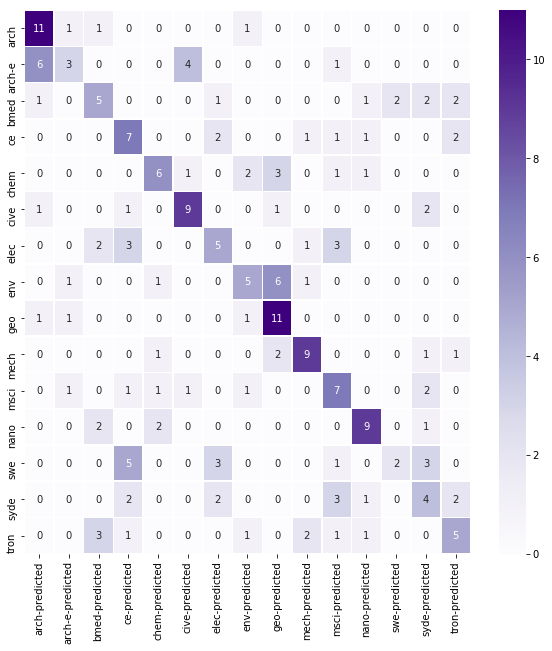

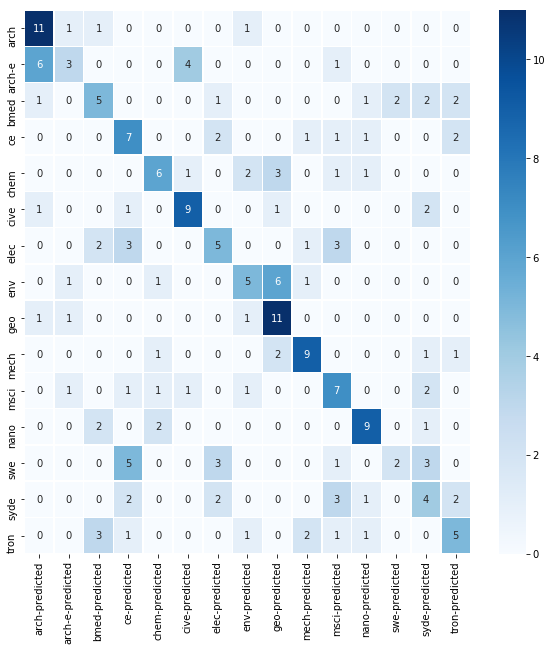

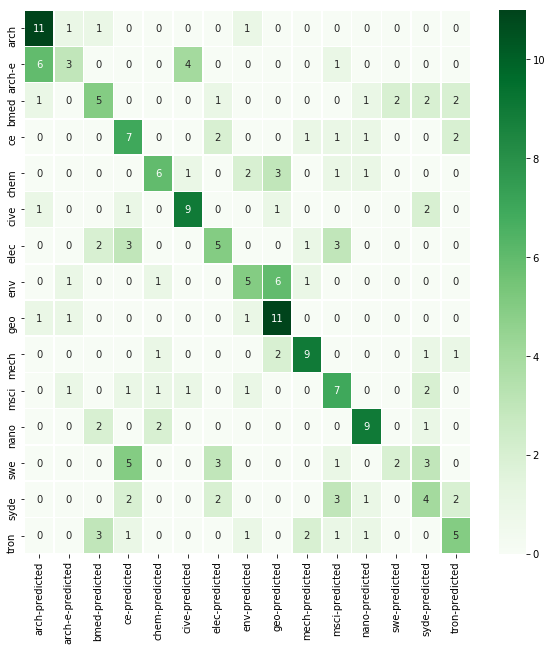

In [17]:
df = pd.DataFrame(pred_to_orig)
df = df.reindex(sorted(df.columns), axis=1)
df['id'] = df.index
df = df.sort_values(by=['id'], ascending = True)
df.set_index('id')
df = df.drop(['id'], axis=1)
df = df[['arch-predicted','arch-e-predicted','bmed-predicted','ce-predicted','chem-predicted','cive-predicted','elec-predicted','env-predicted','geo-predicted','mech-predicted','msci-predicted','nano-predicted','swe-predicted','syde-predicted' ,'tron-predicted']]

# print(df)
plt.figure(figsize=(10,10))
sns.heatmap(df,cmap='Purples',annot=True,linewidth=0.5)

plt.figure(figsize=(10,10))
sns.heatmap(df,cmap='Blues',annot=True,linewidth=0.5)

plt.figure(figsize=(10,10))
sns.heatmap(df,cmap='Greens',annot=True,linewidth=0.5)
print(df)


### Gender Bias Distribution

In [8]:
model_data = pd.read_csv('exported_model_files/dataframes/'+model_name+'.csv',dtype=str)
ohe = ohe_main
model_columns = list(model_data.columns)
model_columns.append('gender')

if 'f0' in model_name:
    # Loading test data
    if 'le' in model_name:
        test_data_t7 = get_label_encoded_data('data/t7.csv',model_name='t7',column_list=column_list,drop_not_happy='H',data_balance=False,drop_gender=False)[0]
    elif 'ohe' in model_name:
        test_data_t7 = get_merged_encoded_data(directory = 'data/t7.csv',model_name ='t7',one_hot_encode=ohe,column_list = column_list,drop_not_happy='H',data_balance=False,drop_gender=False)
        
    test_data_t7_temp = test_data_t7.copy()[model_columns].head(210)
    test_data = test_data_t7_temp
    test_data = test_data.reset_index()
    gender_data = test_data['gender'] # 1 is male, 2 is female
    gender_data = gender_data.to_frame()
    test_data = test_data.drop(['program','id','gender'], axis=1)

    # Loading model files
    pkl_file = open('exported_model_files/metadata/'+model_name+'_cat', 'rb')
    index_dict = pickle.load(pkl_file)
    new_vector = np.zeros(len(index_dict))

    pkl_file = open('exported_model_files/models/'+model_name+'.pkl', 'rb')
    model = pickle.load(pkl_file)
    
    predictions ={}
    for i in range(0,len(test_data)):
        vector = np.asarray(test_data.loc[i,])
        predictions[i] = INV_INDEX_PROGRAM[model.predict([vector])[0]]
        
elif 'f1' in model_name:
    # Loading test data
    if 'le' in model_name:
        test_data_t7 = get_label_encoded_data('data/t7.csv',model_name='t7',column_list=column_list,drop_not_happy='NH',data_balance=False,drop_gender=False)[0]
    elif 'ohe' in model_name:
        test_data_t7 = get_merged_encoded_data(directory = 'data/t7.csv',model_name ='t7',one_hot_encode=ohe,column_list = column_list,drop_not_happy='NH',data_balance=False,drop_gender=False)

    test_data_t7_temp = test_data_t7.copy()[model_columns].head(210)
    test_data = test_data_t7_temp
    test_data = test_data.reset_index()
    test_data = test_data.drop(['program','id'], axis=1)
    gender_data = test_data['gender'] # 1 is male, 2 is female
    gender_data = gender_data.to_frame()
    test_data = test_data.drop(['gender'], axis=1)

    predictions ={}
    for i in range(0,len(test_data)):
        vector = np.asarray(test_data.loc[i,])
        predictions[i] = sort_probability_dict(binary_predict_proba(vector,model_name,test_data_t7))[2][0]

test_data = test_data_t7_temp
test_data['predicted_program'] = pd.Series(predictions)
test_data.program = test_data.program.map(INV_INDEX_PROGRAM)
test_data = test_data.reset_index()
test_data = test_data.drop(['id'], axis=1)
test_data['gender'] = pd.Series(gender_data['gender'])



new programming question not included


In [9]:
gender_data = test_data.copy()

gender_count = {'male':{'program':{},'predicted_program':{}},'female':{'program':{},'predicted_program':{}}}

for i in range(0,len(test_data)):
    if test_data.loc[i,'gender'] == 0:
        gender_cols = gender_count['male']
        try:
            program_count = gender_cols['program']
            program_count[test_data.loc[i,'program']] = program_count[test_data.loc[i,'program']] + 1
        except:
            program_count = {
                            'mech': 0,
                            'bmed': 0,
                            'swe': 0,
                            'tron': 0,
                            'cive': 0,
                            'chem': 0,
                            'syde': 0,
                            'msci': 0,
                            'ce': 0,
                            'elec': 0,
                            'nano': 0,
                            'geo': 0,
                            'env': 0,
                            'arch-e': 0,
                            'arch': 0
                            }
            program_count[test_data.loc[i,'program']] = 1
        try:
            predicted_count = gender_cols['predicted_program']
            predicted_count[test_data.loc[i,'predicted_program']] = predicted_count[test_data.loc[i,'predicted_program']] + 1
        except:
            predicted_count = {
                            'mech': 0,
                            'bmed': 0,
                            'swe': 0,
                            'tron': 0,
                            'cive': 0,
                            'chem': 0,
                            'syde': 0,
                            'msci': 0,
                            'ce': 0,
                            'elec': 0,
                            'nano': 0,
                            'geo': 0,
                            'env': 0,
                            'arch-e': 0,
                            'arch': 0
                            }
            predicted_count[test_data.loc[i,'predicted_program']] = 1
        gender_cols['program'] = program_count
        gender_cols['predicted_program'] = predicted_count
        gender_count['male'] = gender_cols

    if test_data.loc[i,'gender'] == 1:
        gender_cols = gender_count['female']
        try:
            program_count = gender_cols['program']
            program_count[test_data.loc[i,'program']] = program_count[test_data.loc[i,'program']] + 1
        except:
            program_count = {
                            'mech': 0,
                            'bmed': 0,
                            'swe': 0,
                            'tron': 0,
                            'cive': 0,
                            'chem': 0,
                            'syde': 0,
                            'msci': 0,
                            'ce': 0,
                            'elec': 0,
                            'nano': 0,
                            'geo': 0,
                            'env': 0,
                            'arch-e': 0,
                            'arch': 0
                            }
            program_count[test_data.loc[i,'program']] = 1
        try:
            predicted_count = gender_cols['predicted_program']
            predicted_count[test_data.loc[i,'predicted_program']] = predicted_count[test_data.loc[i,'predicted_program']] + 1
        except:
            predicted_count = {
                            'mech': 0,
                            'bmed': 0,
                            'swe': 0,
                            'tron': 0,
                            'cive': 0,
                            'chem': 0,
                            'syde': 0,
                            'msci': 0,
                            'ce': 0,
                            'elec': 0,
                            'nano': 0,
                            'geo': 0,
                            'env': 0,
                            'arch-e': 0,
                            'arch': 0
                            }
            predicted_count[test_data.loc[i,'predicted_program']] = 1
        gender_cols['program'] = program_count
        gender_cols['predicted_program'] = predicted_count
        gender_count['female'] = gender_cols
print(gender_count)

{'male': {'program': {'mech': 7, 'bmed': 7, 'swe': 7, 'tron': 7, 'cive': 7, 'chem': 7, 'syde': 7, 'msci': 7, 'ce': 7, 'elec': 7, 'nano': 7, 'geo': 7, 'env': 7, 'arch-e': 7, 'arch': 7}, 'predicted_program': {'mech': 4, 'bmed': 12, 'swe': 1, 'tron': 4, 'cive': 8, 'chem': 4, 'syde': 10, 'msci': 7, 'ce': 9, 'elec': 7, 'nano': 8, 'geo': 7, 'env': 10, 'arch-e': 3, 'arch': 11}}, 'female': {'program': {'mech': 7, 'bmed': 7, 'swe': 7, 'tron': 7, 'cive': 7, 'chem': 7, 'syde': 7, 'msci': 7, 'ce': 7, 'elec': 7, 'nano': 7, 'geo': 7, 'env': 7, 'arch-e': 7, 'arch': 7}, 'predicted_program': {'mech': 10, 'bmed': 1, 'swe': 3, 'tron': 8, 'cive': 7, 'chem': 7, 'syde': 5, 'msci': 11, 'ce': 11, 'elec': 6, 'nano': 6, 'geo': 16, 'env': 1, 'arch-e': 4, 'arch': 9}}}


               program  predicted_program
arch-e-female        7                  4
arch-e-male          7                  3
arch-female          7                  9
arch-male            7                 11
bmed-female          7                  1
bmed-male            7                 12
ce-female            7                 11
ce-male              7                  9
chem-female          7                  7
chem-male            7                  4
cive-female          7                  7
cive-male            7                  8
elec-female          7                  6
elec-male            7                  7
env-female           7                  1
env-male             7                 10
geo-female           7                 16
geo-male             7                  7
mech-female          7                 10
mech-male            7                  4
msci-female          7                 11
msci-male            7                  7
nano-female          7            

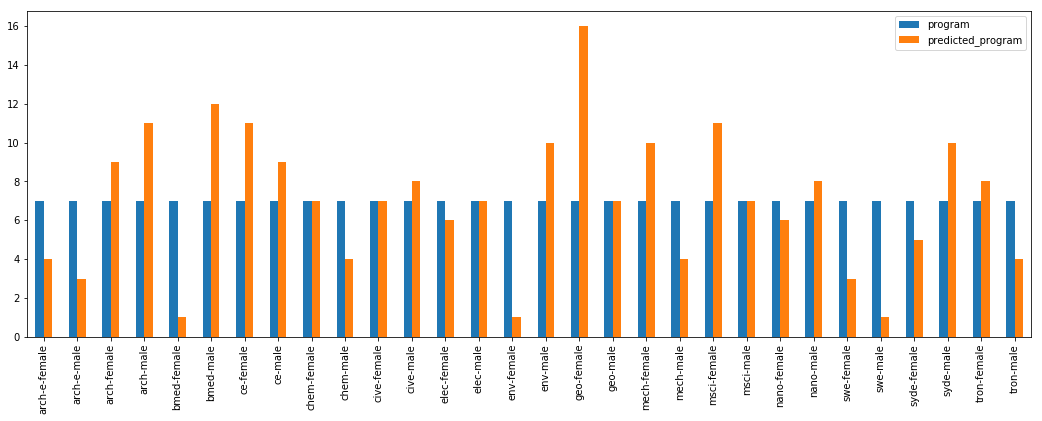

In [10]:
mdf = pd.DataFrame(gender_count['male'])
mdf.index += '-male'

fdf = pd.DataFrame(gender_count['female'])
fdf.index += '-female'

mdf = mdf.T
fdf = fdf.T

df = mdf.merge(fdf, left_index=True, right_index=True,how='left').T
df = df.sort_index()

print(df)
df.plot.bar(figsize=(18,6))
plt.show()

# Heat Map For Overall Rank

In [11]:
column_list = cccc
model_data = pd.read_csv('exported_model_files/dataframes/'+model_name+'.csv',dtype=str)
ohe = ohe_main
print(column_list)

if 'f0' in model_name:
    # Loading test data
    if 'le' in model_name:
        test_data_t7 = get_label_encoded_data('data/t7.csv',model_name='t7',column_list=column_list,drop_not_happy='H',data_balance=False,drop_gender=True)[0]
    elif 'ohe' in model_name:
        test_data_t7 = get_merged_encoded_data(directory = 'data/t7.csv',model_name ='t7',one_hot_encode=ohe,column_list = column_list,drop_not_happy='H',data_balance=False,drop_gender=True)

    test_data_t7_temp = test_data_t7.copy()[list(model_data.columns)].head(210)
    test_data = test_data_t7_temp
    test_data = test_data.reset_index()
    programs = test_data['program']
    test_data = test_data.drop(['program','id'], axis=1)
    

    # Loading model files
    pkl_file = open('exported_model_files/metadata/'+model_name+'_cat', 'rb')
    index_dict = pickle.load(pkl_file)
    new_vector = np.zeros(len(index_dict))

    pkl_file = open('exported_model_files/models/'+model_name+'.pkl', 'rb')
    model = pickle.load(pkl_file)
      
elif 'f1' in model_name:
    # Loading test data
    if 'le' in model_name:
        test_data_t7 = get_label_encoded_data('data/t7.csv',model_name='t7',column_list=column_list,drop_not_happy='H',data_balance=False,drop_gender=True)[0]
    elif 'ohe' in model_name:
        test_data_t7 = get_merged_encoded_data(directory = 'data/t7.csv',model_name ='t7',one_hot_encode=ohe,column_list = column_list,drop_not_happy='H',data_balance=False,drop_gender=True)

    test_data_t7_temp = test_data_t7.copy()[list(model_data.columns)].head(210)
    test_data = test_data_t7_temp
    test_data = test_data.reset_index()
    test_data = test_data.drop(['program','id'], axis=1)

display_data = test_data.copy()
for i in range(len(programs)):
    programs[i] = INV_INDEX_PROGRAM[programs[i]]
display_data['program'] = programs


['problem_type', 'creative', 'outdoors', 'career', 'group_work', 'liked_courses', 'disliked_courses', 'programming', 'join_clubs', 'not_clubs', 'liked_projects', 'disliked_projects', 'tv_shows', 'alternate_degree', 'expensive_equipment', 'drawing', 'essay', 'architecture', 'automotive', 'business', 'construction', 'health', 'environment', 'manufacturing', 'technology', 'program']
new programming question not included


In [12]:
predictions ={}
for i in range(0,len(test_data)):
    vector = np.asarray(test_data.loc[i,])
    predictions[i] = INV_INDEX_PROGRAM[model.predict_proba([vector])[0]]

TypeError: unhashable type: 'numpy.ndarray'

In [14]:
output = {
            'mech-actual': 0,
            'bmed-actual': 0,
            'swe-actual': 0,
            'tron-actual': 0,
            'cive-actual': 0,
            'chem-actual': 0,
            'syde-actual': 0,
            'msci-actual': 0,
            'ce-actual': 0,
            'elec-actual': 0,
            'nano-actual': 0,
            'geo-actual': 0,
            'env-actual': 0,
            'arch-e-actual': 0,
            'arch-actual': 0
                            }

for i in range(0,len(display_data)):
    vector = np.asarray(test_data.loc[i,])
    scores = sort_probability_dict(retrieve_prediction_labels(model,model.predict_proba([vector])))[2][:15]
    try:
        cumulative_scores = output[display_data.loc[i,'program']+'-actual']
        for key in cumulative_scores.keys():
            cumulative_scores[key] = cumulative_scores[key] + (14-scores.index(key))/100
    except:
        cumulative_scores = {'msci':0, 'syde':0, 'ce':0, 'elec':0, 'swe':0, 'tron':0, 'cive':0, 'arch':0, 'bmed':0, 'chem':0, 'arch-e':0, 'env':0, 'geo':0, 'mech':0, 'nano':0}
        for key in cumulative_scores.keys():
            cumulative_scores[key] = cumulative_scores[key] + (14-scores.index(key))/100
        output[display_data.loc[i,'program']+'-actual'] = cumulative_scores

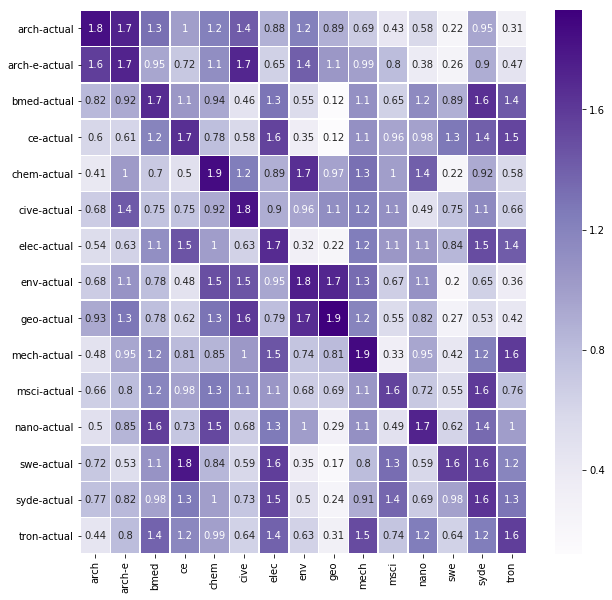

In [15]:
df = pd.DataFrame(output).T
df = df.reindex(sorted(df.columns), axis=1)
df['id'] = df.index
df = df.sort_values(by=['id'], ascending = True)
df.set_index('id')
df = df.drop(['id'], axis=1)
# df = df[['arch-predicted','arch-e-predicted','bmed-predicted','ce-predicted','chem-predicted','cive-predicted','elec-predicted','env-predicted','geo-predicted','mech-predicted','msci-predicted','nano-predicted','swe-predicted','syde-predicted' ,'tron-predicted']]

# print(df)
plt.figure(figsize=(10,10))
sns.heatmap(df,cmap='Purples',annot=True,linewidth=0.5)

# Colours For Heat Map

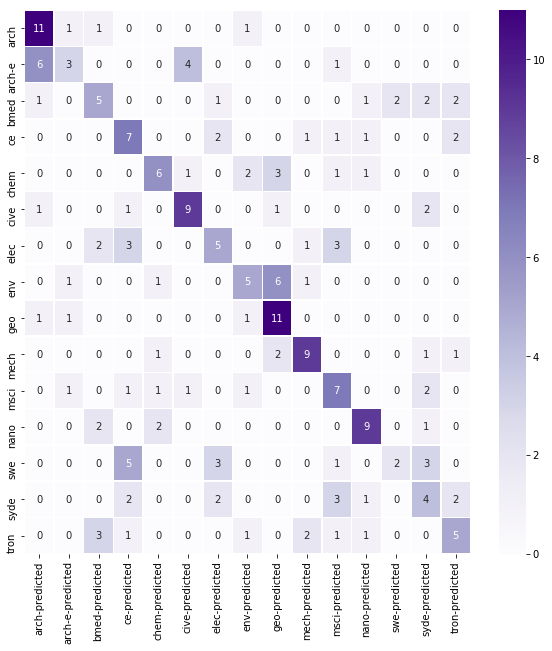

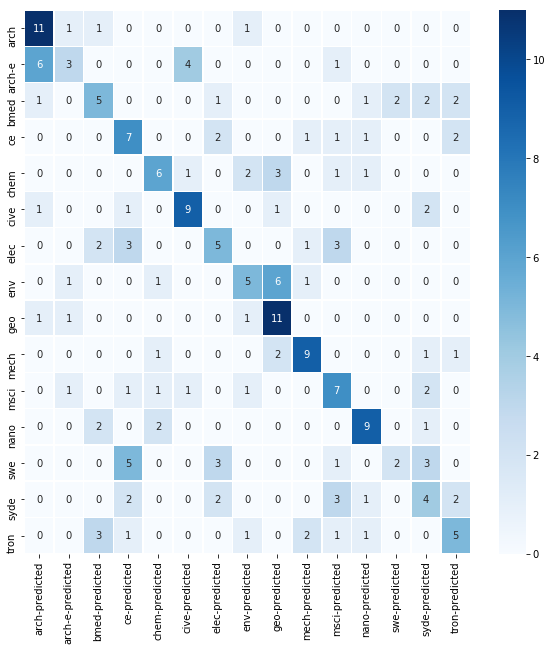

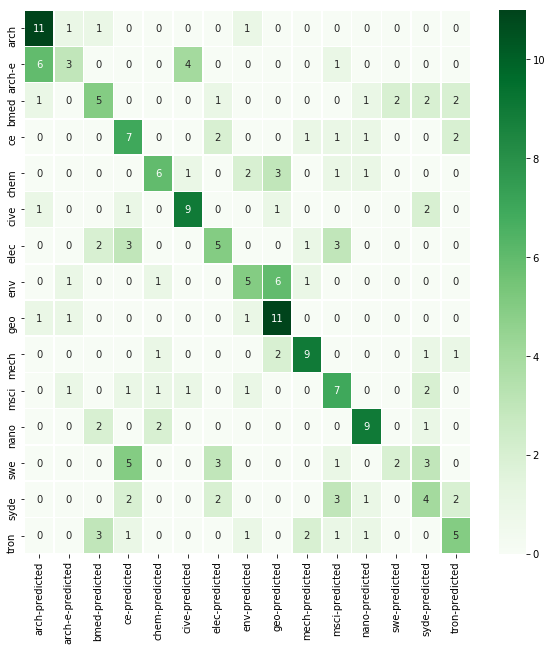

In [16]:
column_list = cccc
df = pd.DataFrame(pred_to_orig)
df = df.reindex(sorted(df.columns), axis=1)
df['id'] = df.index
df = df.sort_values(by=['id'], ascending = True)
df.set_index('id')
df = df.drop(['id'], axis=1)
df = df[['arch-predicted','arch-e-predicted','bmed-predicted','ce-predicted','chem-predicted','cive-predicted','elec-predicted','env-predicted','geo-predicted','mech-predicted','msci-predicted','nano-predicted','swe-predicted','syde-predicted' ,'tron-predicted']]

# print(df)
plt.figure(figsize=(10,10))
sns.heatmap(df,cmap='Purples',annot=True,linewidth=0.5)

plt.figure(figsize=(10,10))
sns.heatmap(df,cmap='Blues',annot=True,linewidth=0.5)

plt.figure(figsize=(10,10))
sns.heatmap(df,cmap='Greens',annot=True,linewidth=0.5)


Accent
Accent_r
Blues
Blues_r
BrBG
BrBG_r
BuGn
BuGn_r
BuPu
BuPu_r
CMRmap
CMRmap_r
Dark2
Dark2_r
GnBu
GnBu_r
Greens
Greens_r
Greys
Greys_r
OrRd
OrRd_r
Oranges
Oranges_r
PRGn
PRGn_r
Paired
Paired_r
Pastel1
Pastel1_r
Pastel2
Pastel2_r
PiYG
PiYG_r
PuBu
PuBuGn
PuBuGn_r
PuBu_r
PuOr
PuOr_r
PuRd
PuRd_r
Purples
Purples_r
RdBu
RdBu_r
RdGy
RdGy_r
RdPu
RdPu_r
RdYlBu
RdYlBu_r
RdYlGn
RdYlGn_r
Reds
Reds_r
Set1
Set1_r
Set2
Set2_r
Set3
Set3_r
Spectral
Spectral_r
Wistia
Wistia_r
YlGn
YlGnBu
YlGnBu_r
YlGn_r
YlOrBr
YlOrBr_r
YlOrRd
YlOrRd_r
afmhot
afmhot_r
autumn
autumn_r
binary
binary_r
bone
bone_r
brg
brg_r
bwr
bwr_r
cividis
cividis_r
cool
cool_r
coolwarm
coolwarm_r
copper
copper_r
cubehelix
cubehelix_r
flag
flag_r
gist_earth
gist_earth_r
gist_gray
gist_gray_r
gist_heat
gist_heat_r
gist_ncar
gist_ncar_r
gist_rainbow
gist_rainbow_r
gist_stern
gist_stern_r
gist_yarg
gist_yarg_r
gnuplot
gnuplot2
gnuplot2_r
gnuplot_r
gray
gray_r
hot
hot_r
hsv
hsv_r
icefire
icefire_r
inferno
inferno_r
jet
jet_r
magma
magma_r


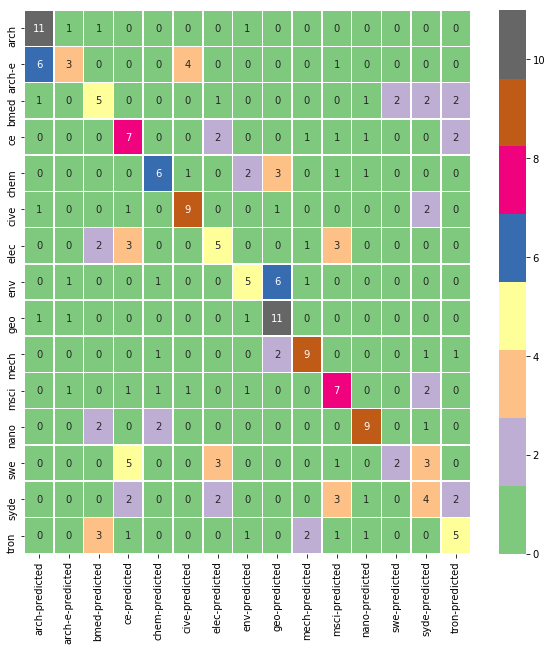

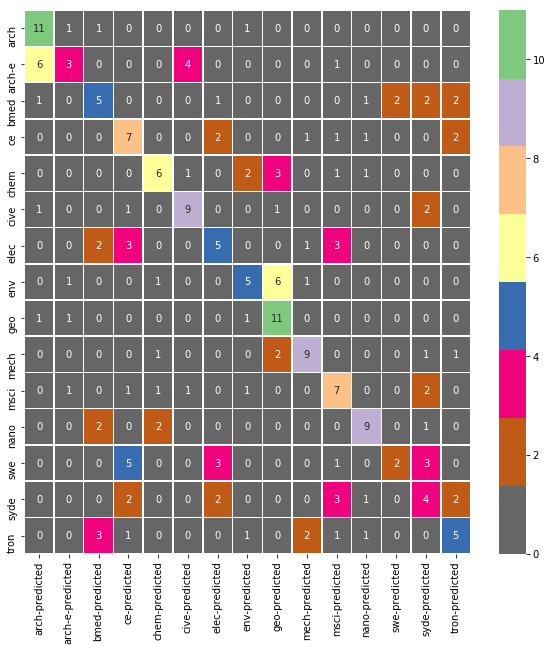

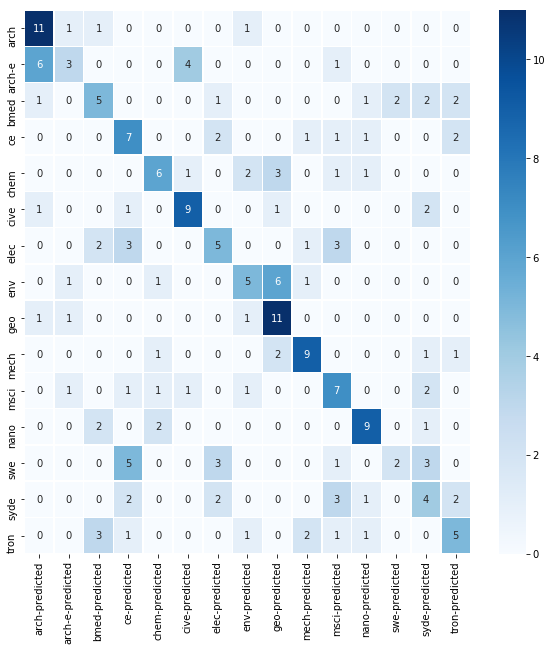

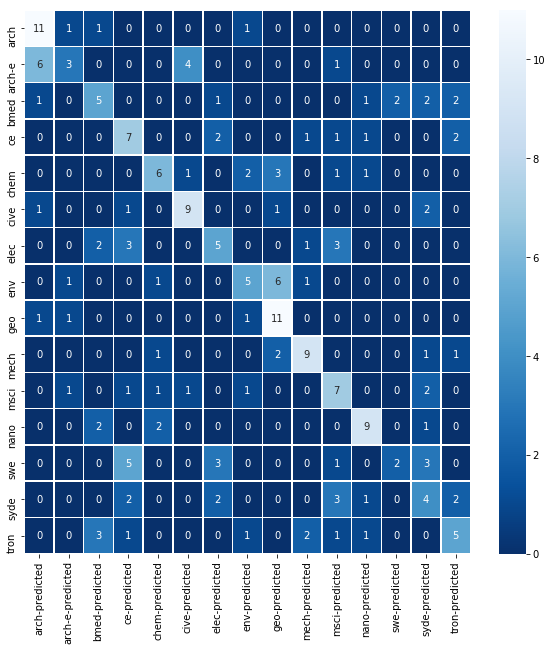

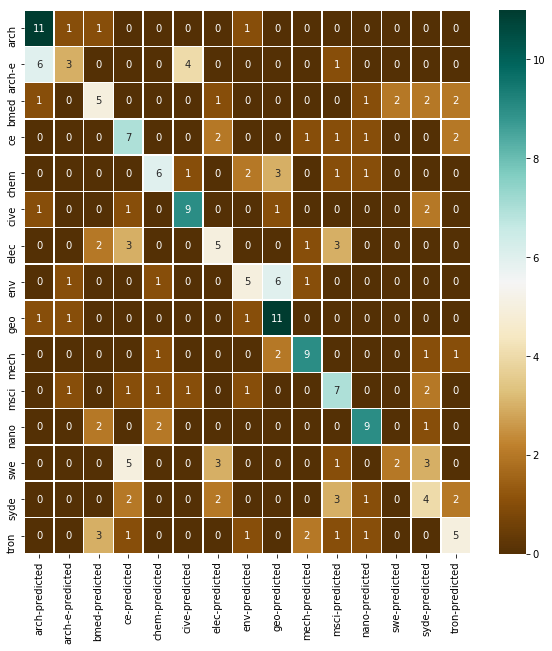

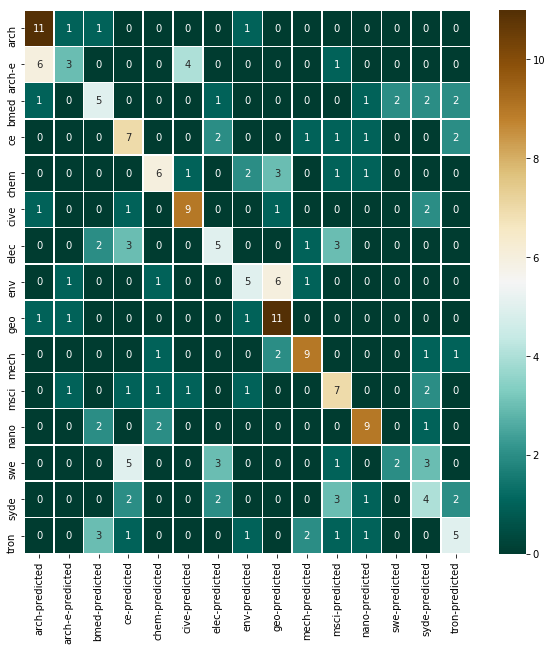

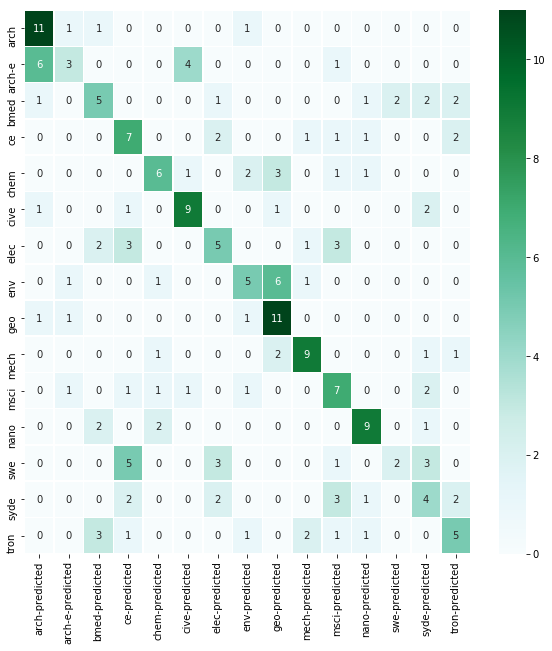

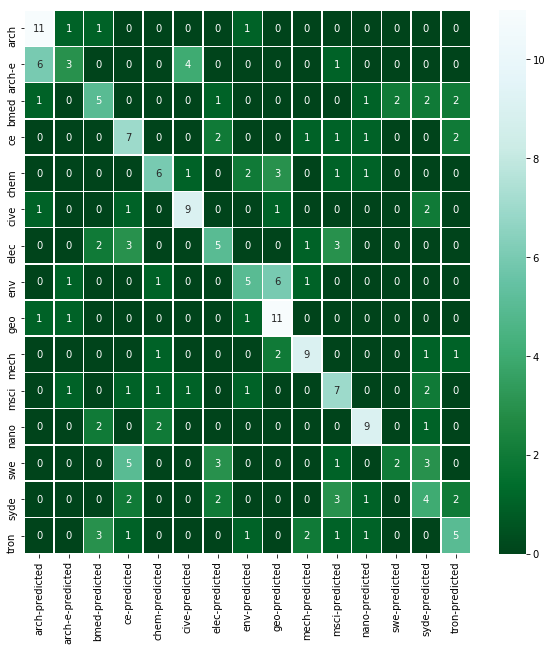

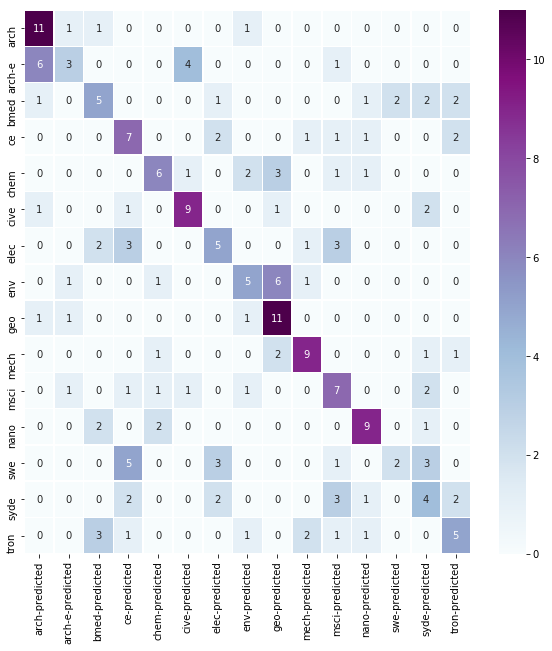

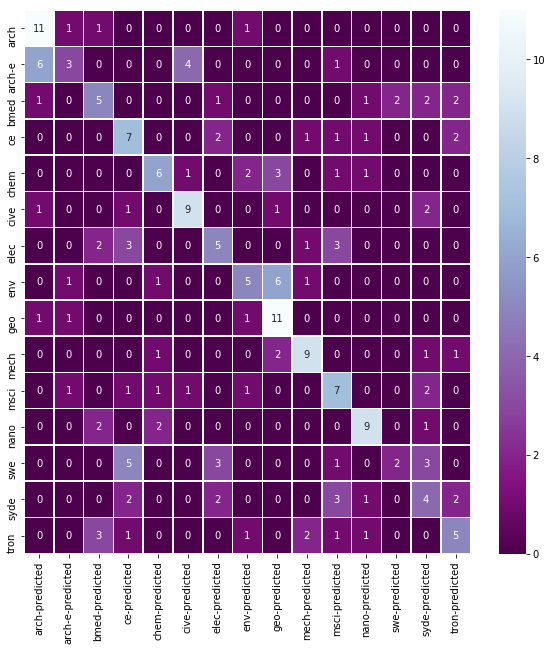

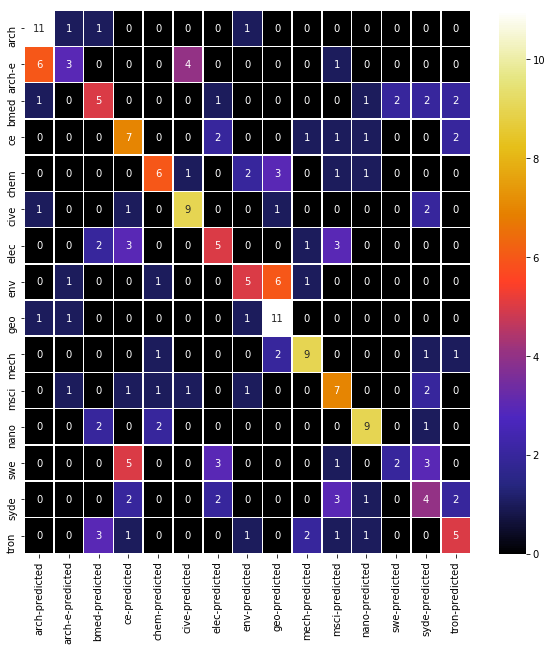

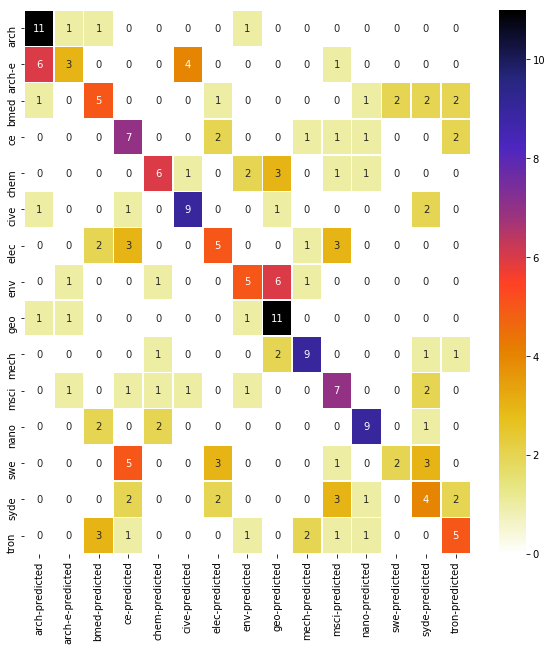

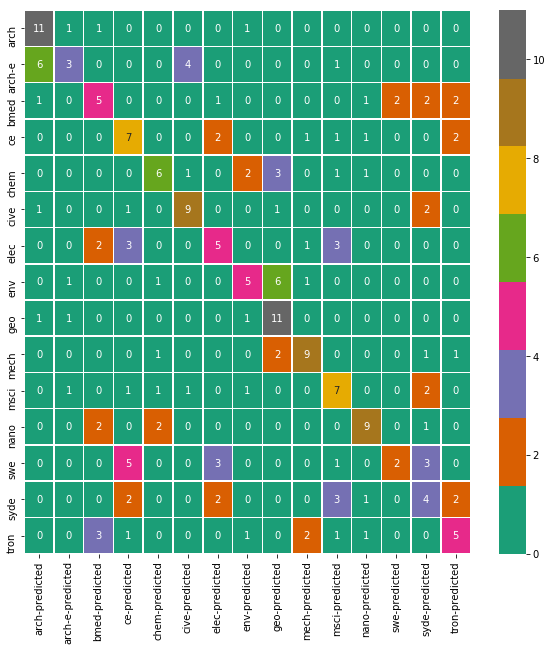

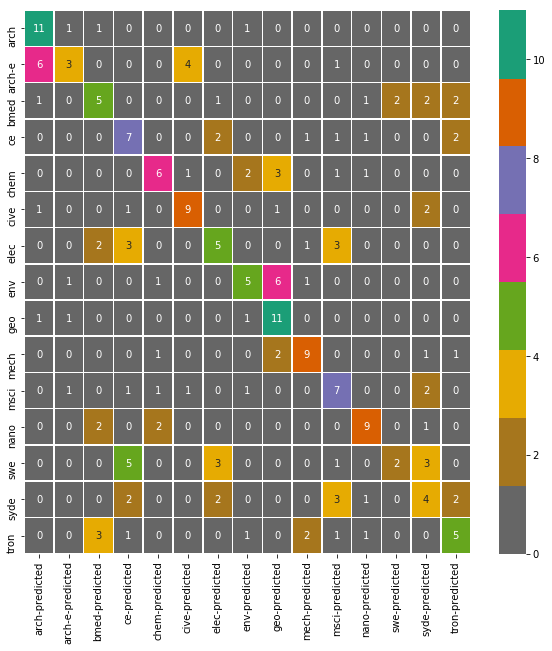

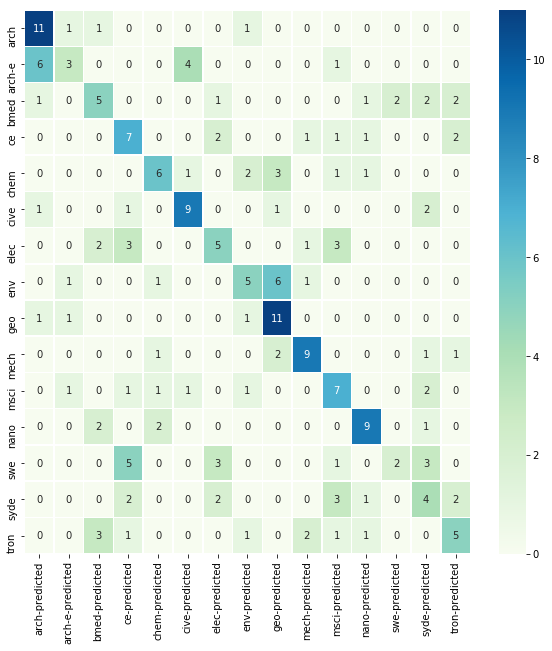

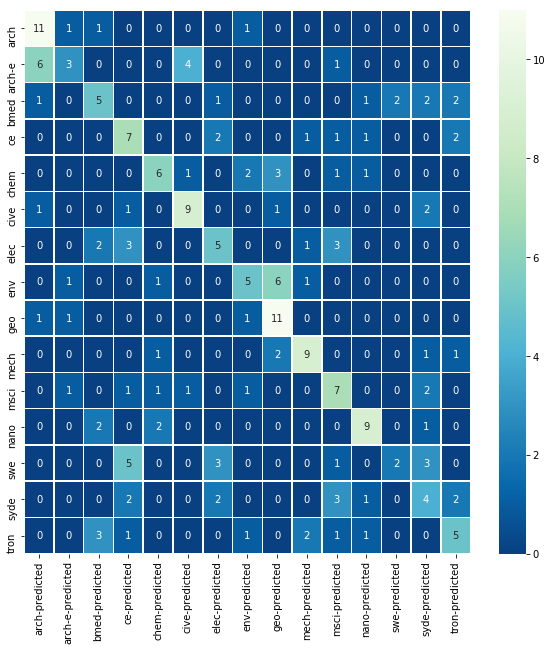

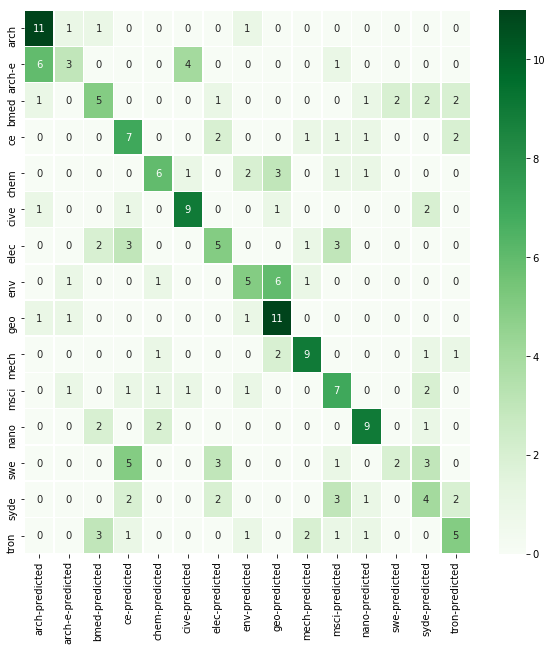

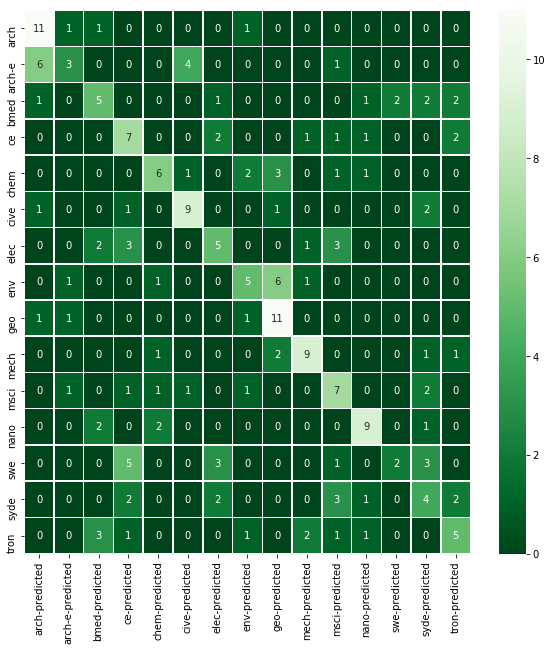

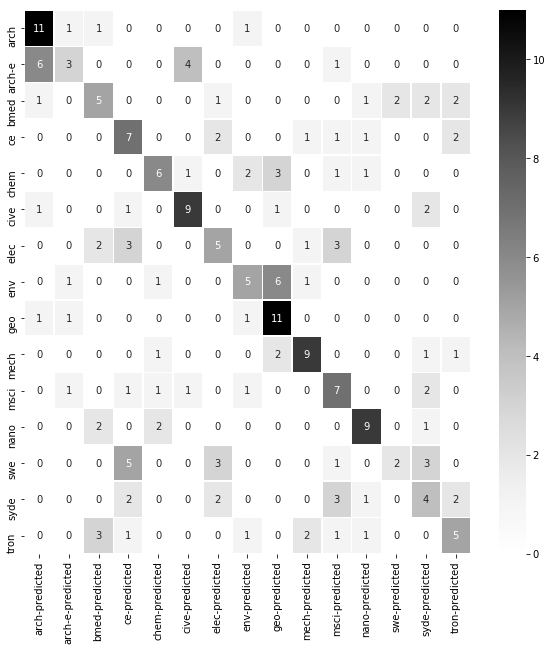

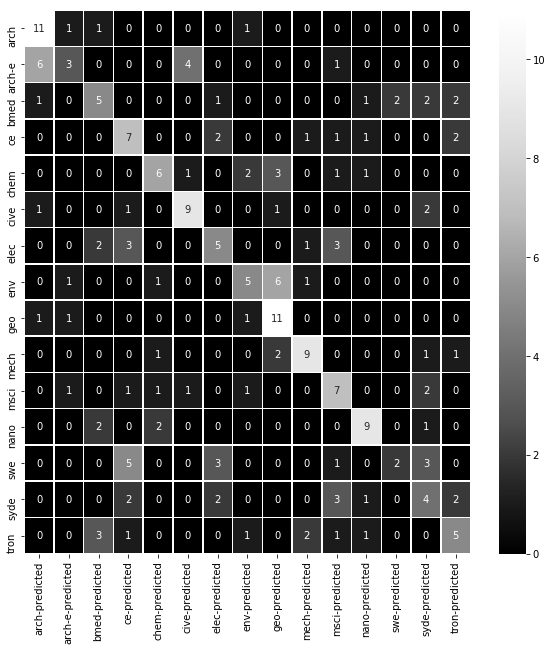

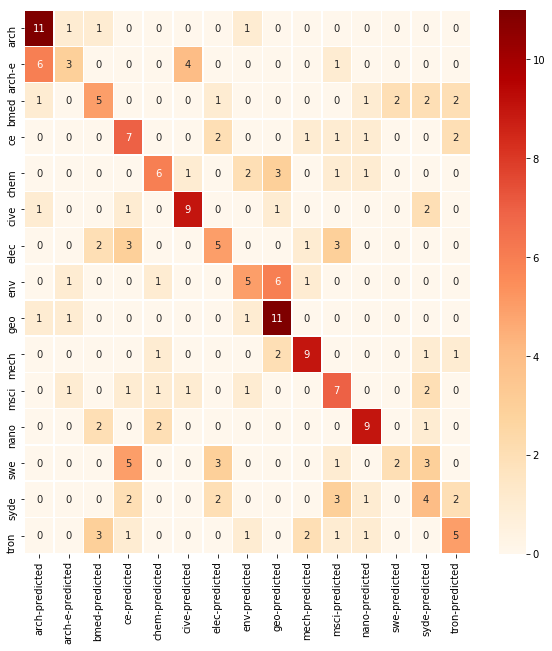

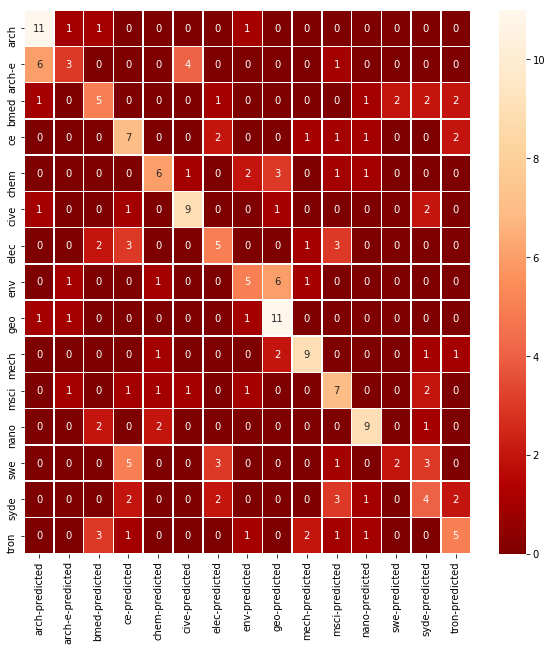

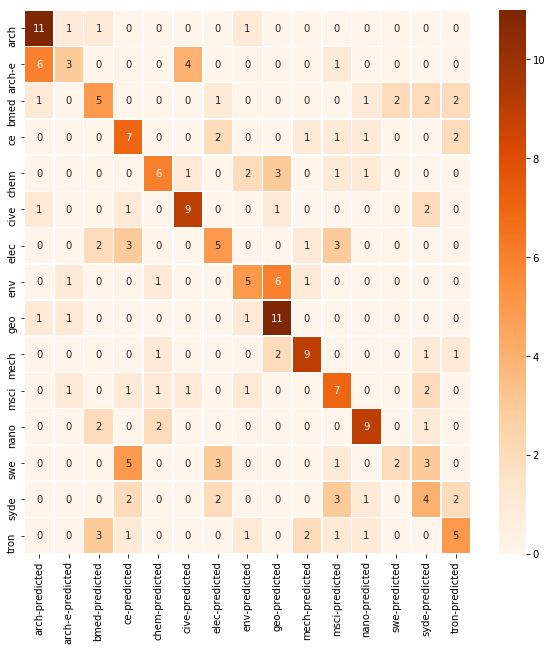

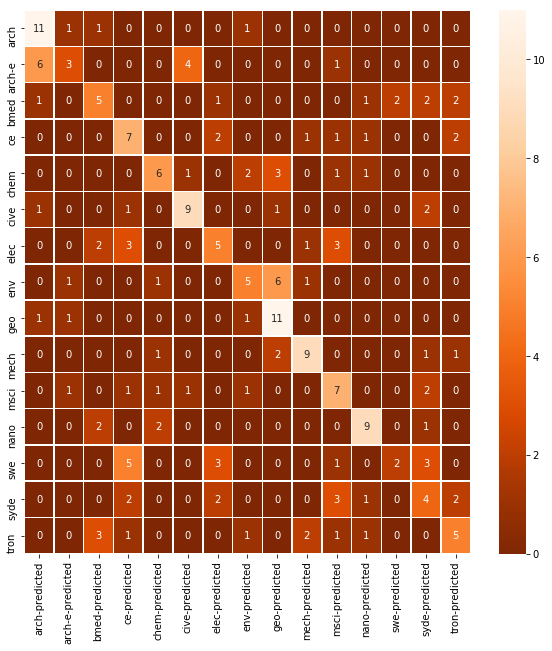

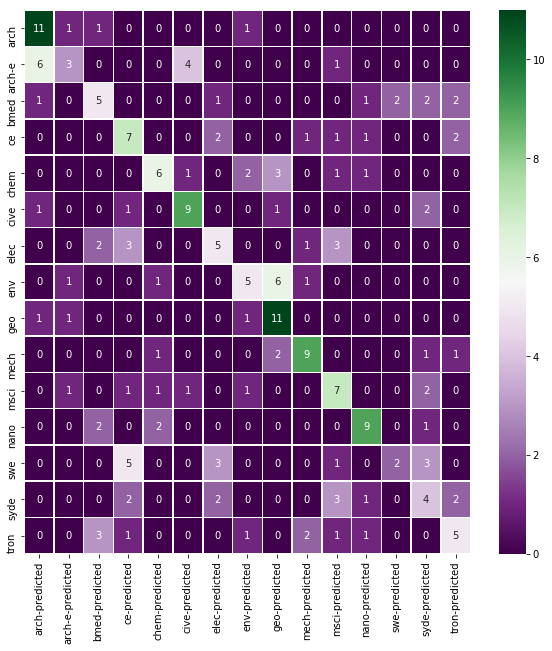

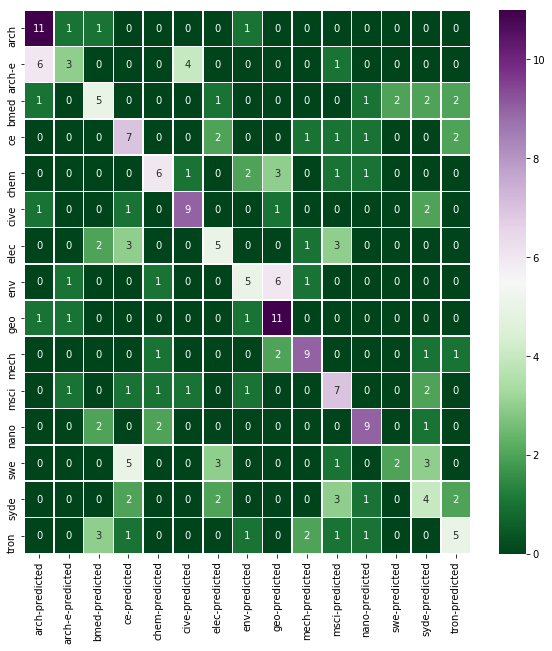

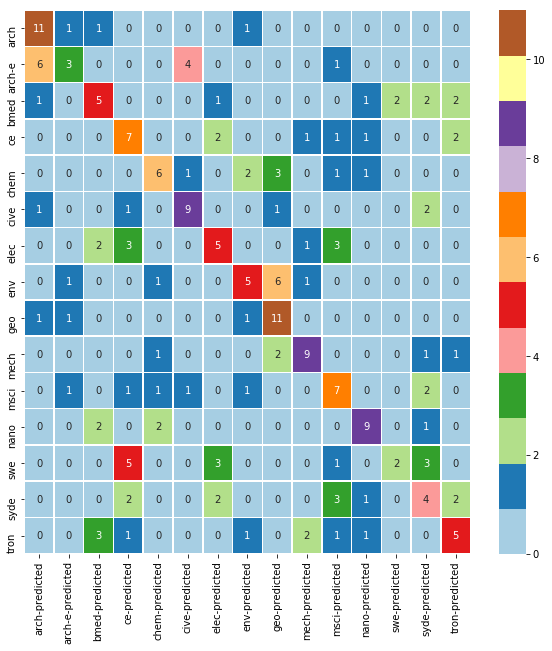

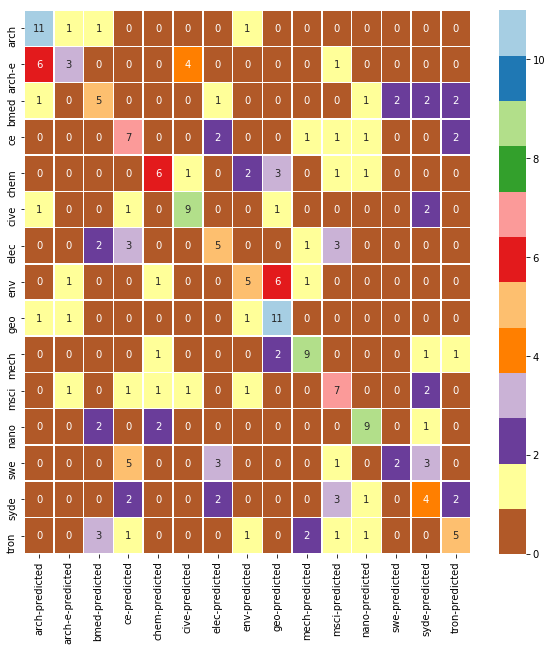

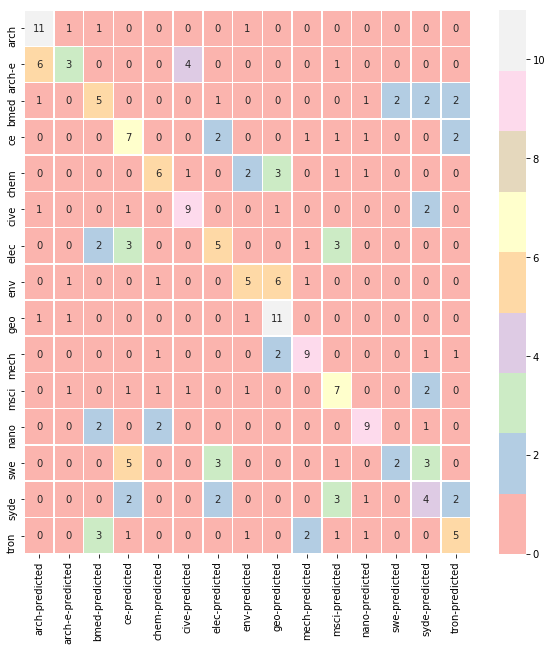

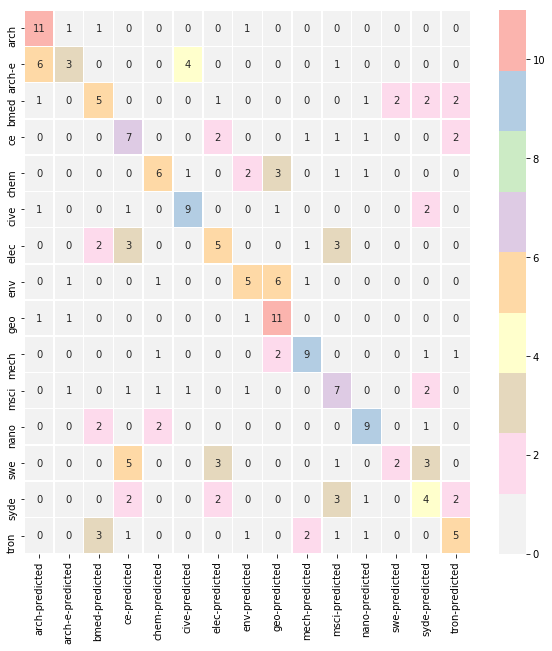

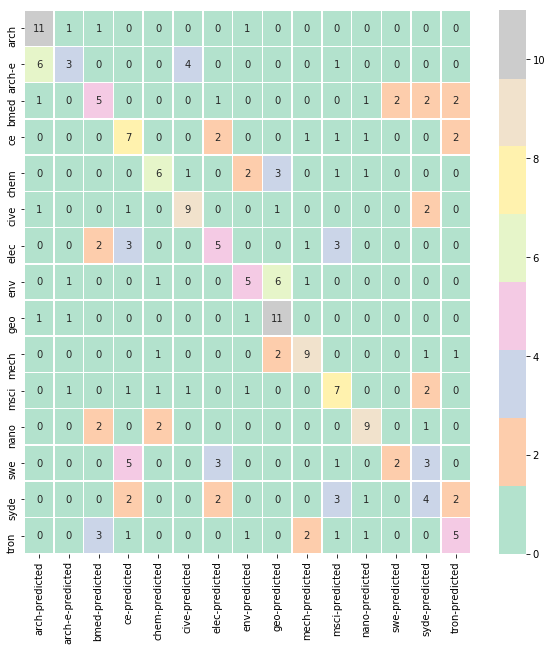

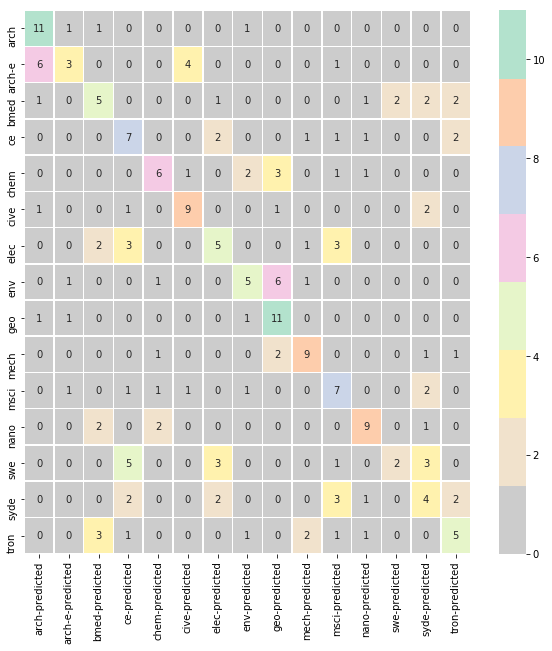

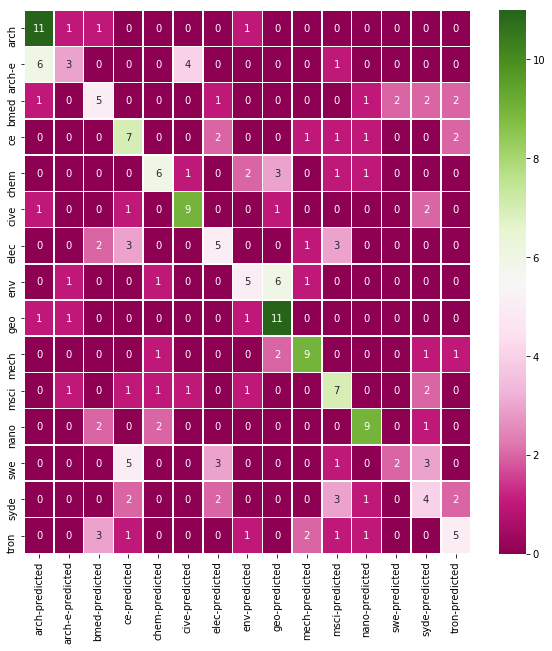

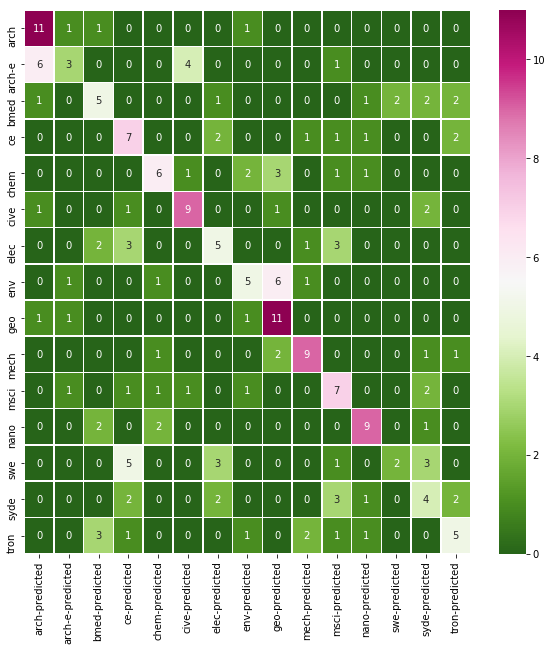

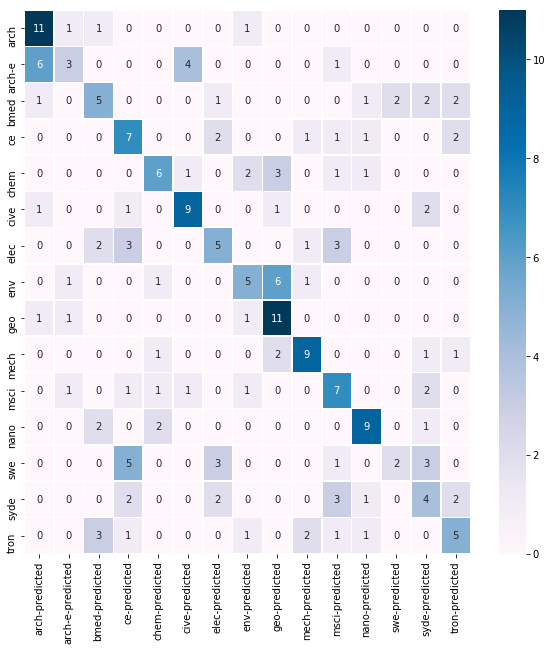

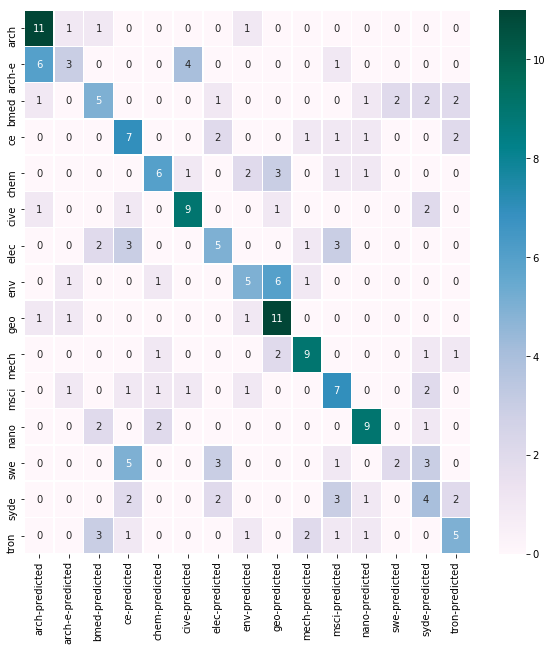

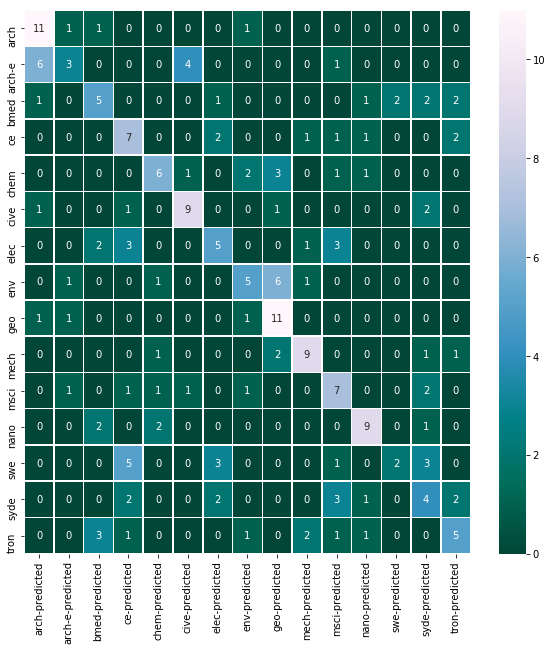

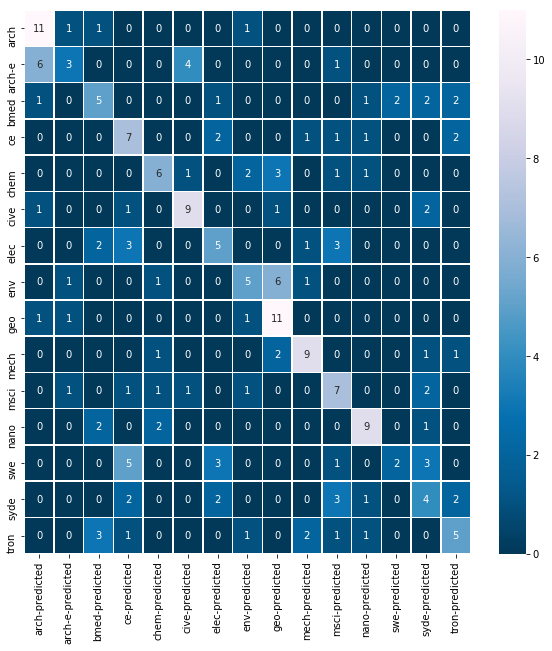

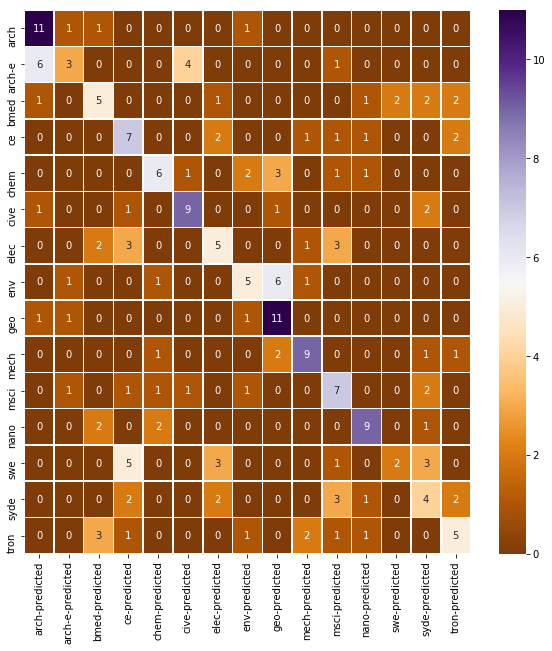

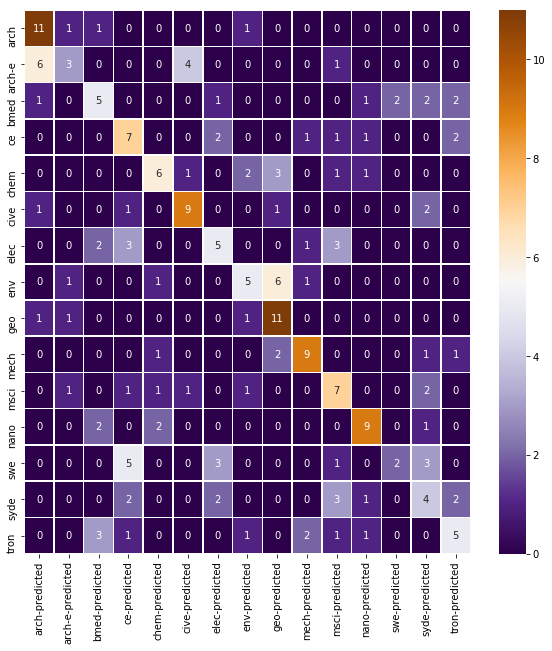

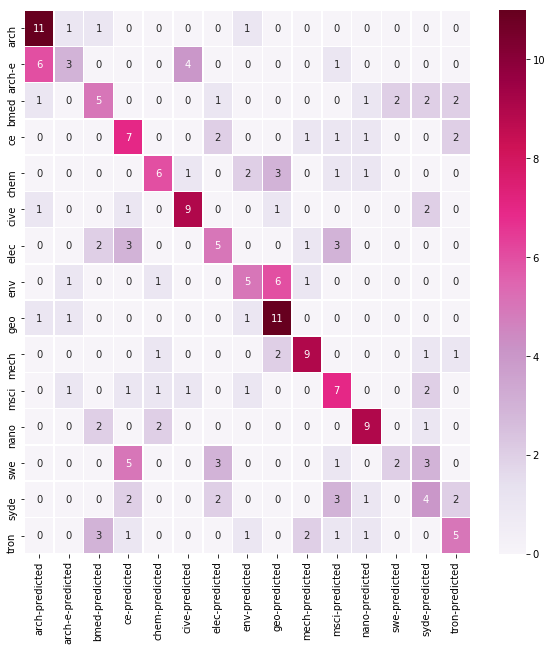

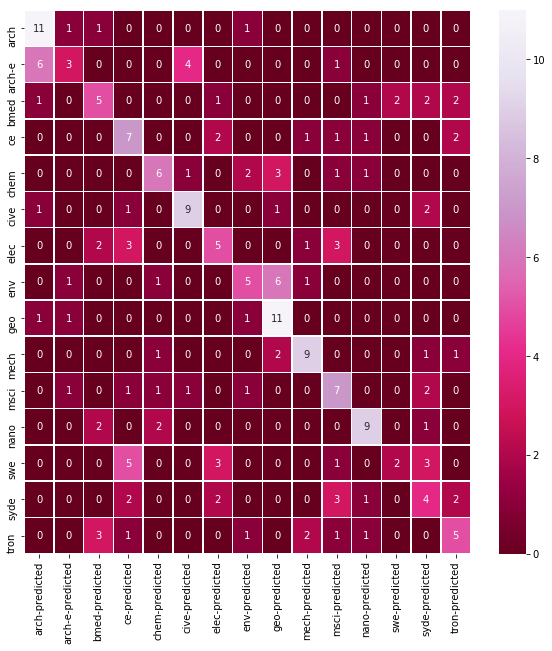

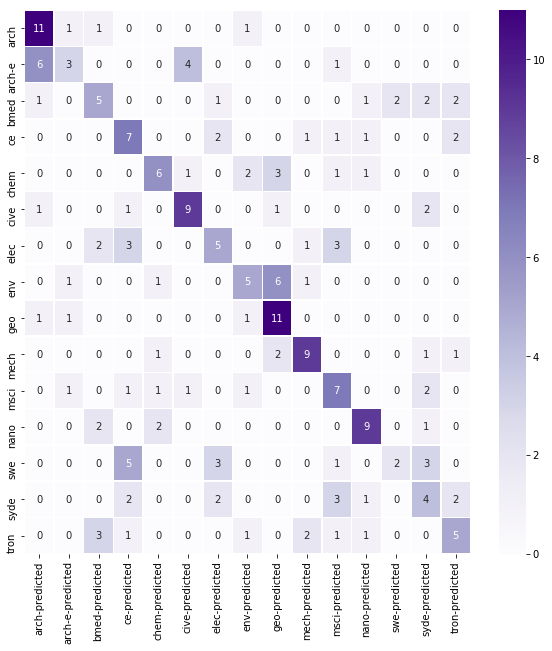

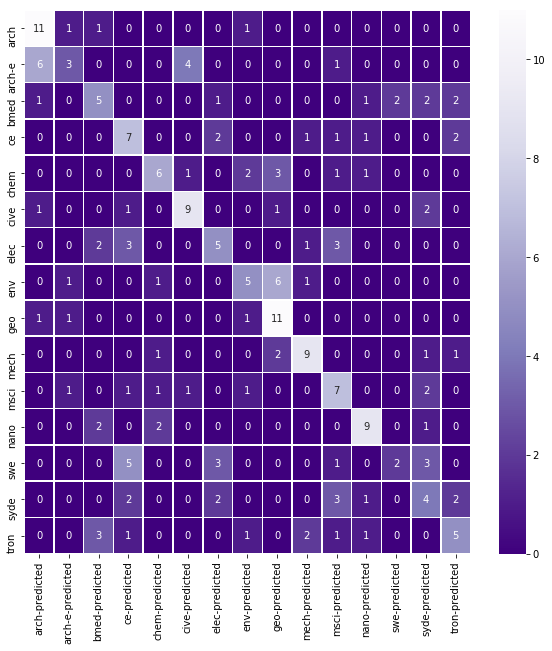

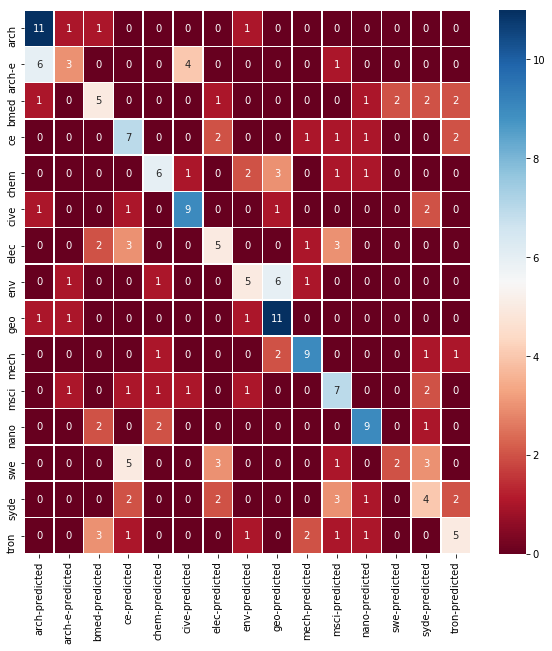

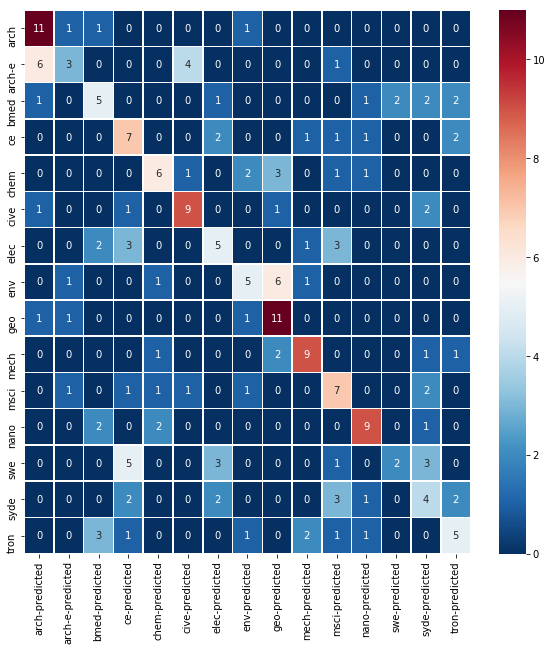

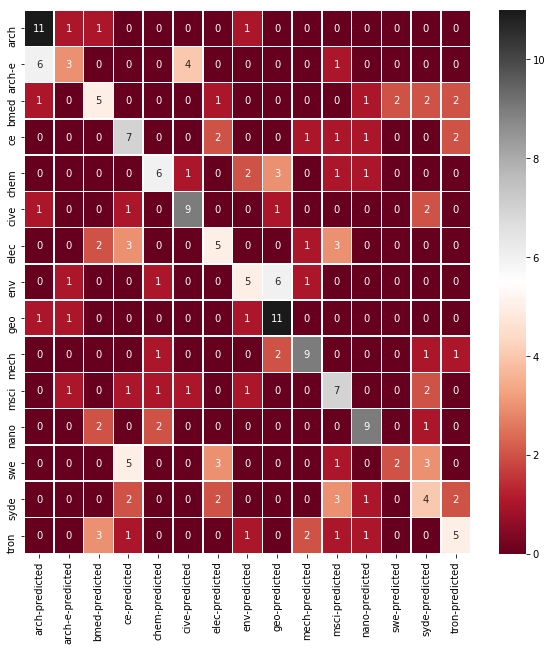

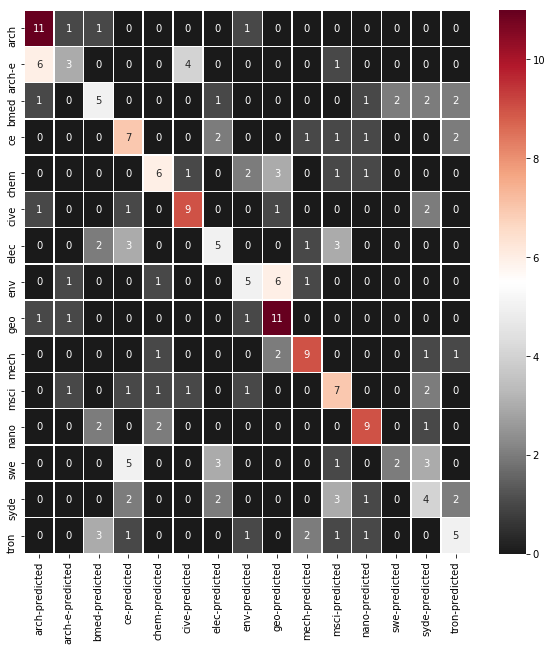

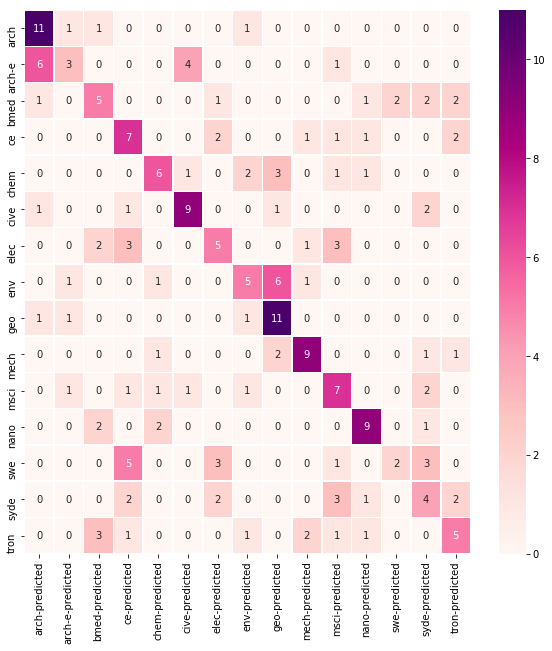

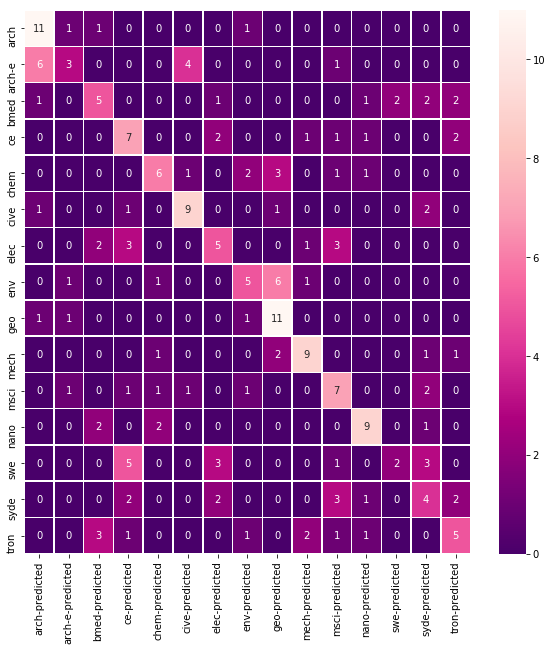

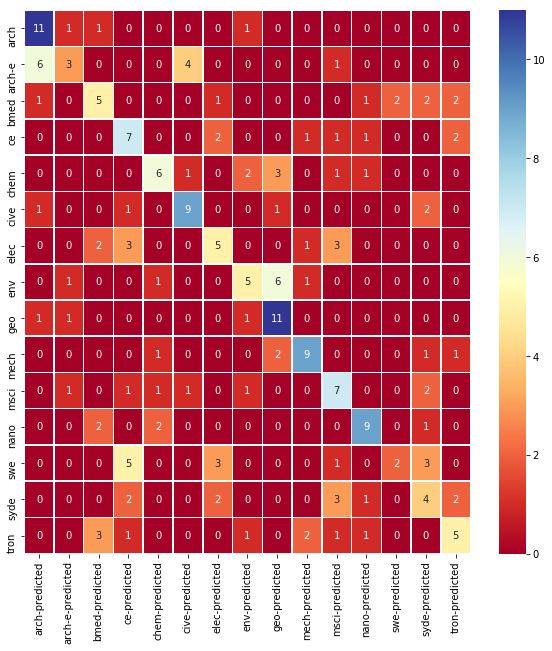

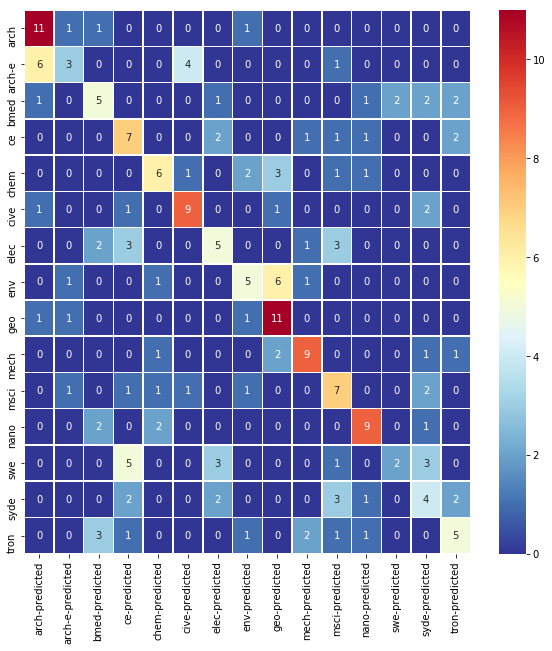

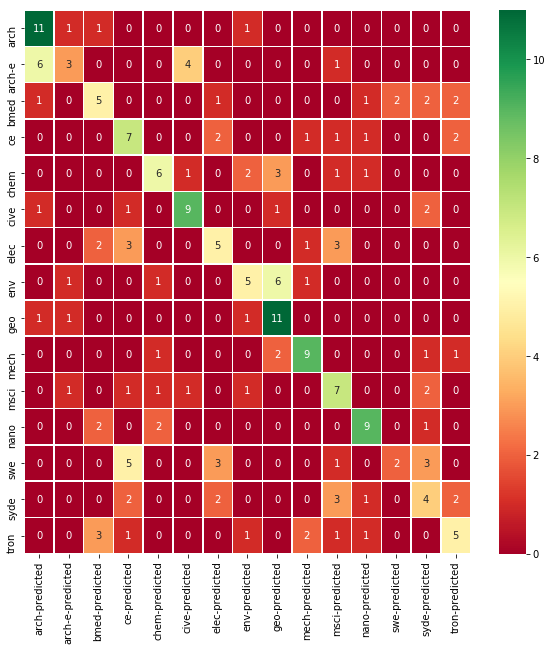

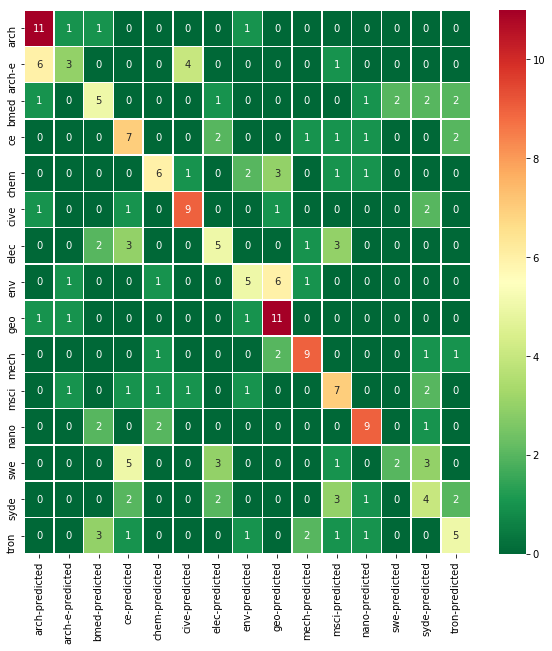

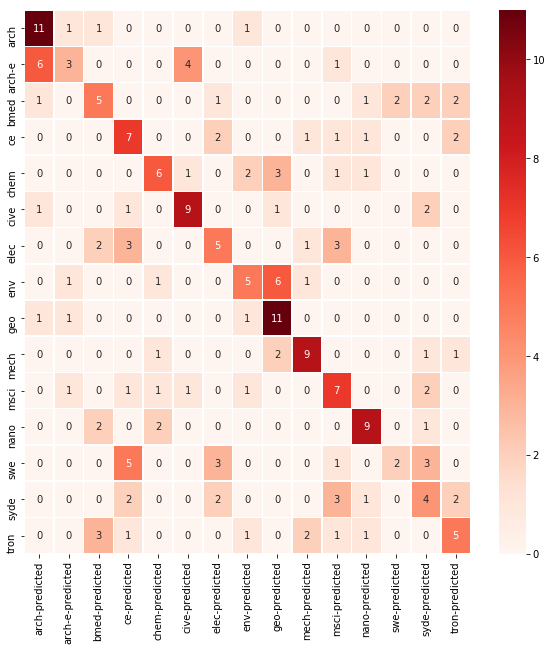

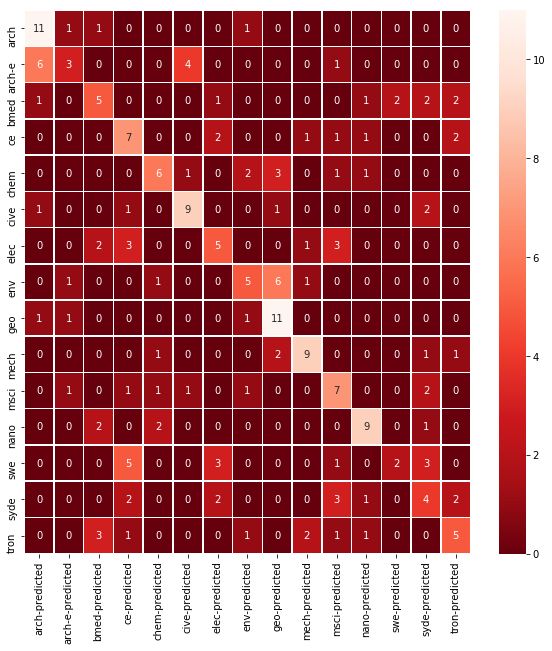

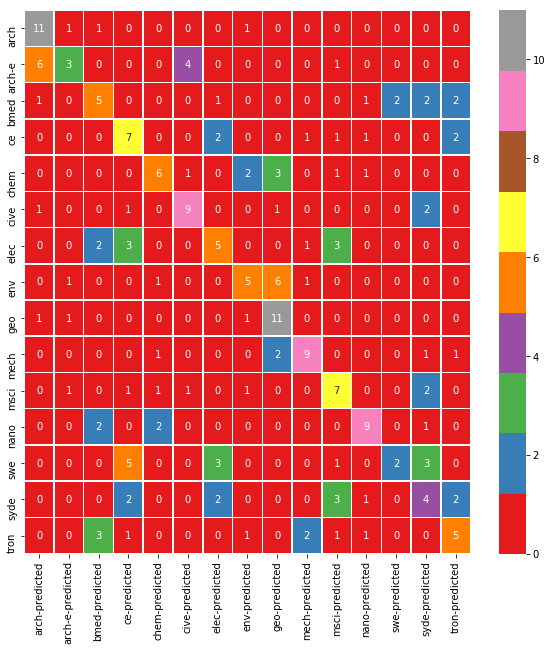

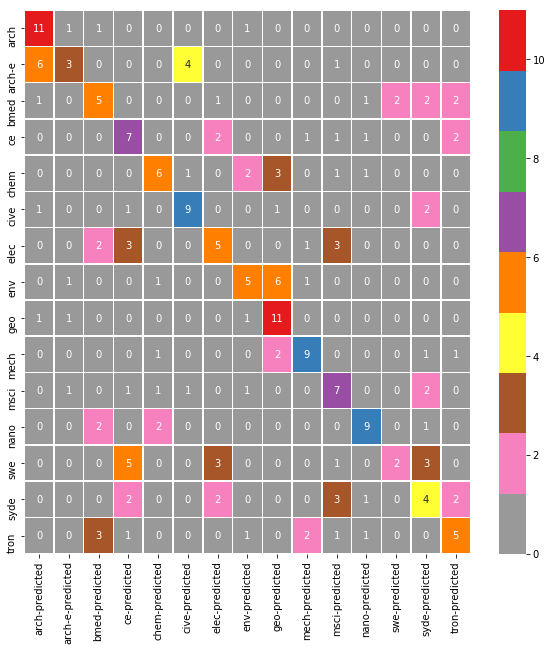

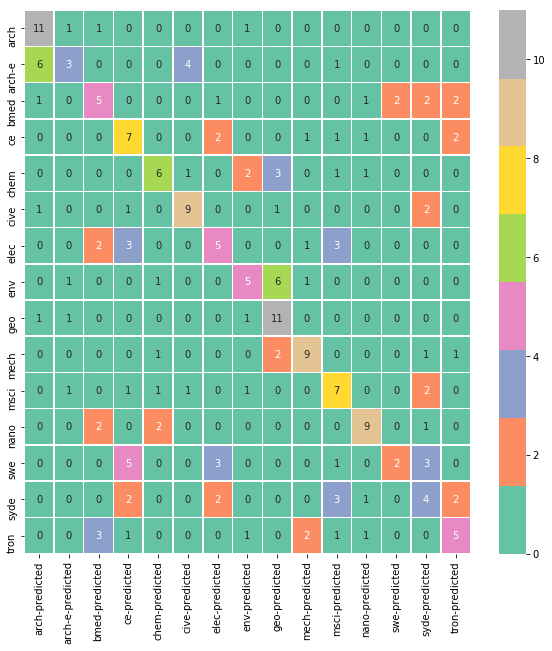

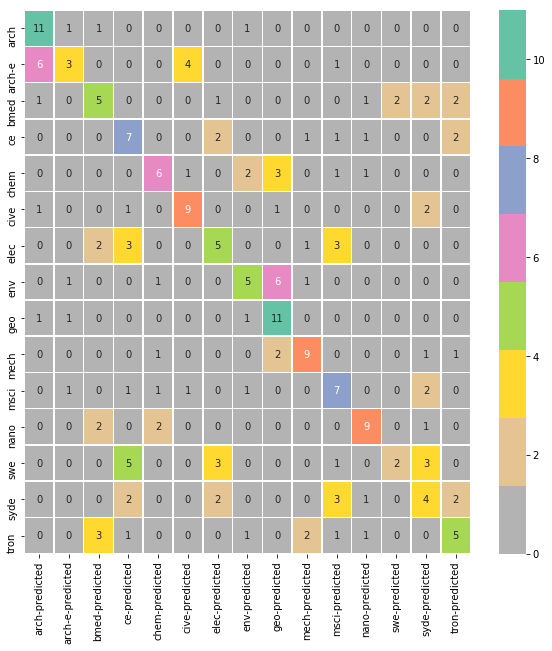

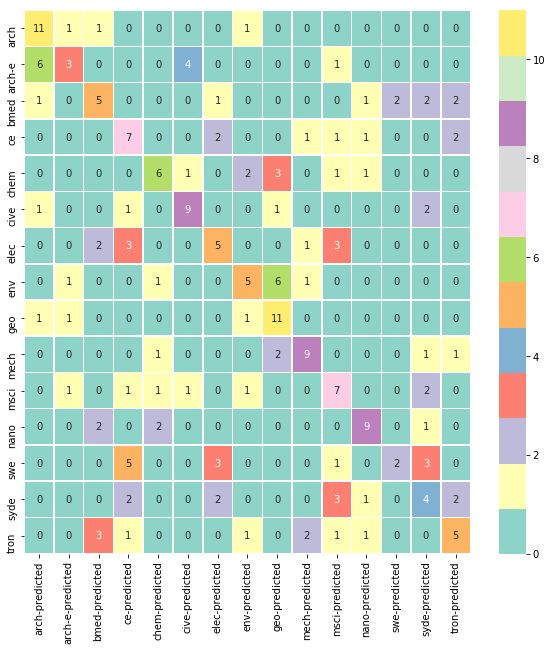

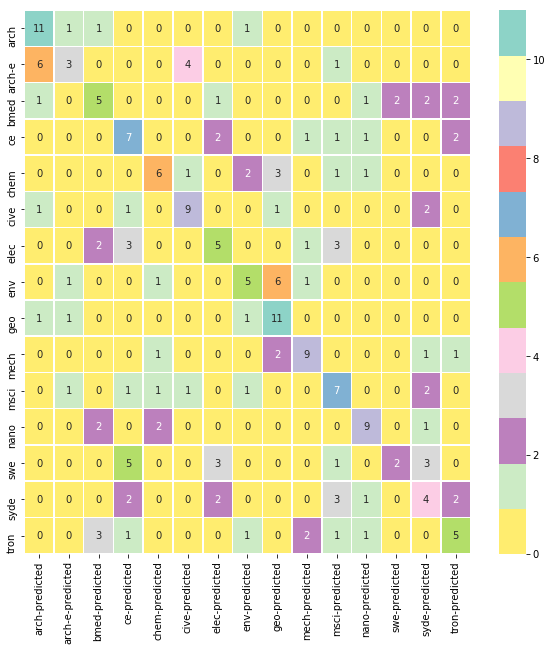

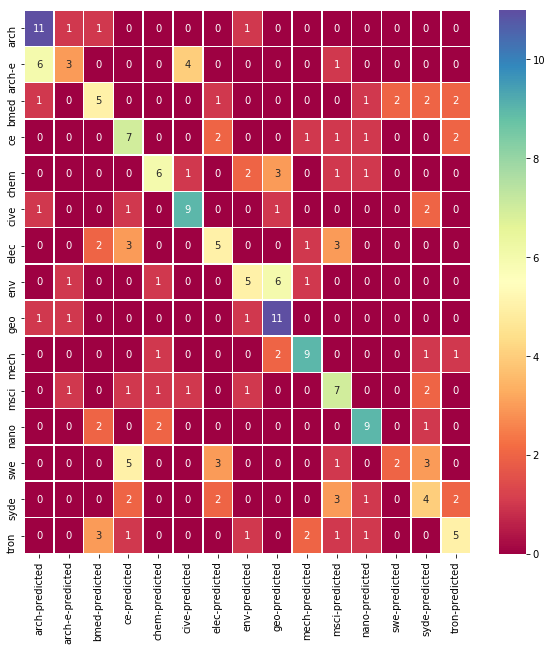

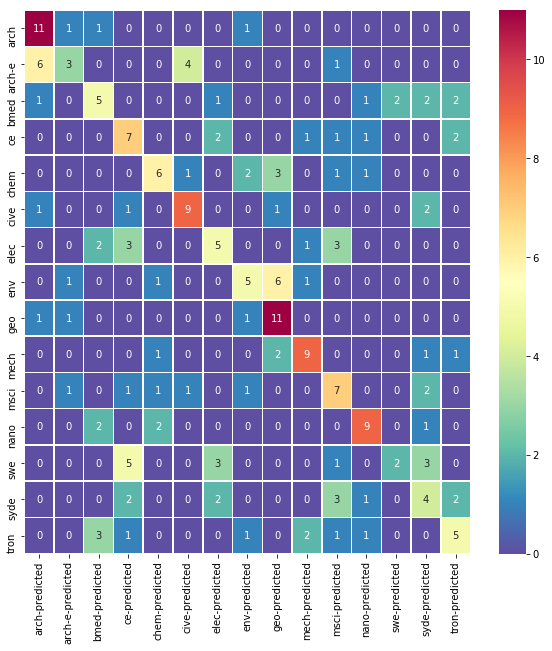

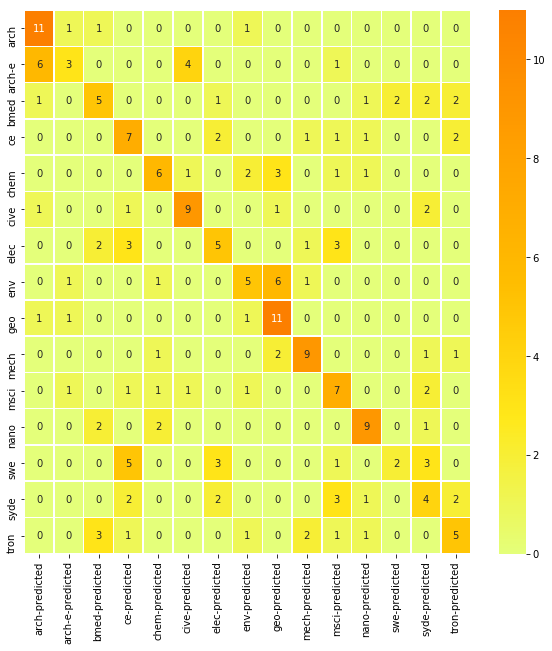

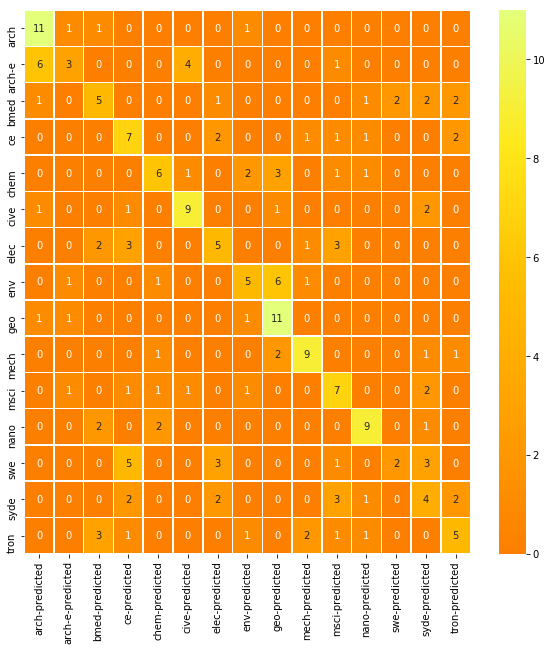

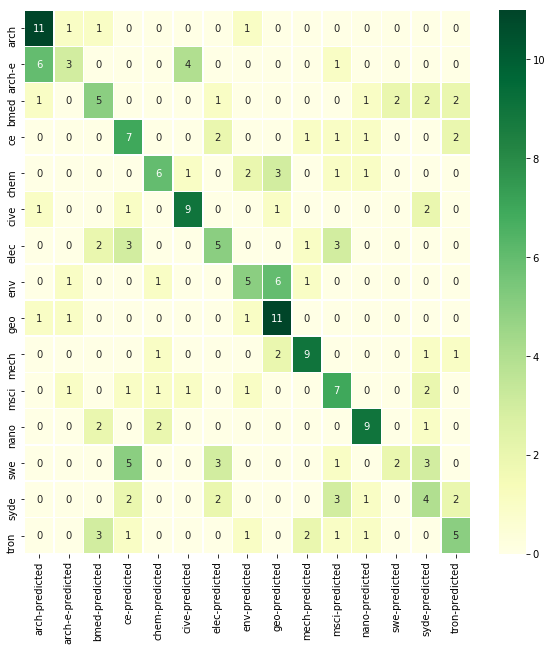

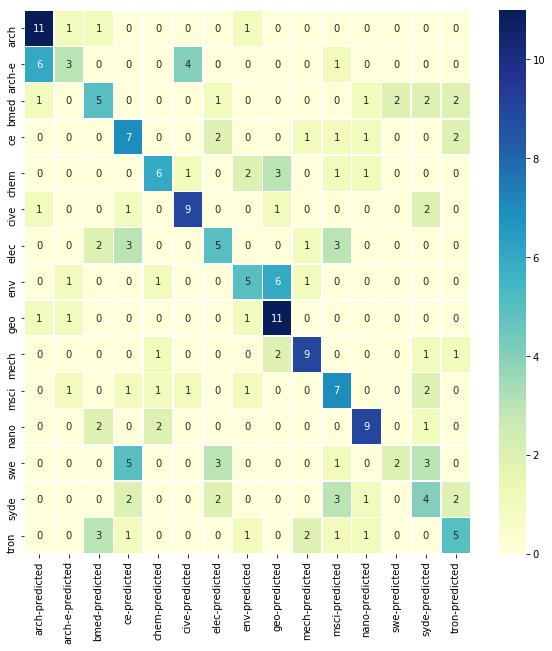

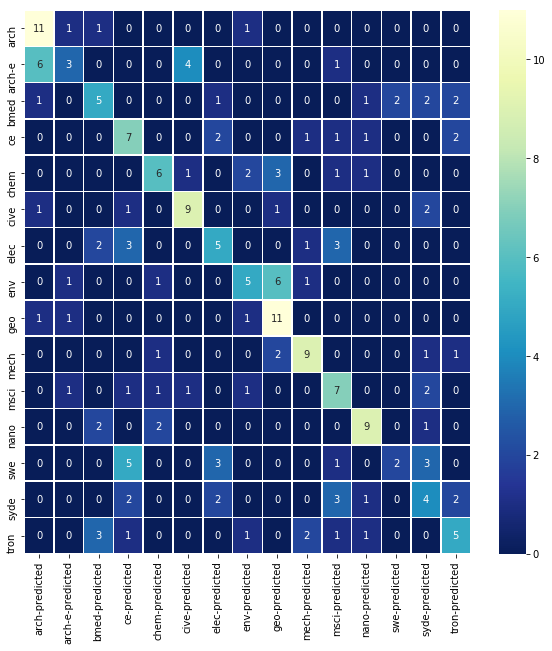

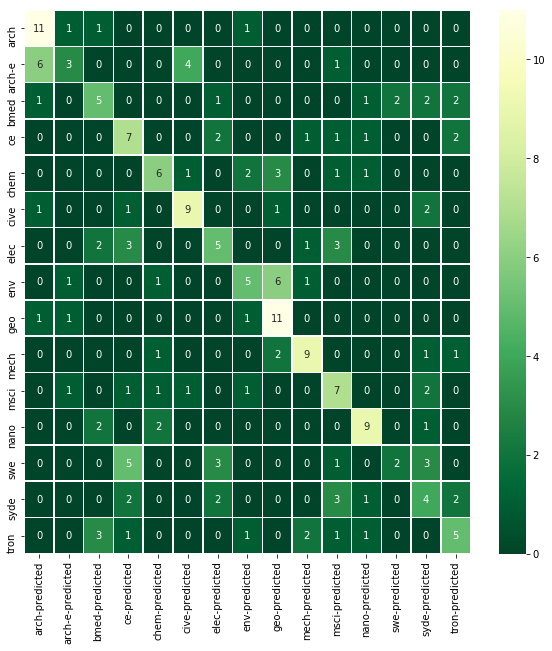

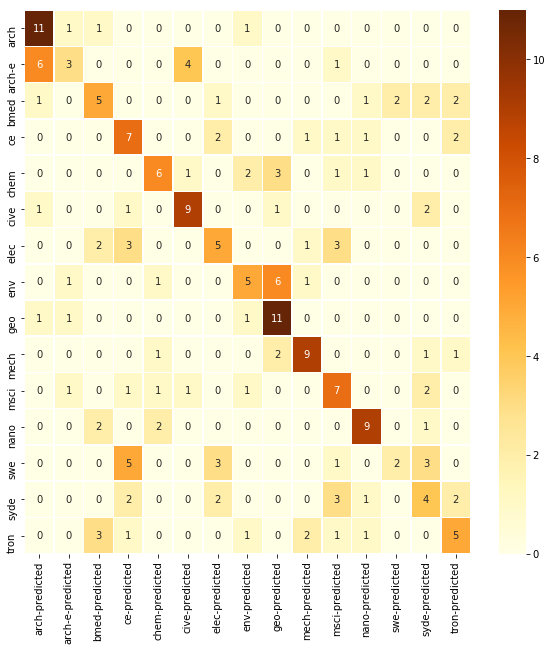

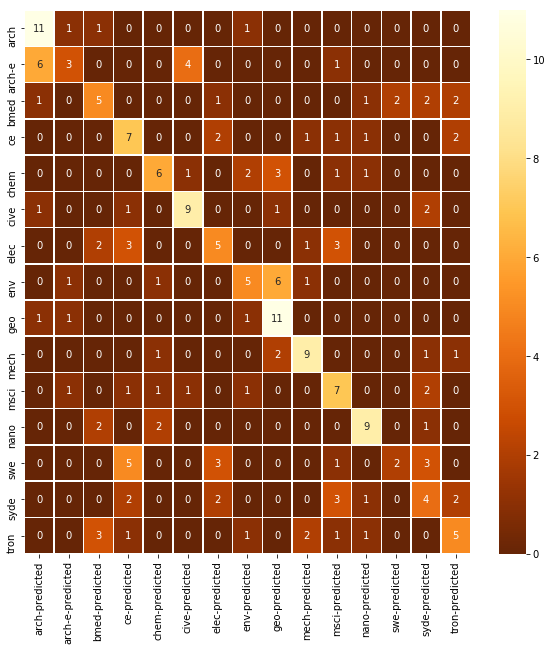

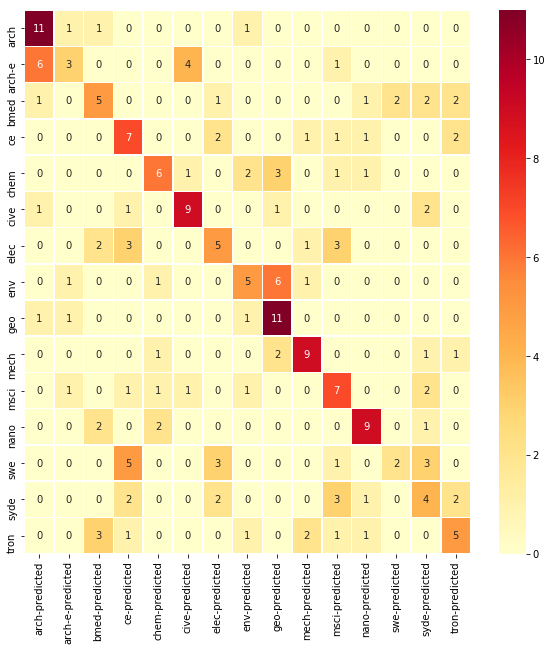

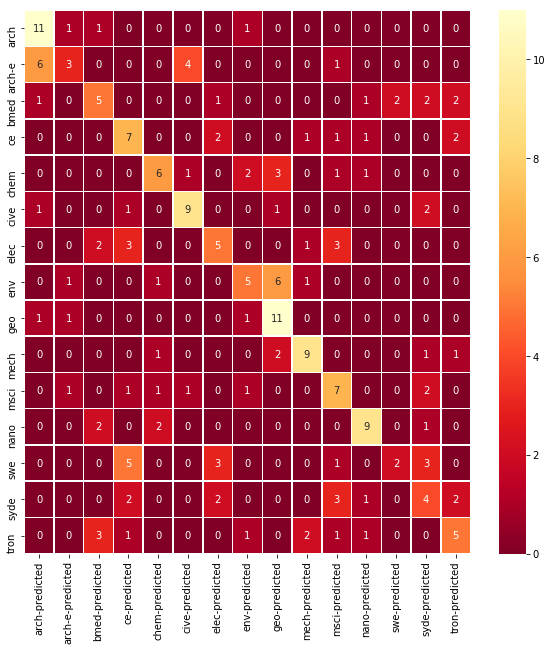

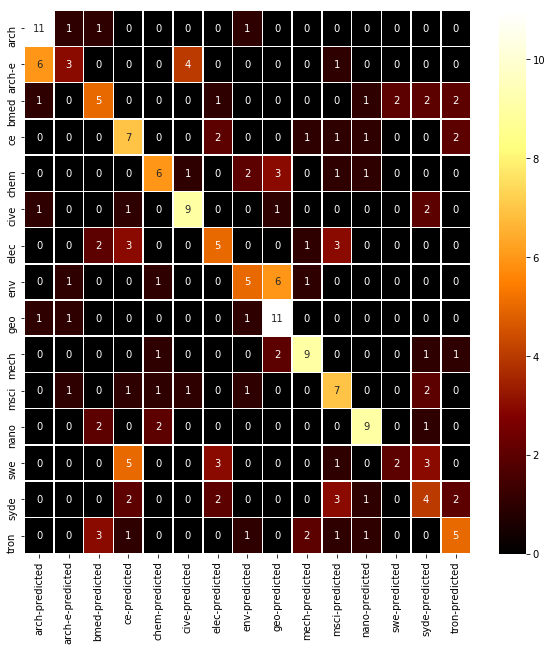

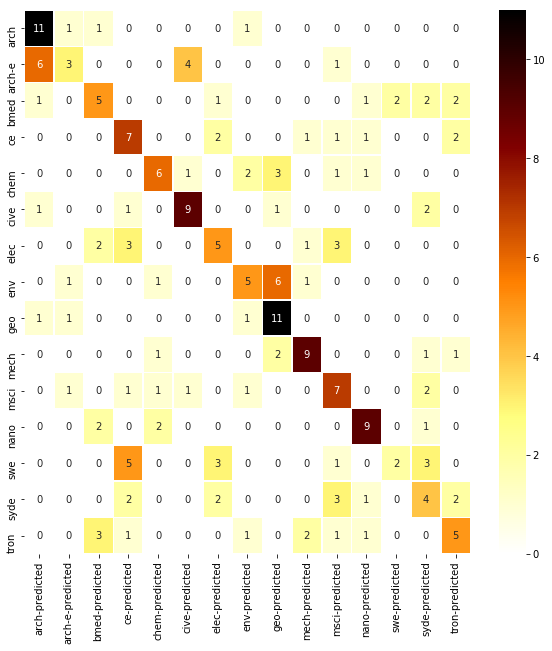

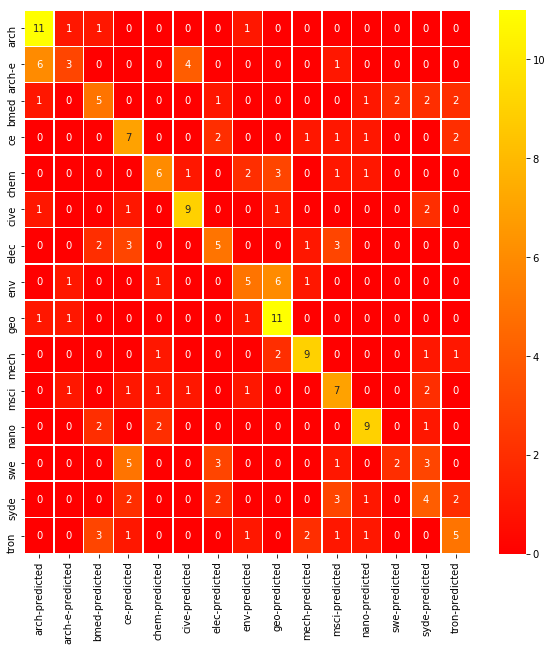

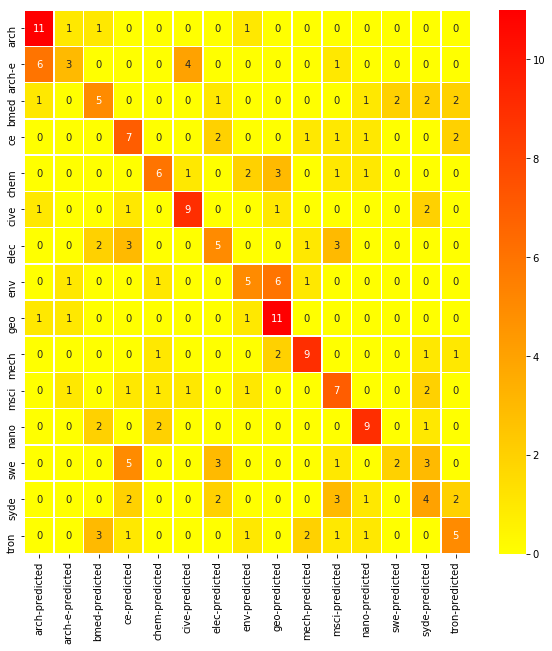

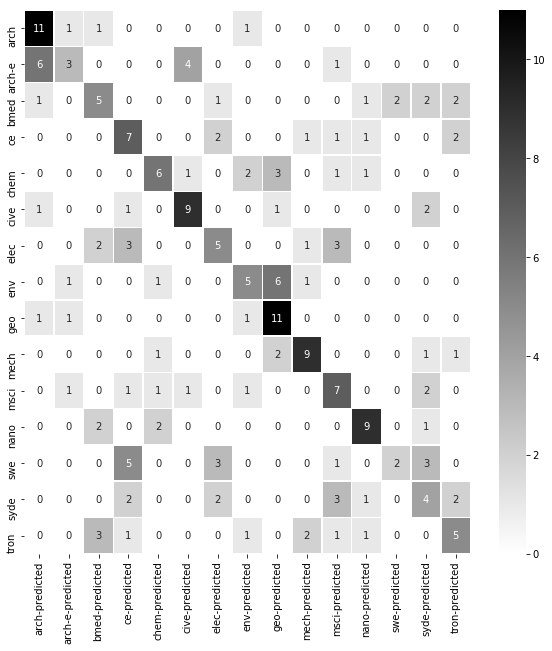

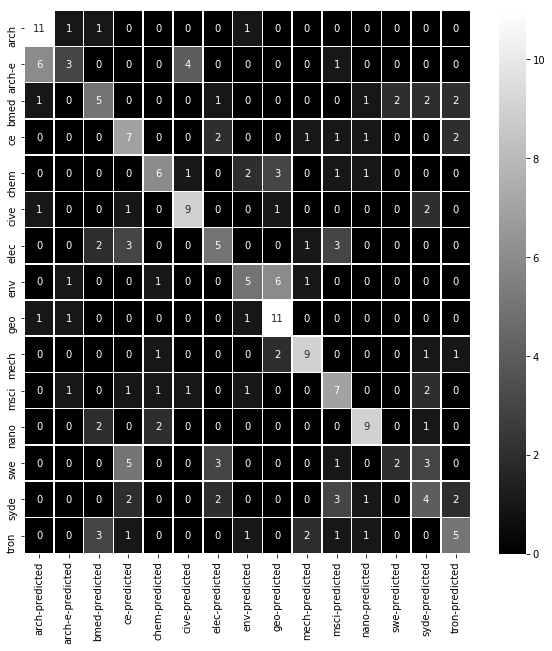

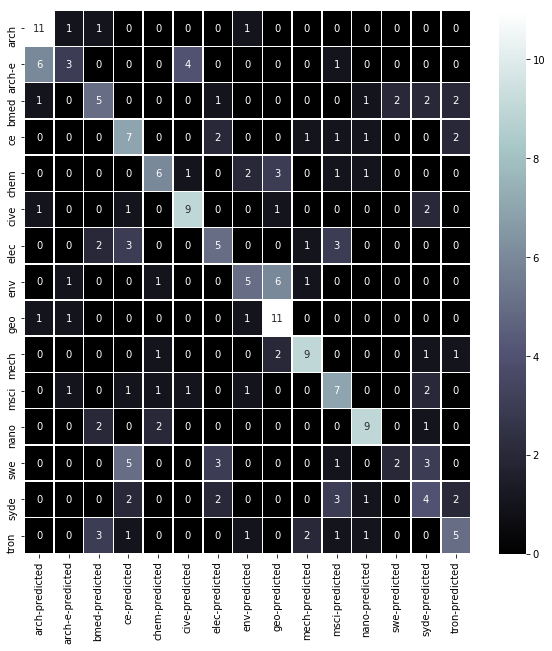

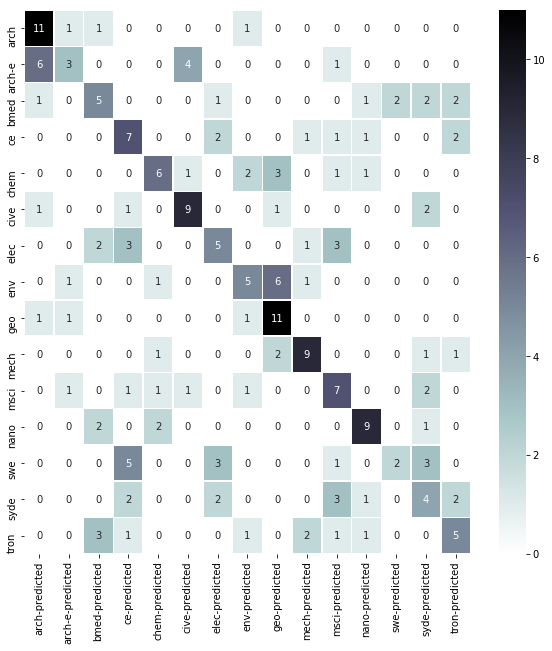

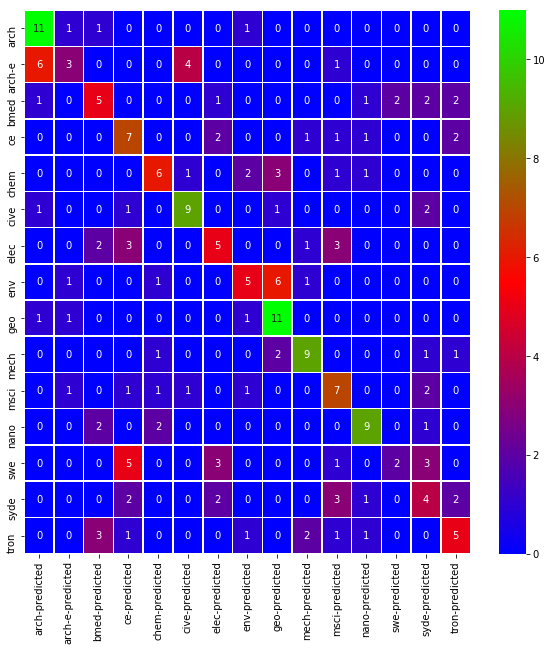

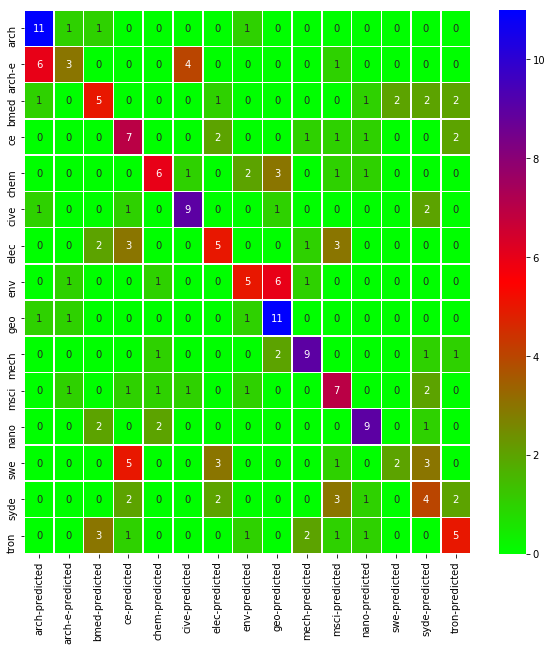

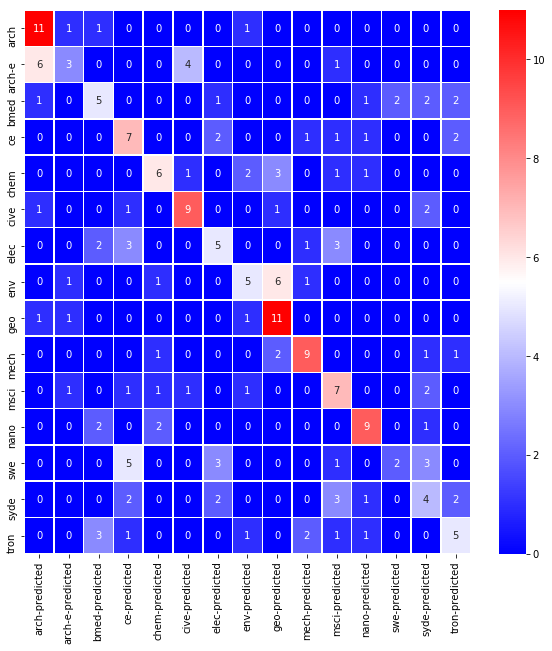

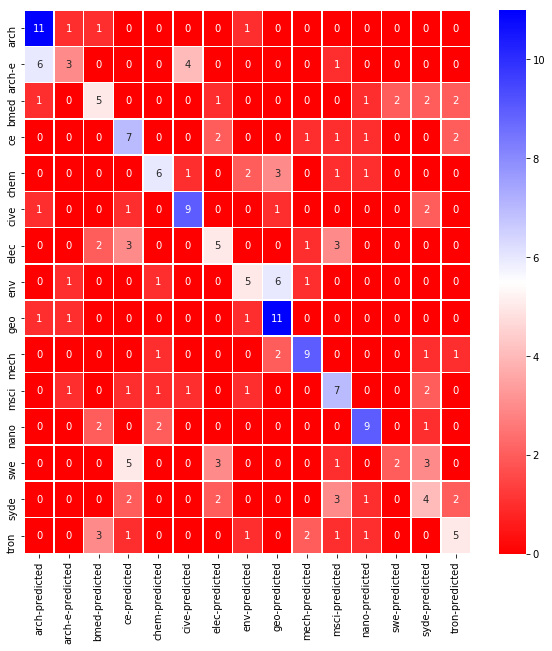

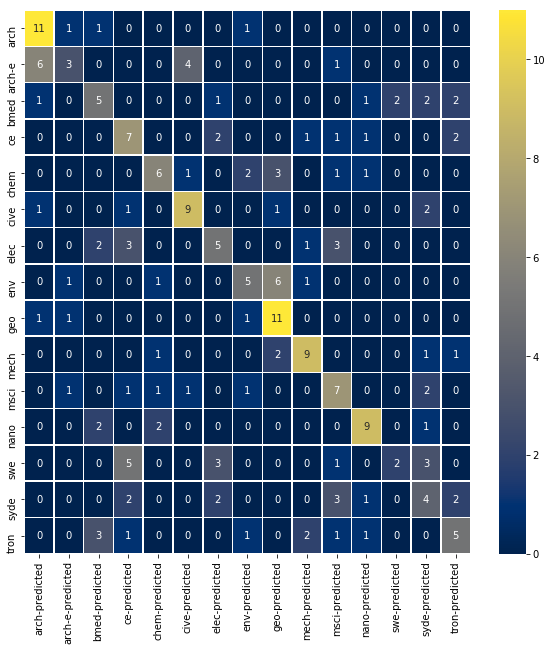

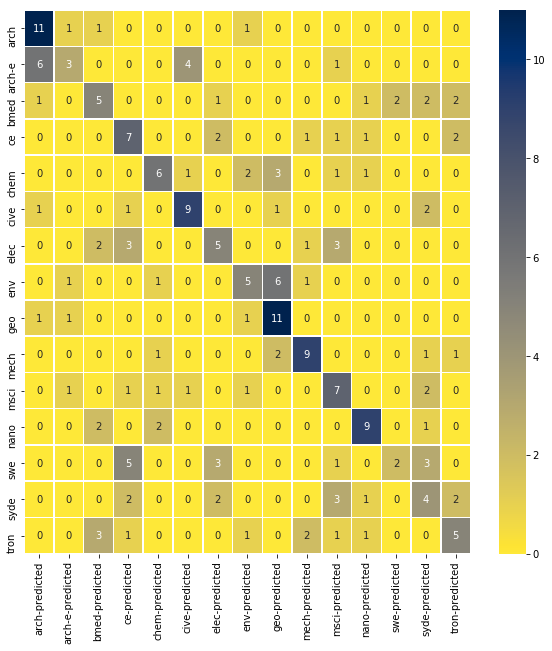

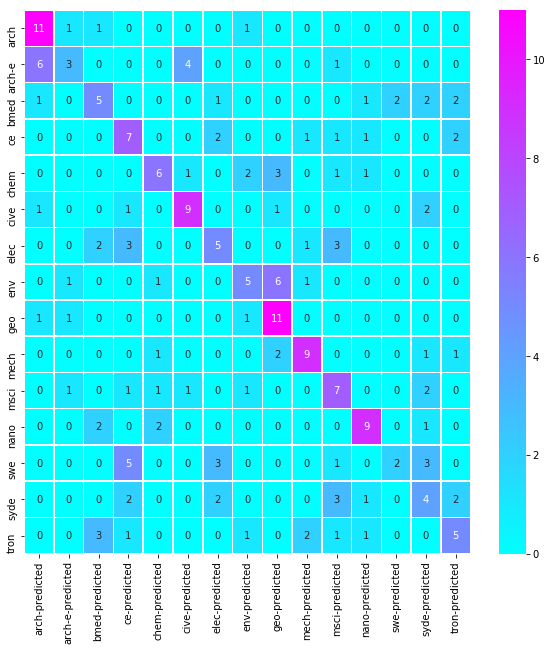

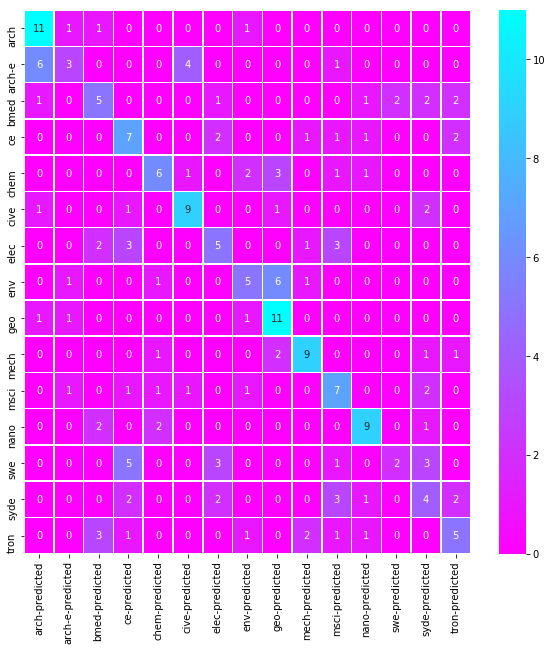

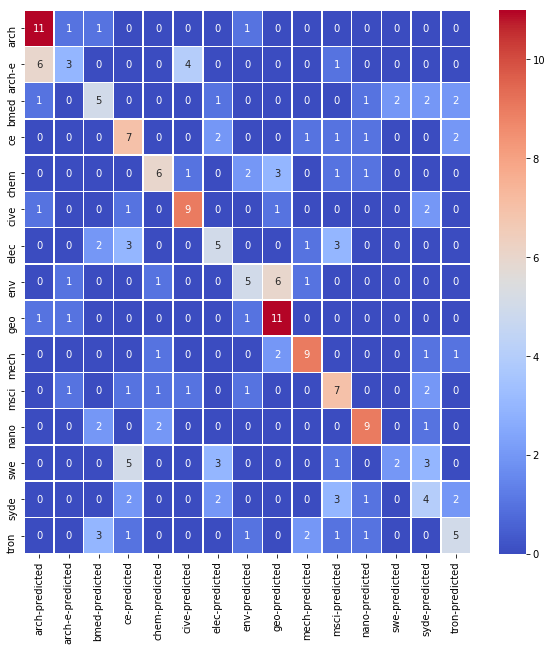

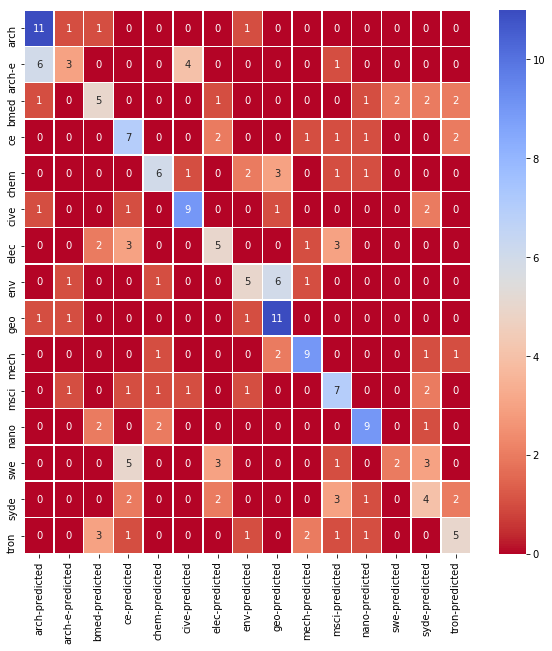

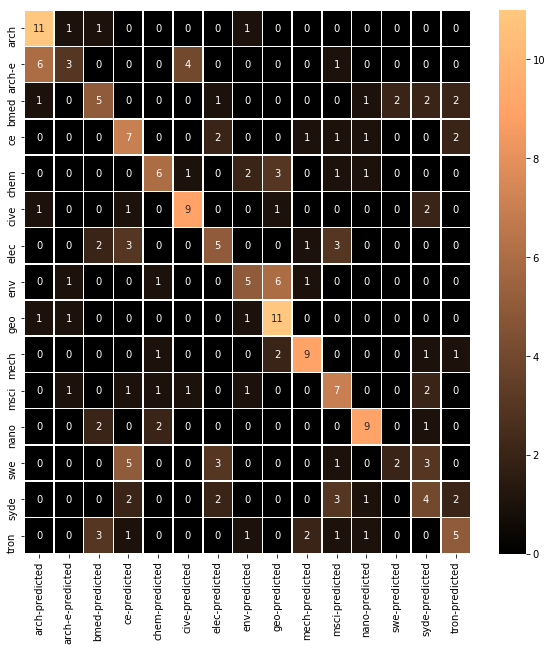

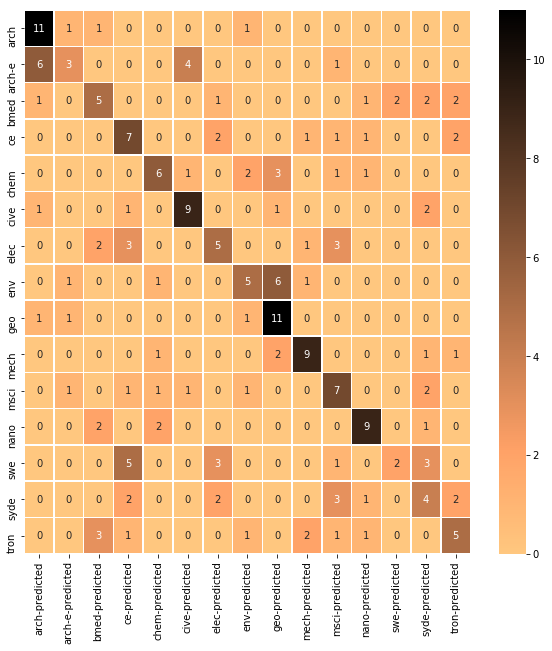

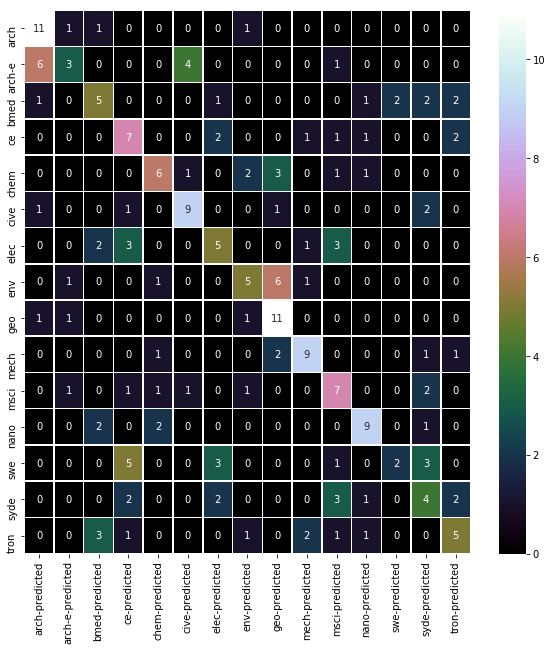

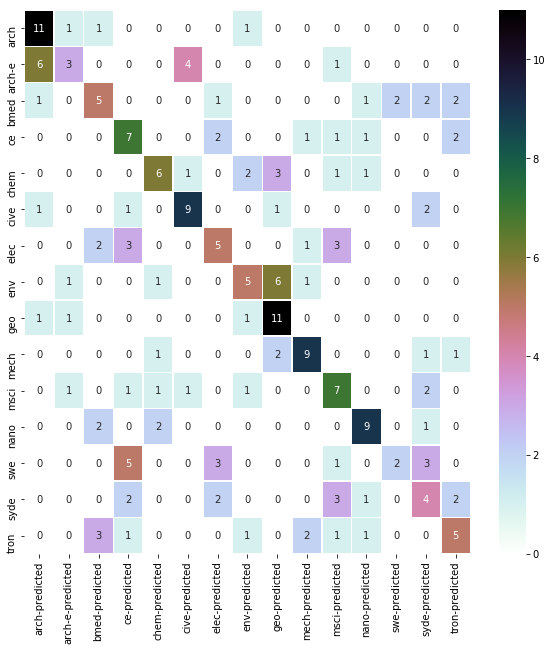

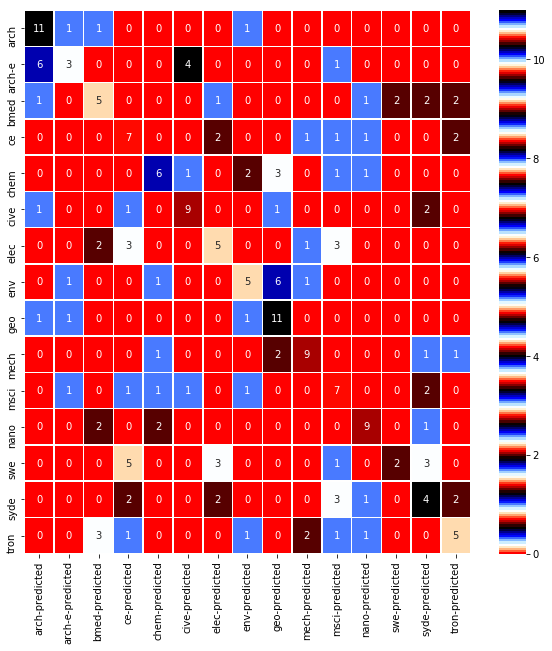

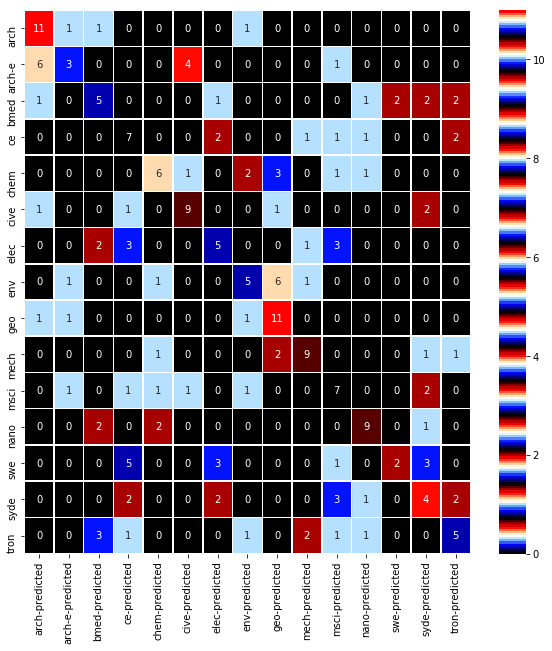

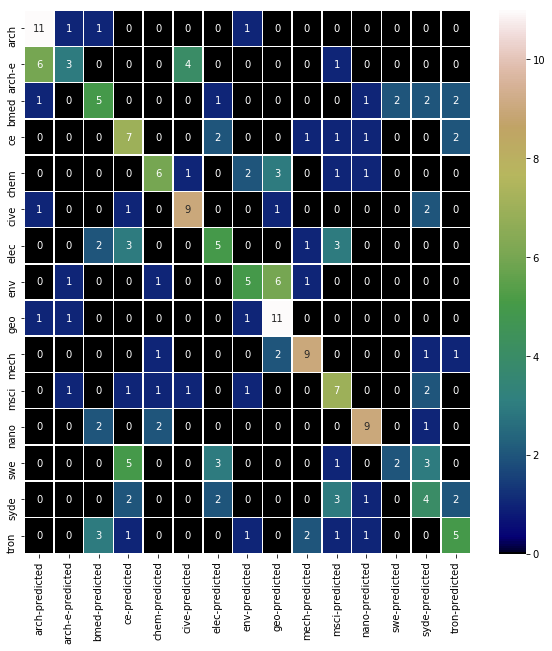

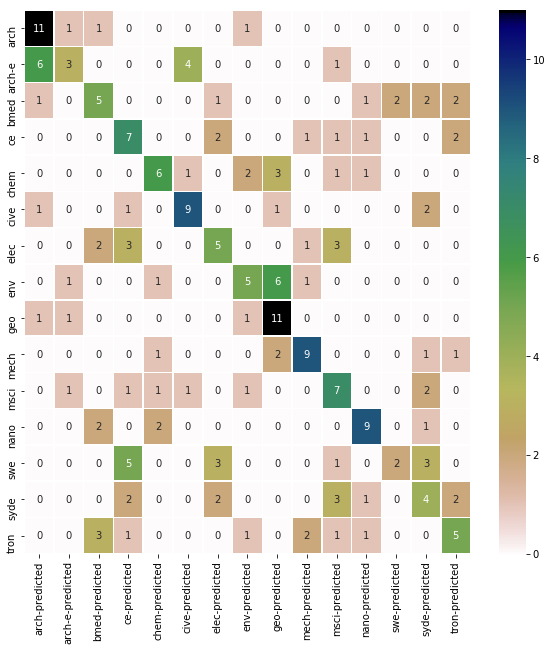

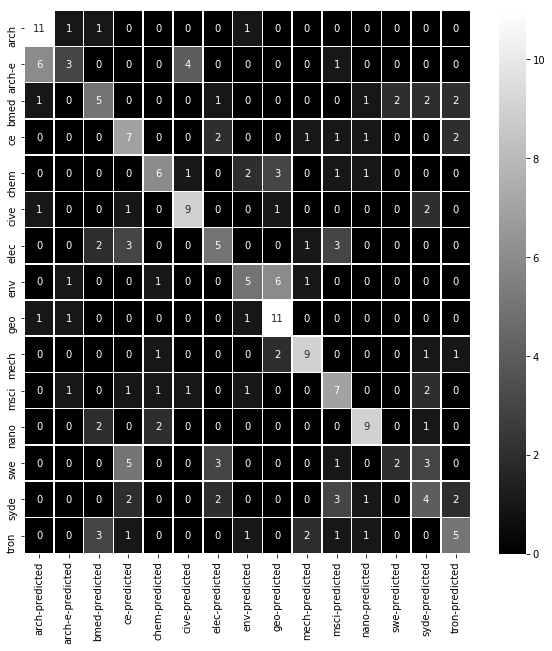

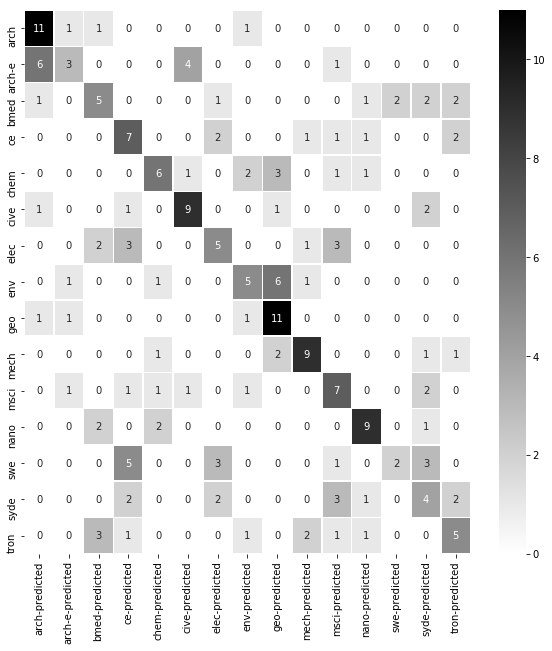

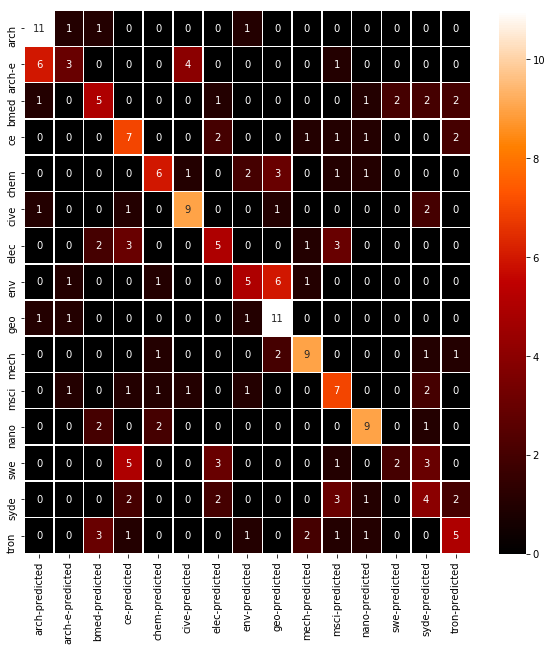

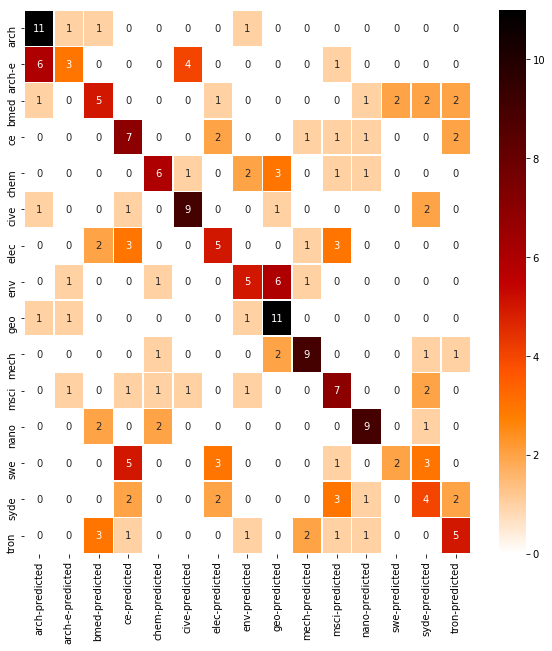

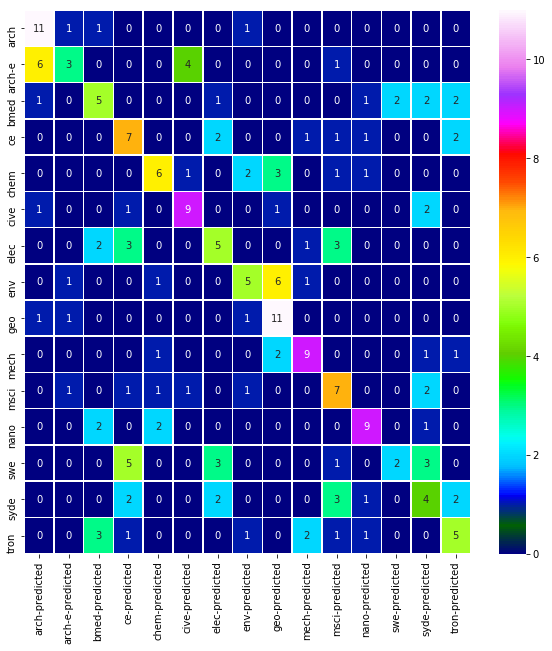

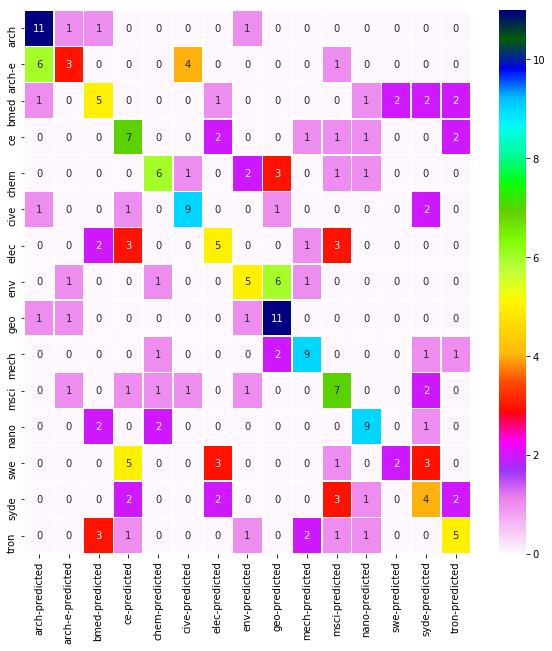

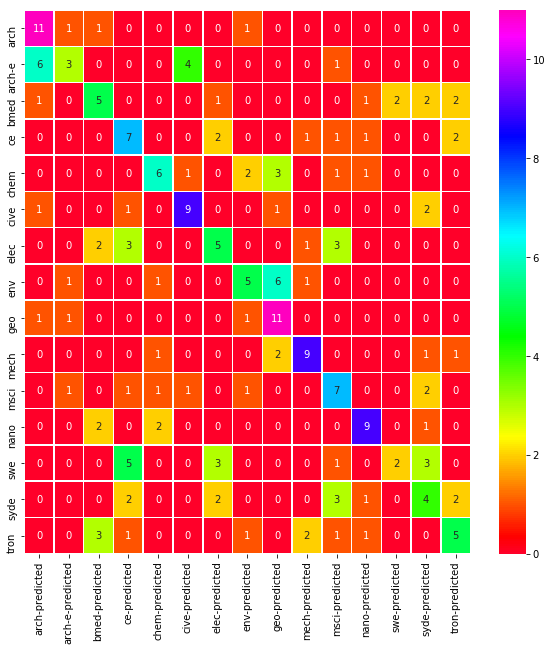

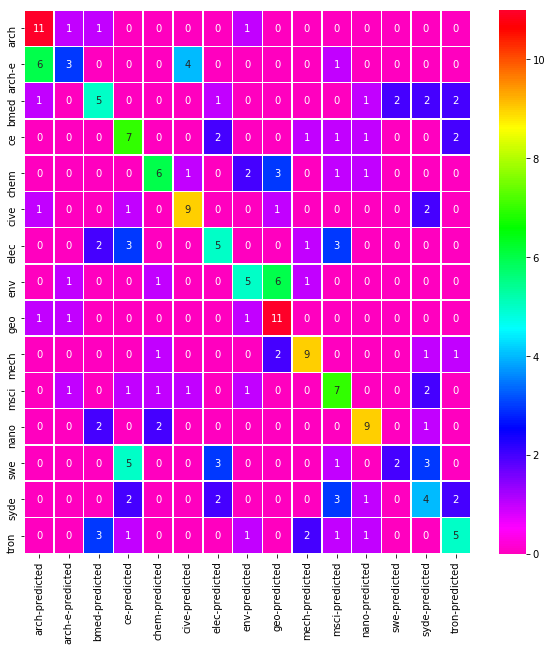

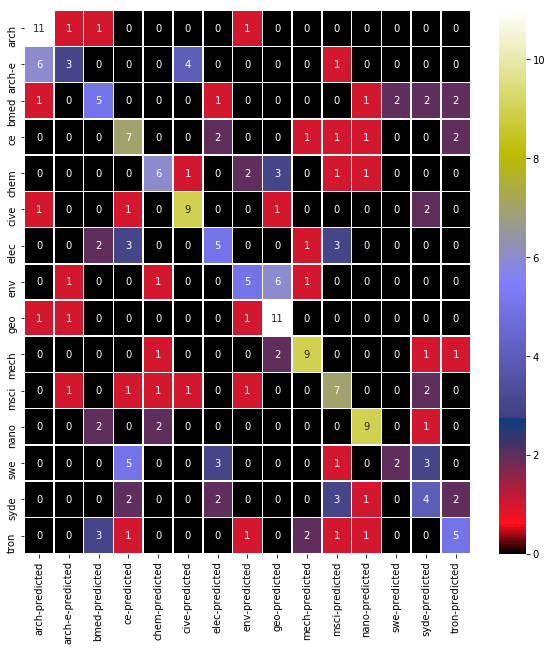

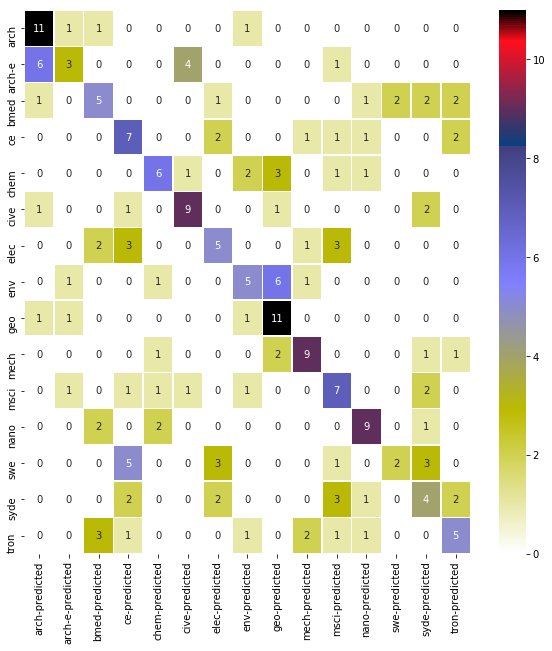

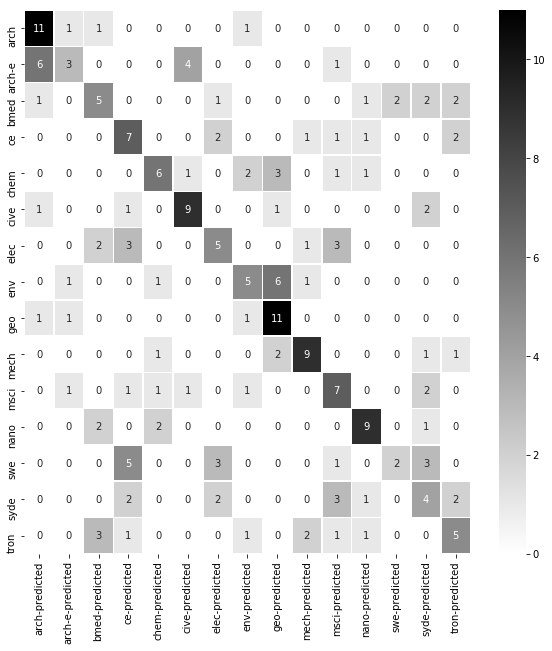

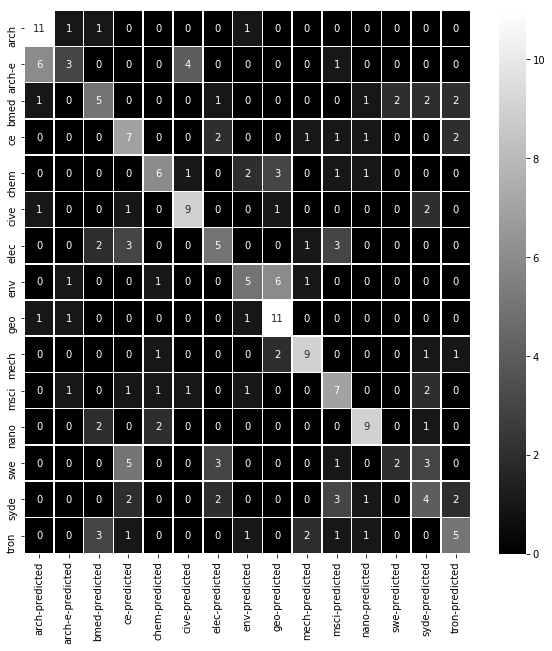

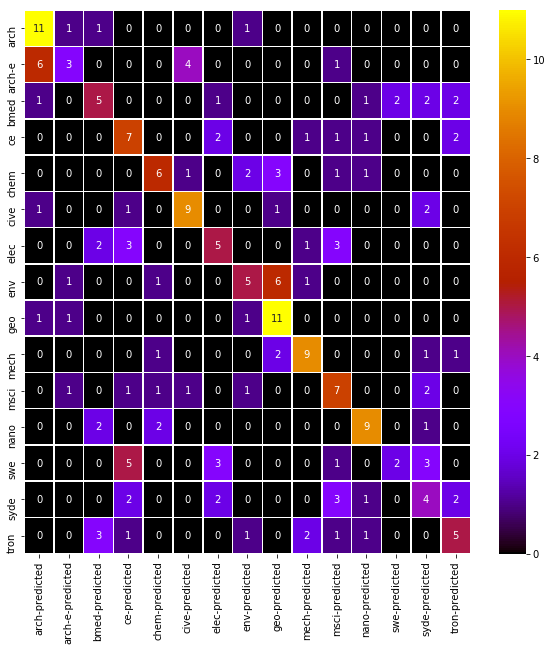

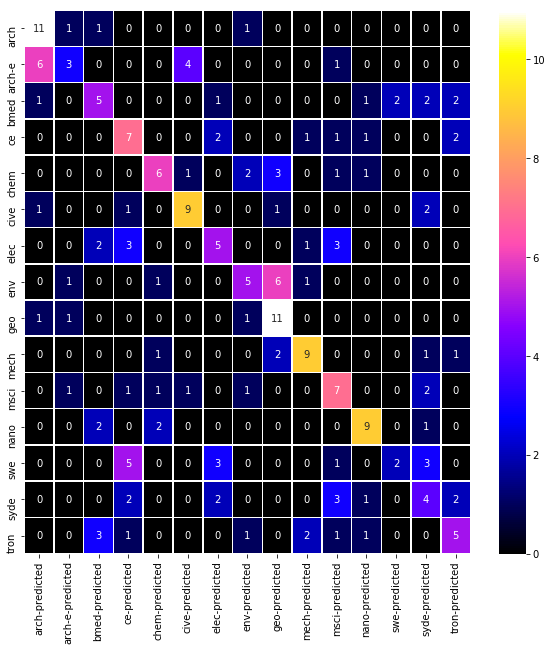

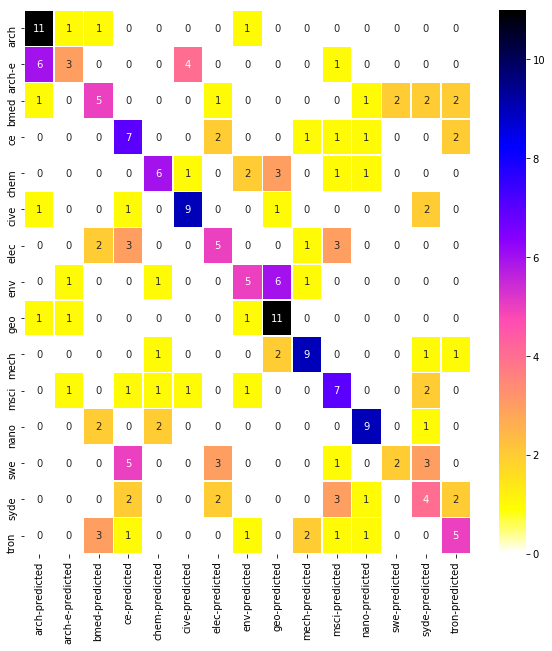

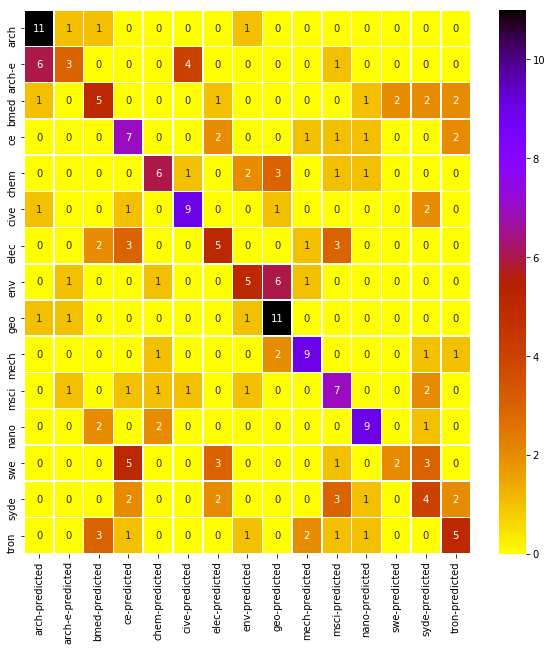

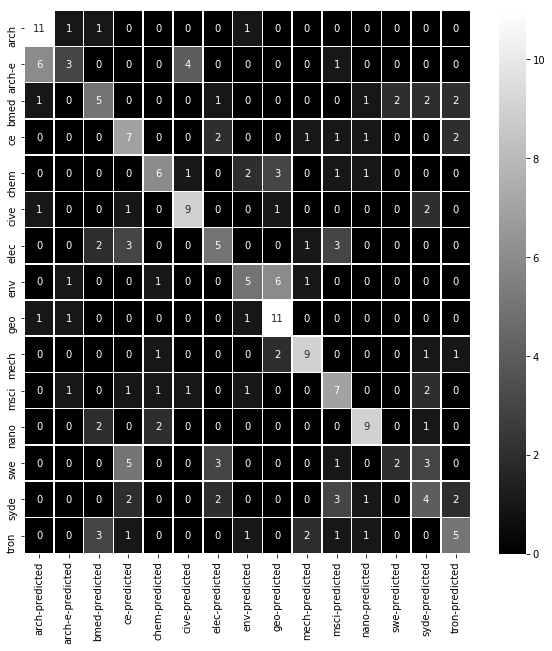

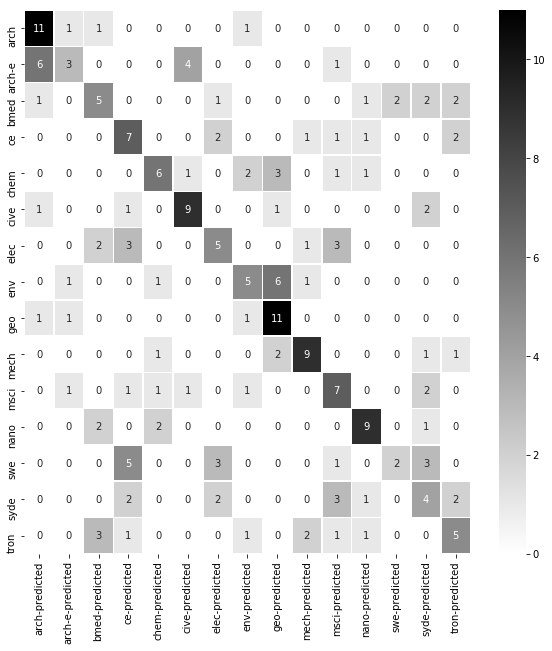

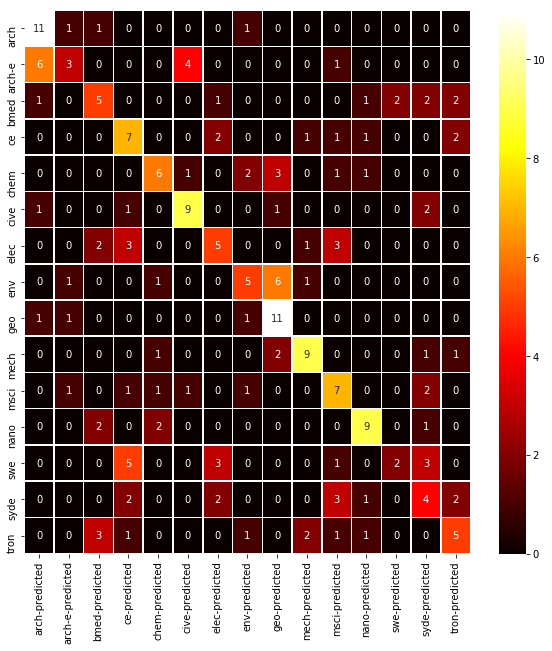

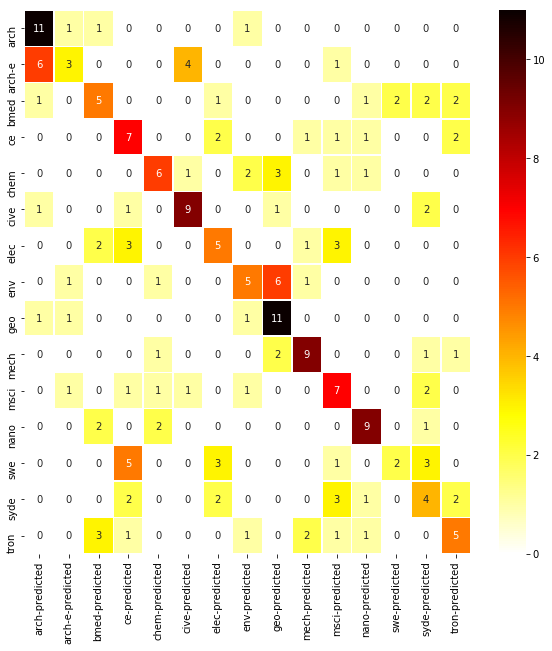

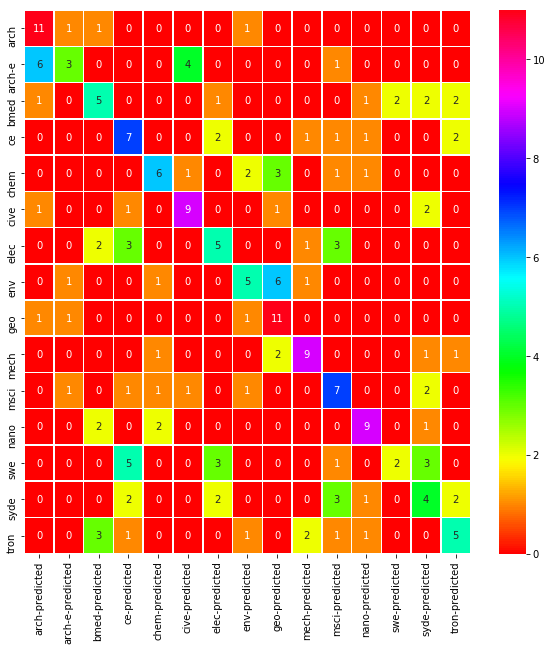

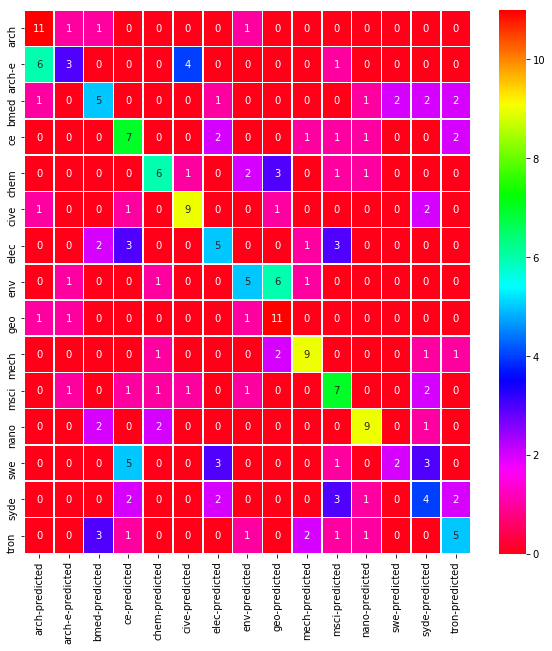

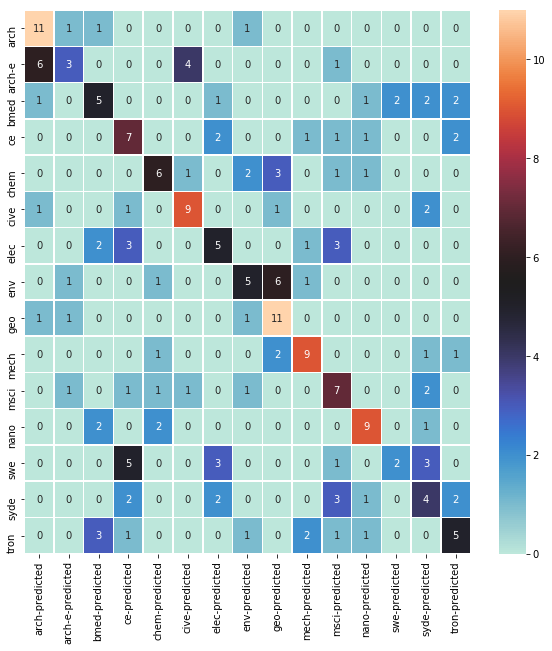

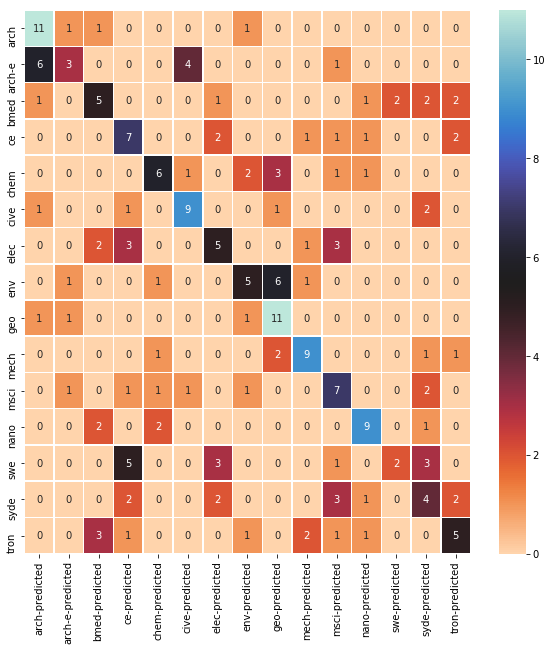

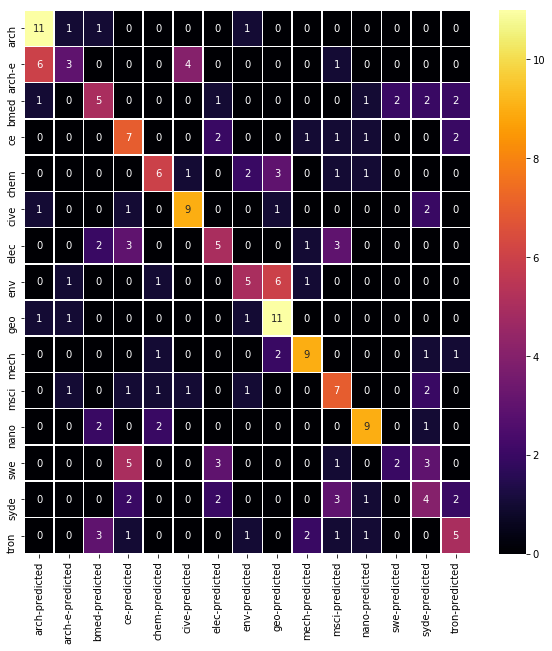

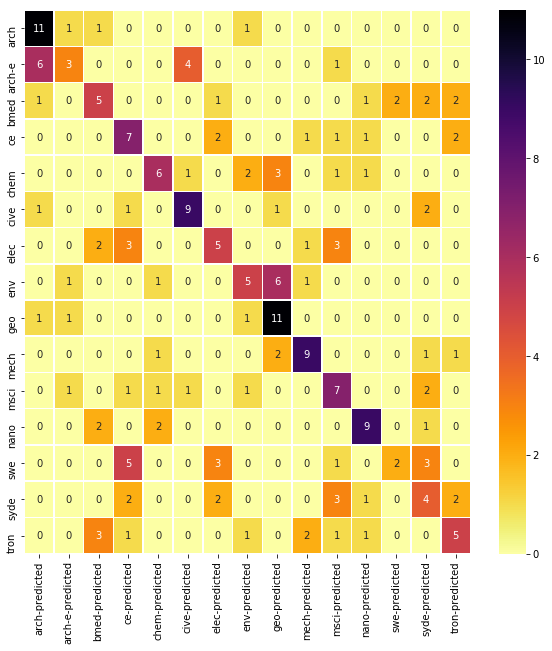

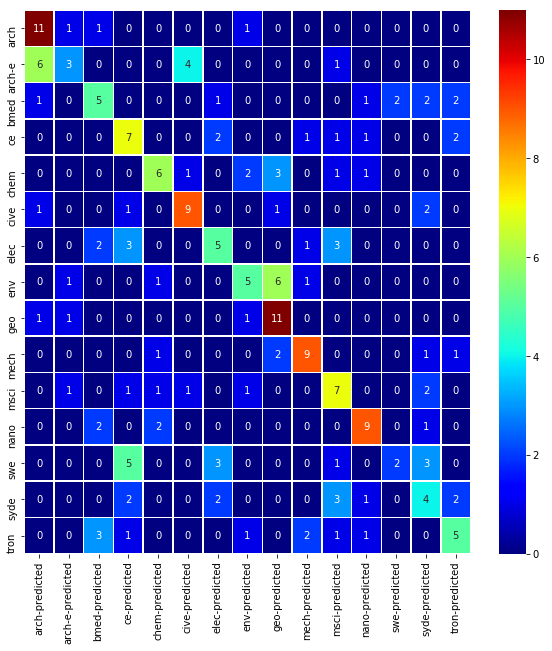

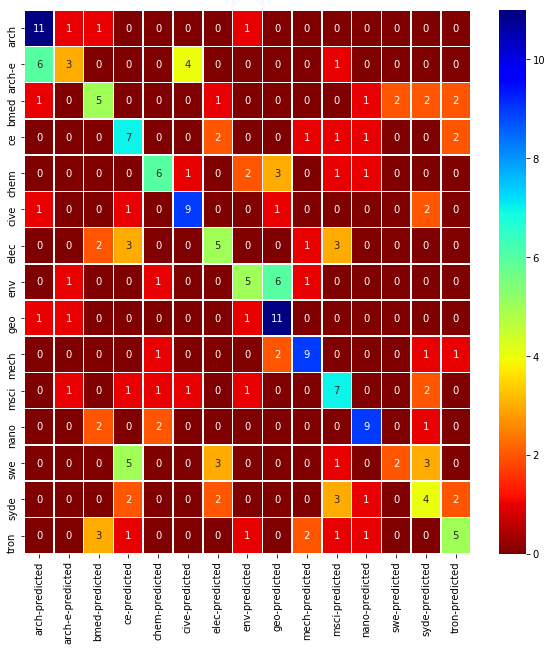

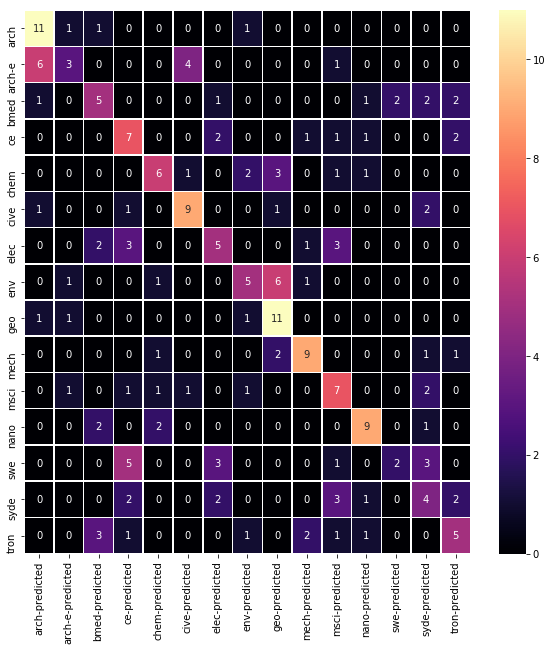

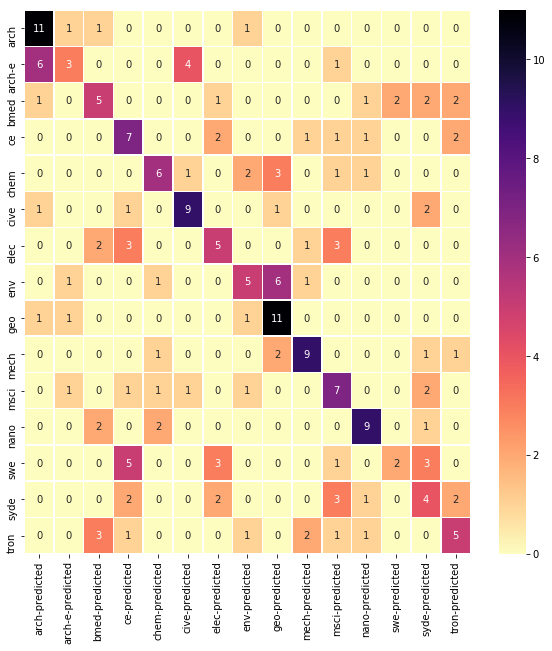

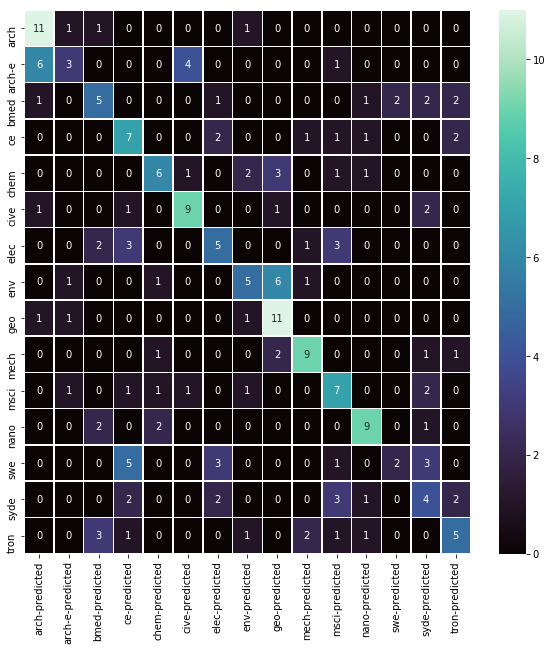

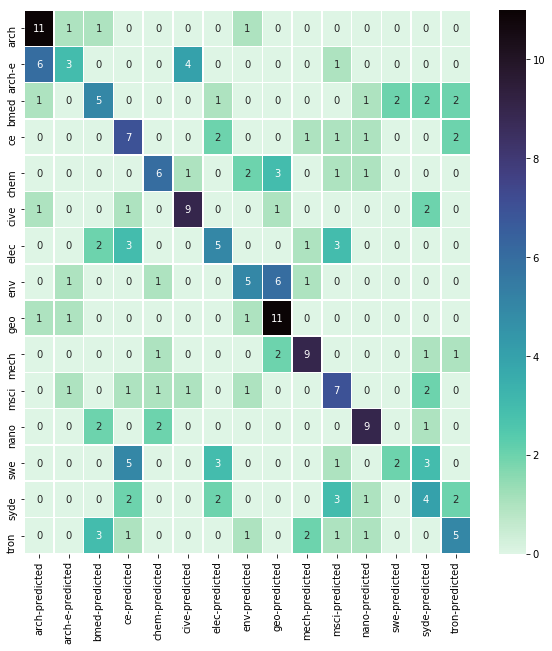

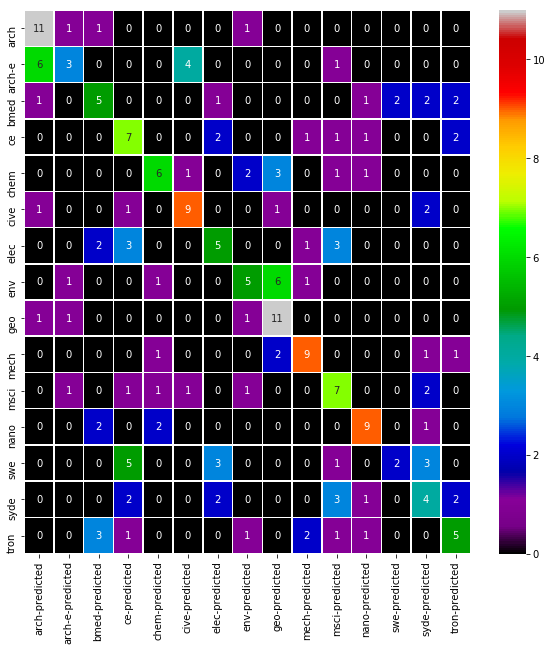

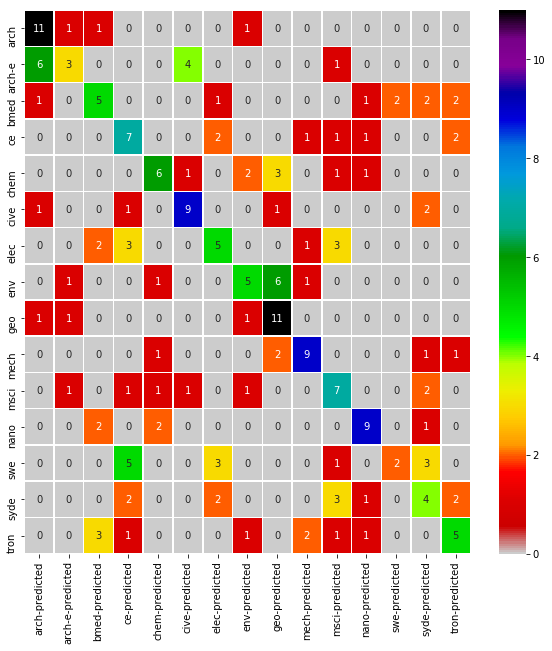

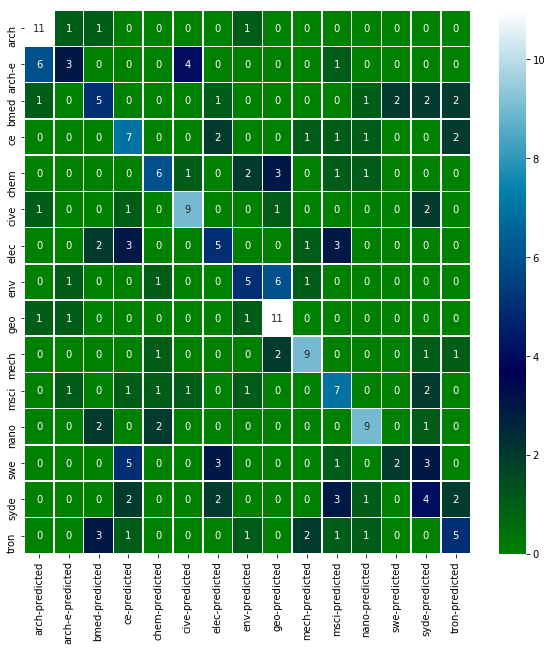

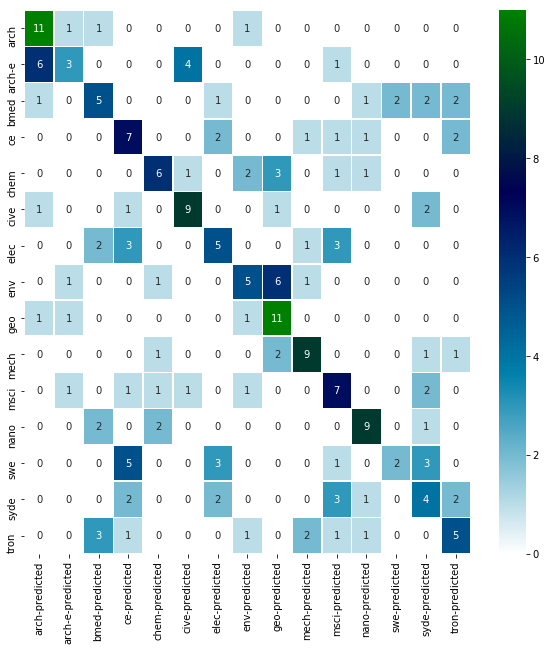

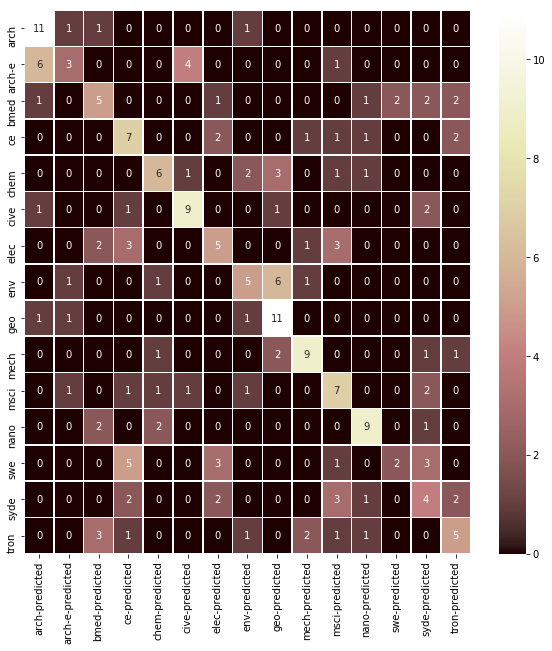

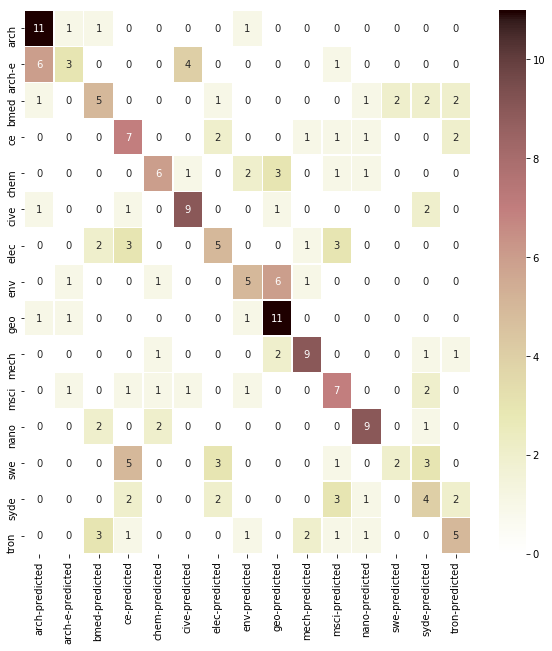

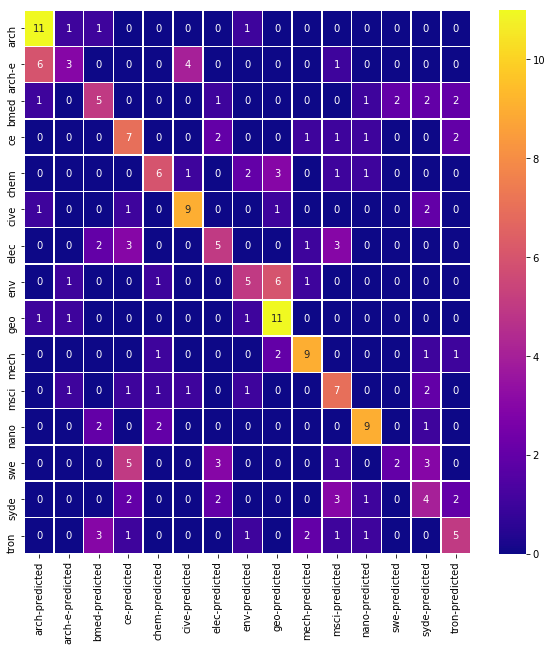

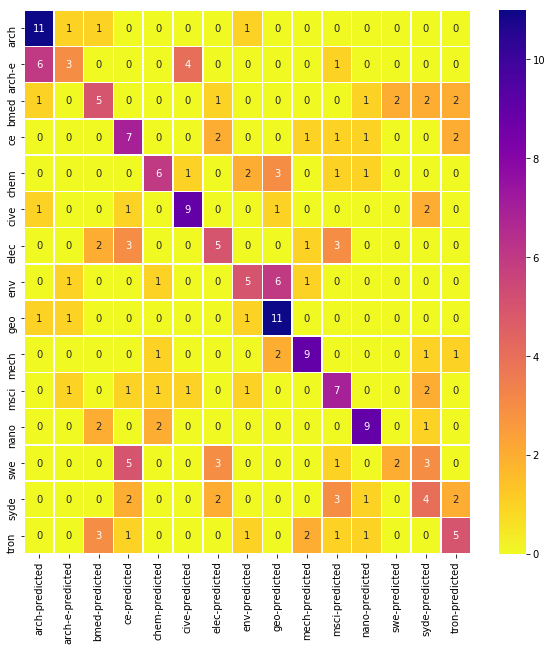

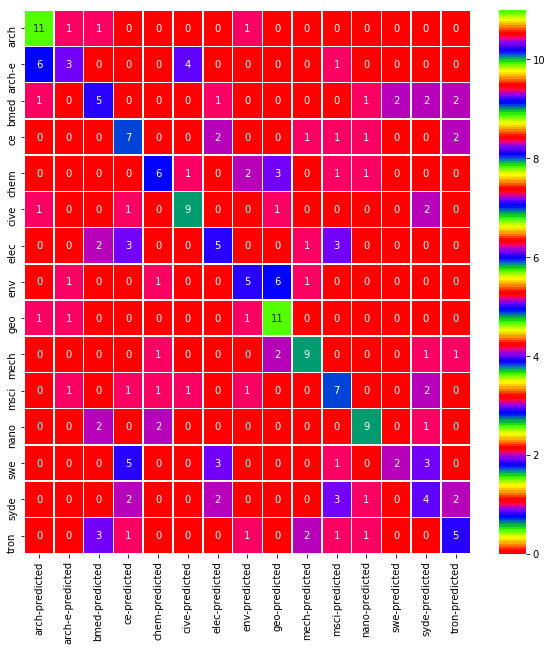

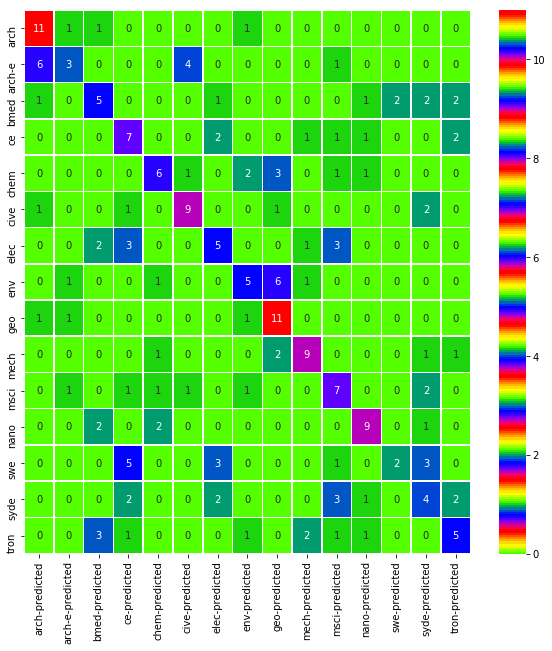

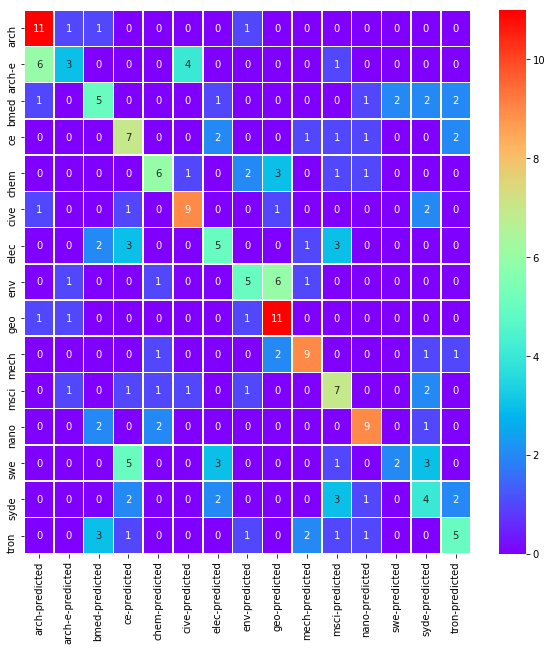

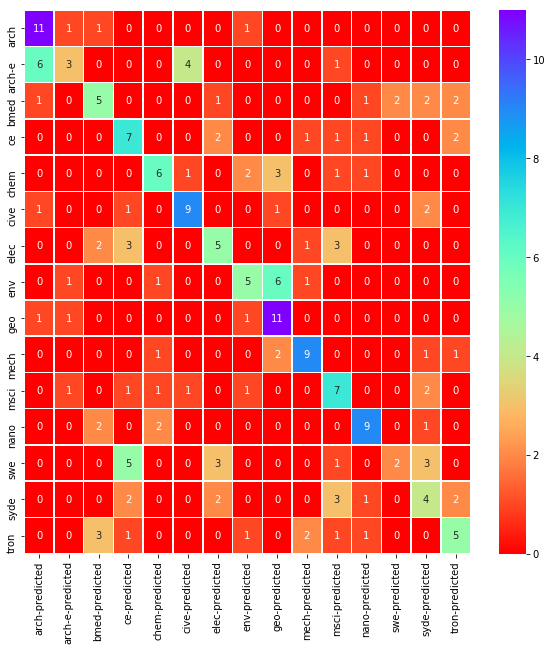

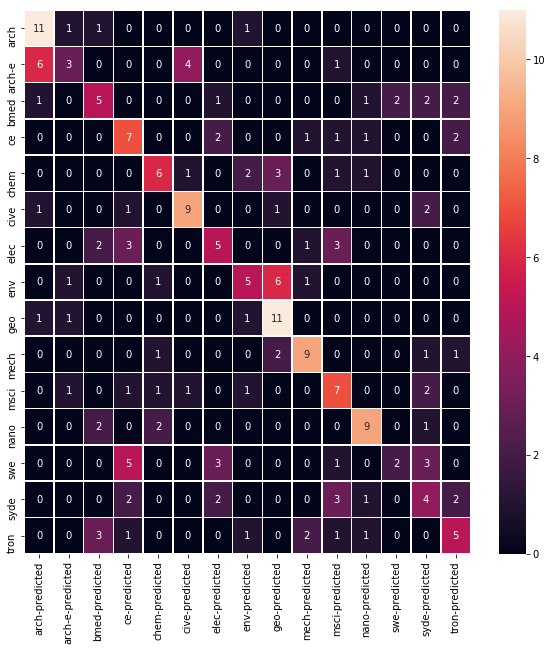

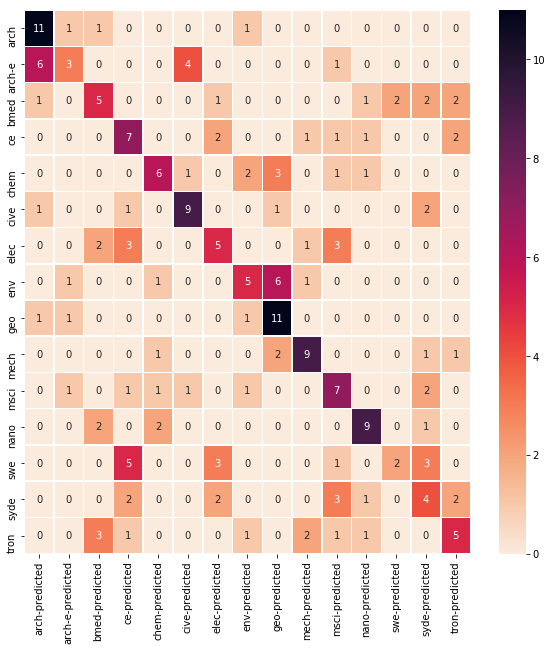

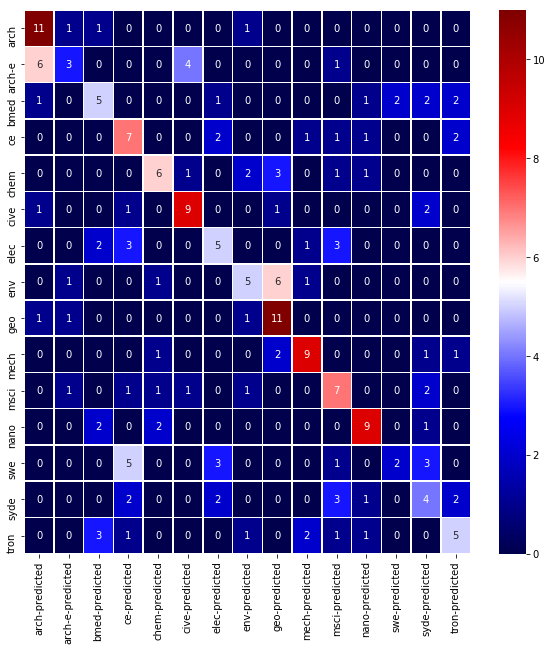

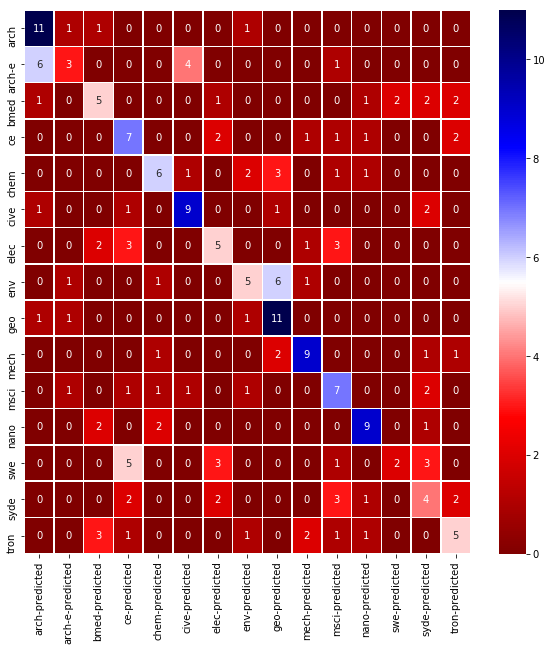

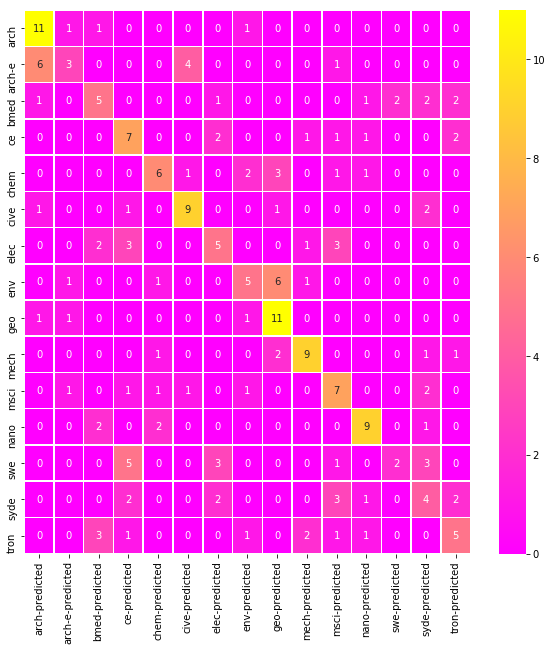

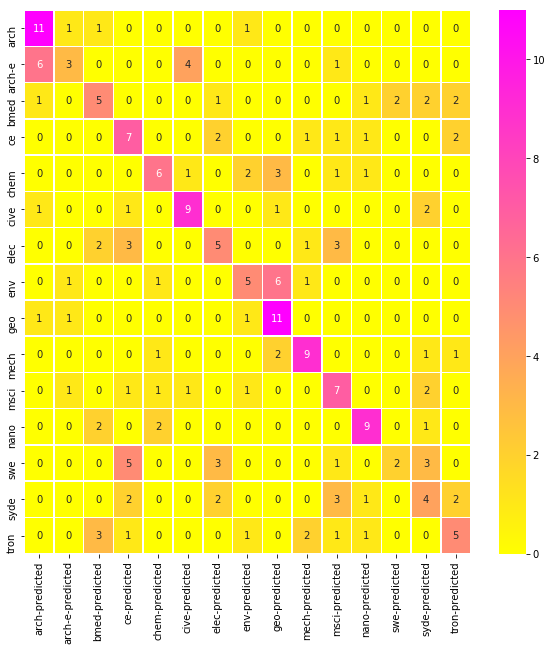

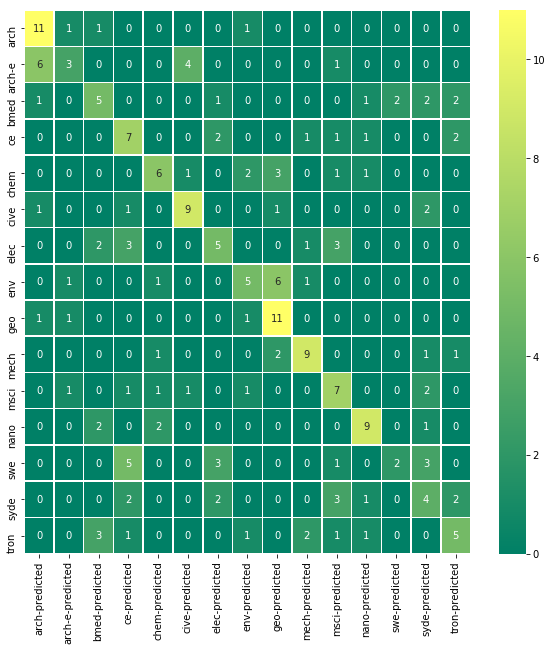

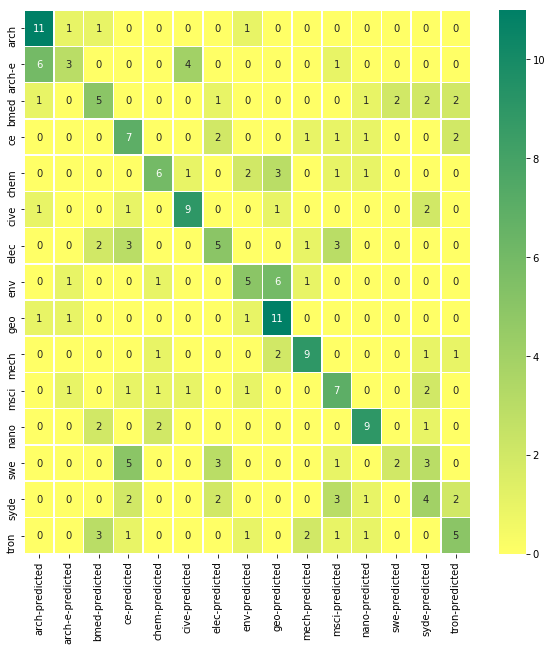

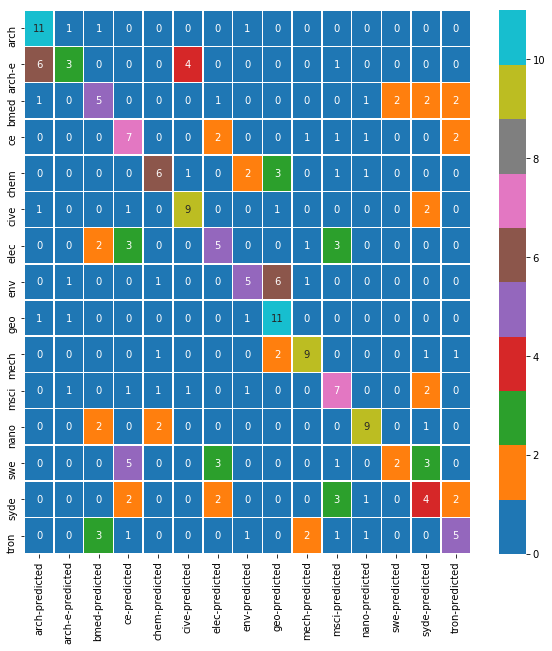

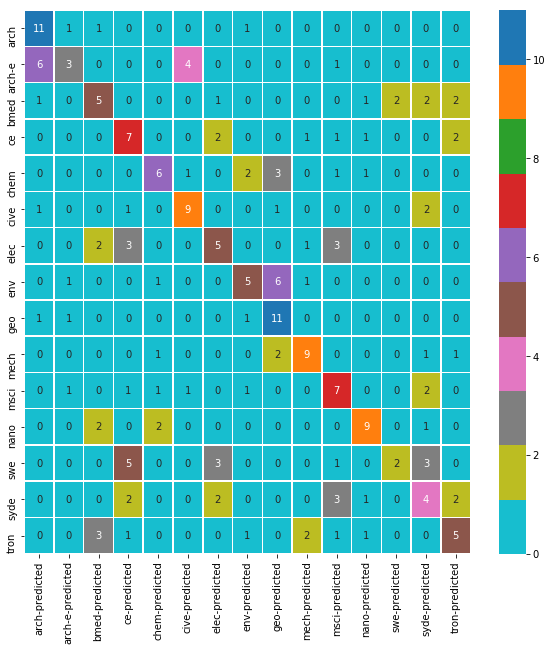

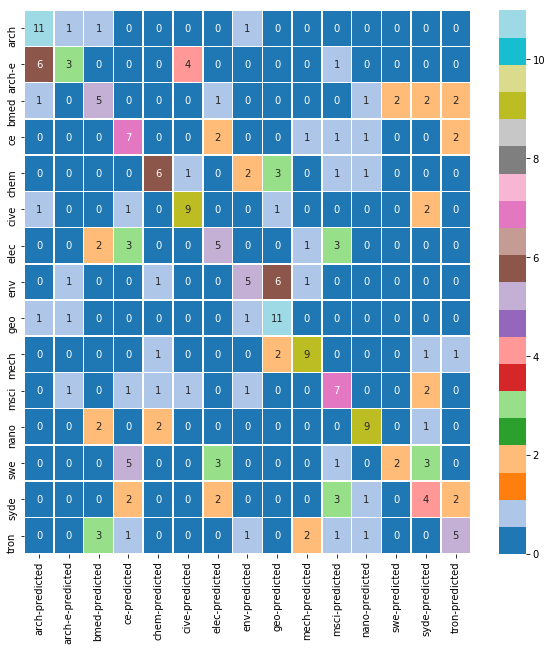

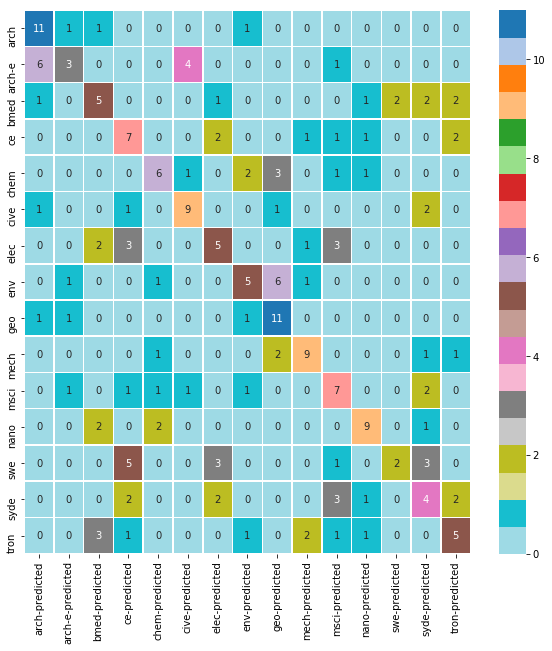

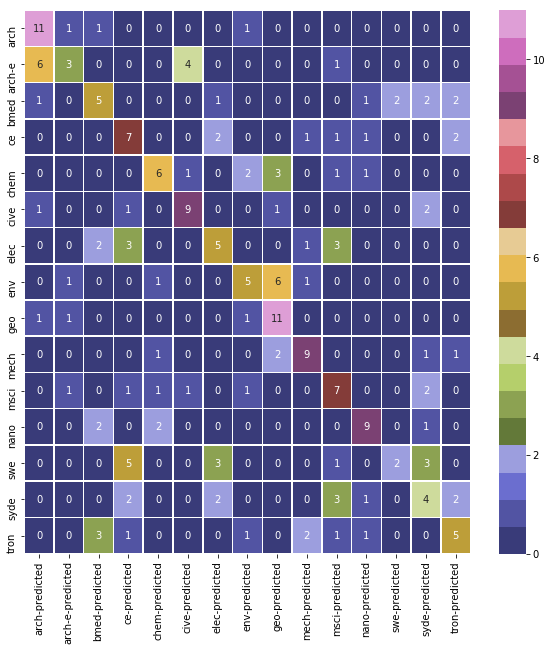

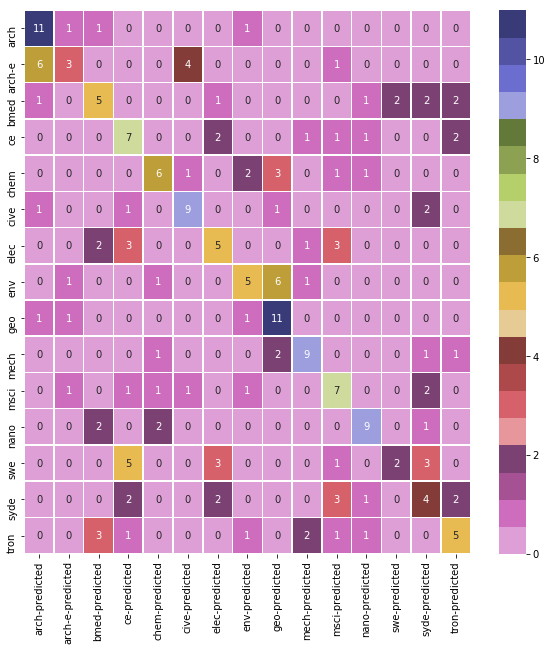

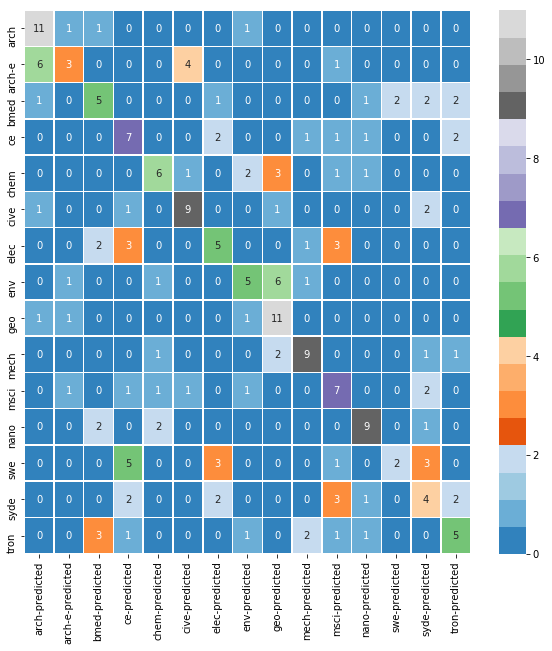

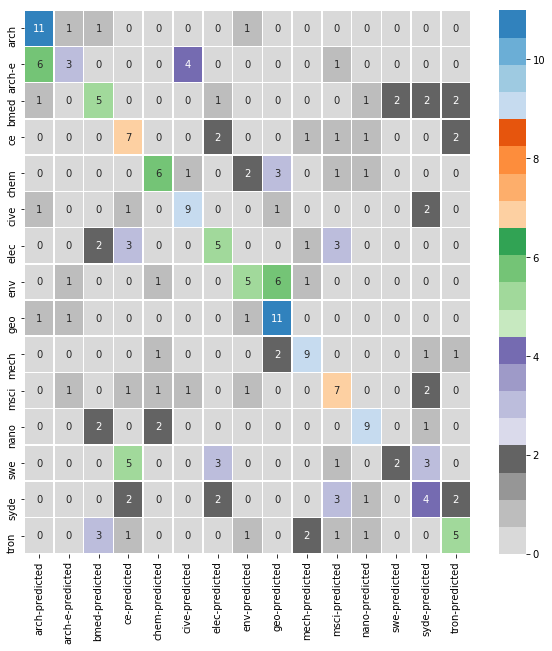

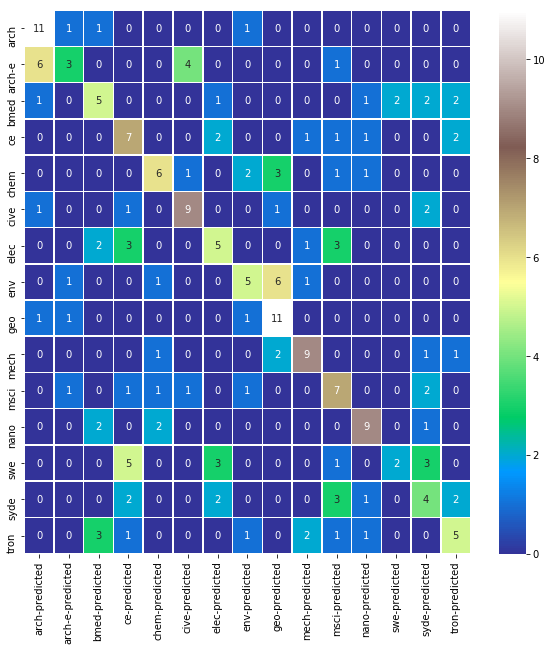

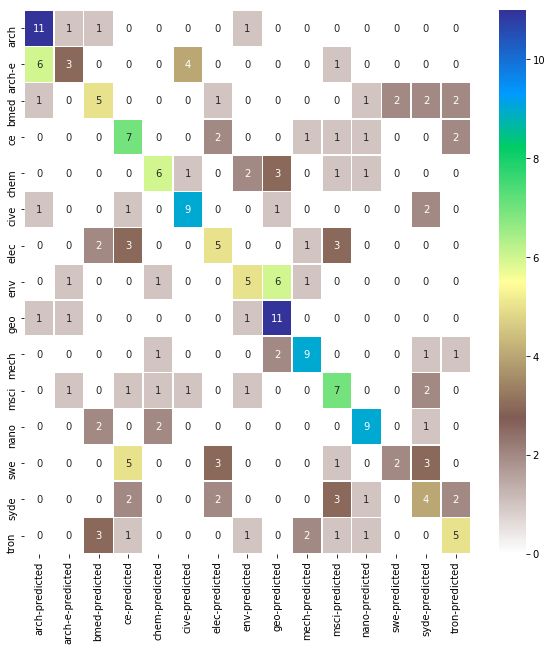

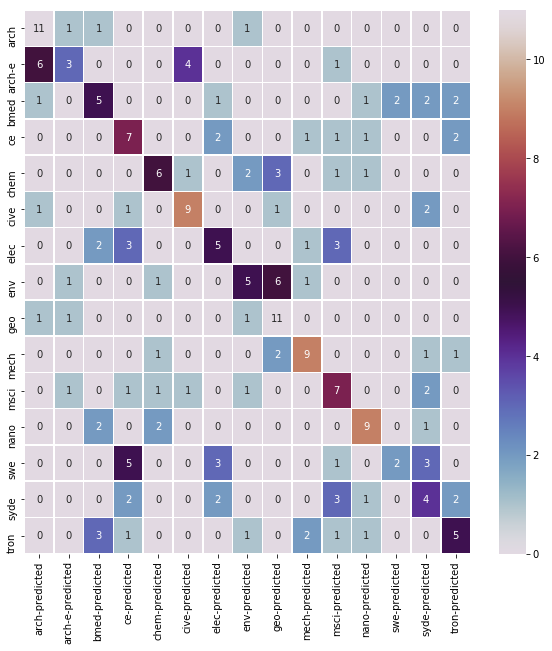

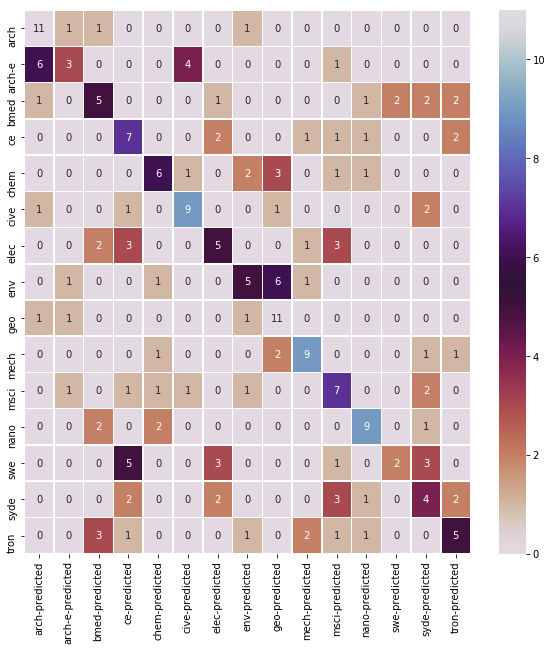

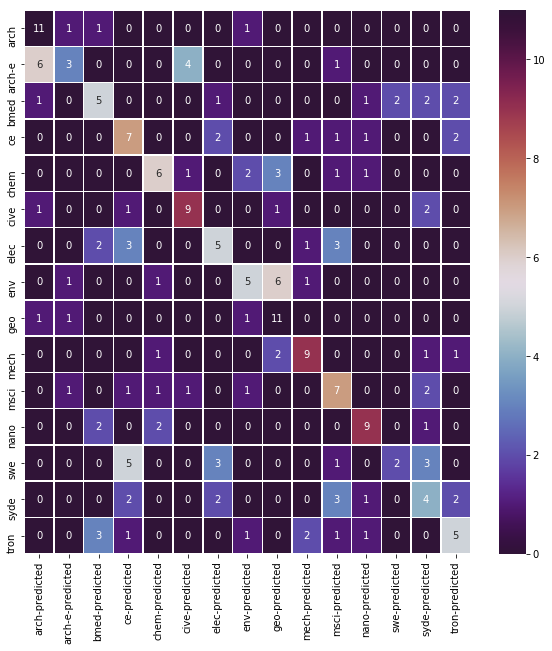

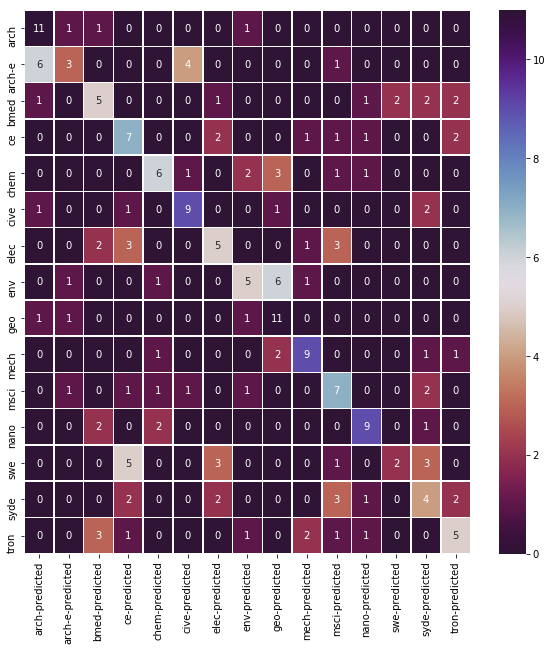

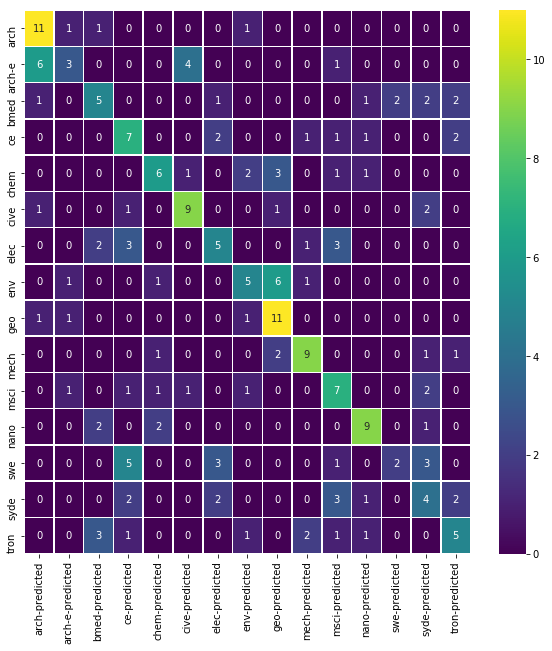

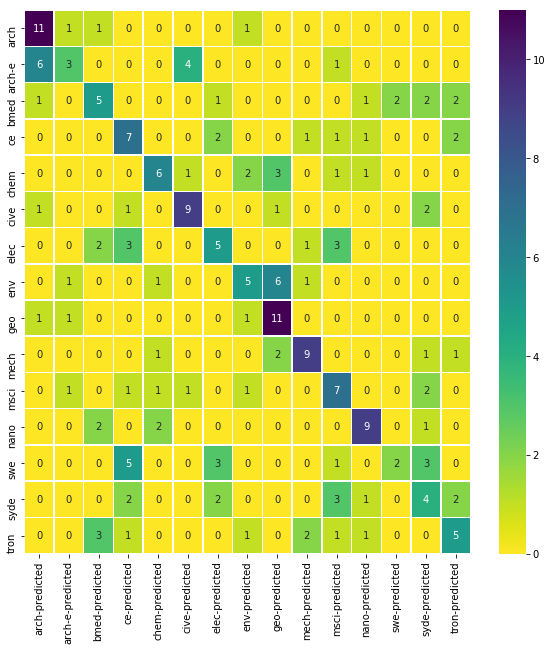

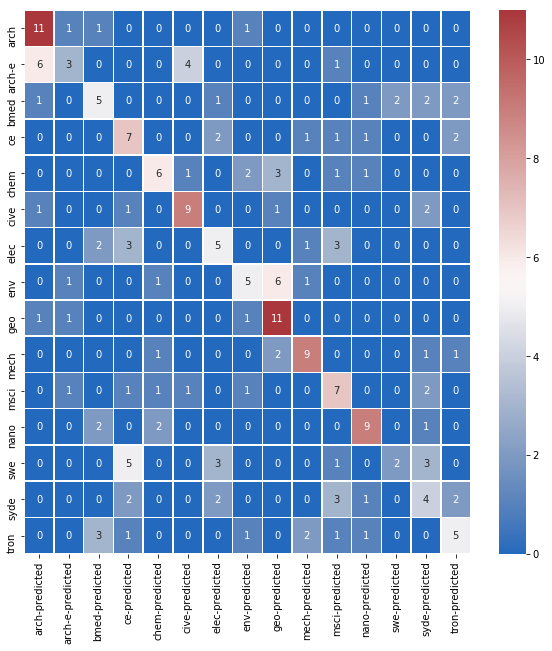

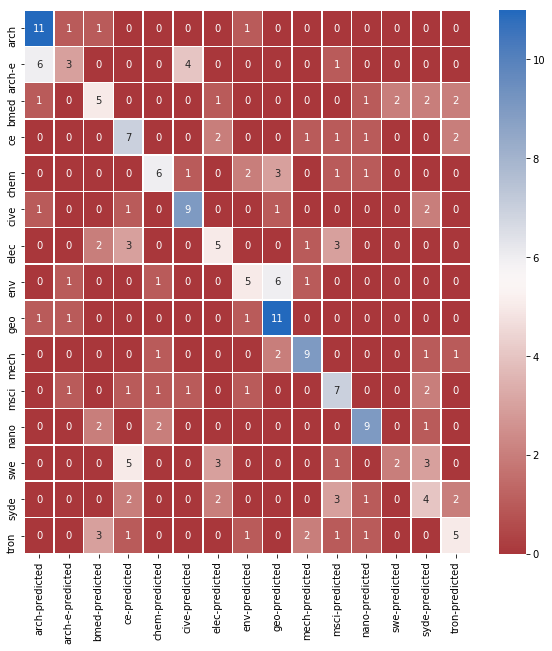

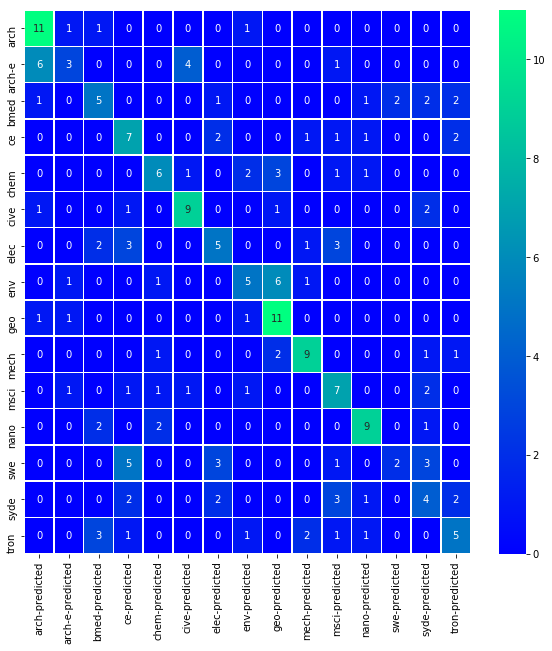

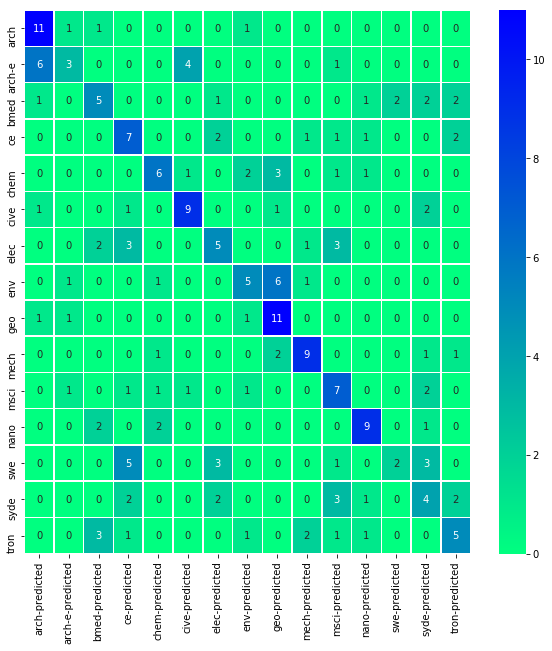

In [11]:
df = pd.DataFrame(pred_to_orig)

df = df.reindex(sorted(df.columns), axis=1)
df['id'] = df.index
df = df.sort_values(by=['id'], ascending = True)
df.set_index('id')
df = df.drop(['id'], axis=1)
df = df[['arch-predicted','arch-e-predicted','bmed-predicted','ce-predicted','chem-predicted','cive-predicted','elec-predicted','env-predicted','geo-predicted','mech-predicted','msci-predicted','nano-predicted','swe-predicted','syde-predicted' ,'tron-predicted']]

# print(df)

colours = [
    'Accent', 
    'Accent_r', 
    'Blues', 
    'Blues_r', 
    'BrBG', 
    'BrBG_r', 
    'BuGn', 
    'BuGn_r',
    'BuPu', 
    'BuPu_r', 
    'CMRmap', 
    'CMRmap_r', 
    'Dark2', 
    'Dark2_r', 
    'GnBu', 
    'GnBu_r', 
    'Greens', 
    'Greens_r', 
    'Greys', 
    'Greys_r', 
    'OrRd', 
    'OrRd_r', 
    'Oranges', 
    'Oranges_r', 
    'PRGn', 
    'PRGn_r', 
    'Paired', 
    'Paired_r', 
    'Pastel1', 
    'Pastel1_r', 
    'Pastel2', 
    'Pastel2_r', 
    'PiYG', 
    'PiYG_r', 
    'PuBu', 
    'PuBuGn', 
    'PuBuGn_r', 
    'PuBu_r', 
    'PuOr', 
    'PuOr_r', 
    'PuRd', 
    'PuRd_r', 
    'Purples', 
    'Purples_r', 
    'RdBu', 
    'RdBu_r', 
    'RdGy', 
    'RdGy_r', 
    'RdPu', 
    'RdPu_r', 
    'RdYlBu', 
    'RdYlBu_r', 
    'RdYlGn', 
    'RdYlGn_r', 
    'Reds', 
    'Reds_r', 
    'Set1', 
    'Set1_r', 
    'Set2', 
    'Set2_r', 
    'Set3', 
    'Set3_r', 
    'Spectral', 
    'Spectral_r', 
    'Wistia', 
    'Wistia_r', 
    'YlGn', 
    'YlGnBu', 
    'YlGnBu_r', 
    'YlGn_r', 
    'YlOrBr', 
    'YlOrBr_r', 
    'YlOrRd', 
    'YlOrRd_r', 
    'afmhot', 
    'afmhot_r', 
    'autumn', 
    'autumn_r', 
    'binary', 
    'binary_r', 
    'bone', 
    'bone_r', 
    'brg', 
    'brg_r', 
    'bwr', 
    'bwr_r', 
    'cividis', 
    'cividis_r', 
    'cool', 
    'cool_r', 
    'coolwarm', 
    'coolwarm_r', 
    'copper', 
    'copper_r', 
    'cubehelix', 
    'cubehelix_r', 
    'flag', 
    'flag_r', 
    'gist_earth', 
    'gist_earth_r', 
    'gist_gray', 
    'gist_gray_r', 
    'gist_heat', 
    'gist_heat_r', 
    'gist_ncar', 
    'gist_ncar_r', 
    'gist_rainbow', 
    'gist_rainbow_r', 
    'gist_stern', 
    'gist_stern_r', 
    'gist_yarg', 
    'gist_yarg_r', 
    'gnuplot', 
    'gnuplot2', 
    'gnuplot2_r', 
    'gnuplot_r', 
    'gray', 
    'gray_r', 
    'hot', 
    'hot_r', 
    'hsv', 
    'hsv_r', 
    'icefire', 
    'icefire_r', 
    'inferno', 
    'inferno_r', 
    'jet', 
    'jet_r', 
    'magma', 
    'magma_r', 
    'mako', 
    'mako_r', 
    'nipy_spectral', 
    'nipy_spectral_r', 
    'ocean', 
    'ocean_r',
    'pink', 
    'pink_r',
    'plasma',
    'plasma_r', 
    'prism', 
    'prism_r', 
    'rainbow', 
    'rainbow_r', 
    'rocket',
    'rocket_r',
    'seismic',
    'seismic_r', 
    'spring', 
    'spring_r', 
    'summer', 
    'summer_r', 
    'tab10', 
    'tab10_r', 
    'tab20', 
    'tab20_r', 
    'tab20b', 
    'tab20b_r',
    'tab20c', 
    'tab20c_r', 
    'terrain', 
    'terrain_r', 
    'twilight', 
    'twilight_r', 
    'twilight_shifted', 
    'twilight_shifted_r', 
    'viridis', 
    'viridis_r', 
    'vlag', 
    'vlag_r', 
    'winter', 
    'winter_r']

for col in colours:
    print(col)
    plt.figure(figsize=(10,10))
    sns.heatmap(df,cmap=col,annot=True,linewidth=0.5)